# Course Project EDA

Project: Use NHL shifts data from the 2021 season to explore the probability a shot goes in the net. Soecifically, I'm interested in the point of view from the goalie, and how they performed. I should be able to calculate the expected probabilty a shot goes in the net, and the expected chance the shot is saved by the goalie. I can then calculate how many saves above or below expected a goalie made.

Modeling will include all types of classification models, as the target feature will be whether a goal was scored on a shot or not.

# Data Dictionary

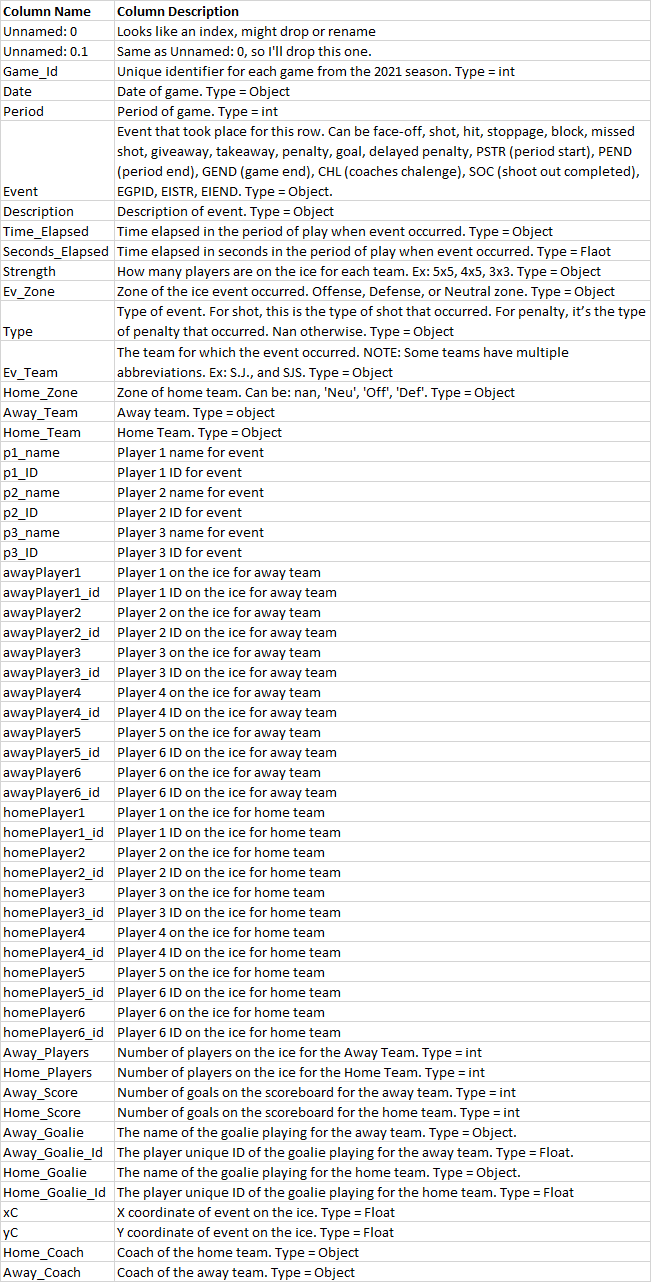

In [1]:
import pandas as pd
import numpy as np
import seaborn as ans
import matplotlib.pyplot as plt
import re

# Basic EDA

First step is to read in data, packages needed, and look at the data from a birds-eye view. I want to check the overall structure and shape of the data, look at column types, look for missing values to see if there needs to be any cleaning on the dataset as a whole. I will use this information to improve my data dictionary.

In [2]:
#read in data and examine
df = pd.read_csv('nhl_shifts_2021.csv')
df.head(50)

Unnamed: 0  Unnamed: 0.1  Game_Id        Date  Period  Event  \
0            0             0    20001  2021-01-13       1   PSTR   
1            1             1    20001  2021-01-13       1    FAC   
2            2             2    20001  2021-01-13       1   SHOT   
3            3             3    20001  2021-01-13       1   TAKE   
4            4             4    20001  2021-01-13       1  BLOCK   
5            5             5    20001  2021-01-13       1   SHOT   
6            6             6    20001  2021-01-13       1    HIT   
7            7             7    20001  2021-01-13       1    HIT   
8            8             8    20001  2021-01-13       1   SHOT   
9            9             9    20001  2021-01-13       1   STOP   
10          10            10    20001  2021-01-13       1    FAC   
11          11            11    20001  2021-01-13       1    HIT   
12          12            12    20001  2021-01-13       1   STOP   
13          13            13    20001  2021-01-13       1    FAC   
14          14            14    20001  2021-01-13       1  BLOCK   
15          15            15    20001  2021-01-13       1    HIT   
16          16            16    20001  2021-01-13       1  BLOCK   
17          17            17    20001  2021-01-13       1    HIT   
18          18            18    20001  2021-01-13       1   STOP   
19          19            19    20001  2021-01-13       1    FAC   
20          20            20    20001  2021-01-13       1   SHOT   
21          21            21    20001  2021-01-13       1   STOP   
22          22            22    20001  2021-01-13       1    FAC   
23          23            23    20001  2021-01-13       1   MISS   
24          24            24    20001  2021-01-13       1   GIVE   
25          25            25    20001  2021-01-13       1   SHOT   
26          26            26    20001  2021-01-13       1   SHOT   
27          27            27    20001  2021-01-13       1   GIVE   
28          28            28    20001  2021-01-13       1   SHOT   
29          29            29    20001  2021-01-13       1  BLOCK   
30          30            30    20001  2021-01-13       1   SHOT   
31          31            31    20001  2021-01-13       1    HIT   
32          32            32    20001  2021-01-13       1   STOP   
33          33            33    20001  2021-01-13       1   GOAL   
34          34            34    20001  2021-01-13       1    FAC   
35          35            35    20001  2021-01-13       1   SHOT   
36          36            36    20001  2021-01-13       1   PENL   
37          37            37    20001  2021-01-13       1    FAC   
38          38            38    20001  2021-01-13       1   GIVE   
39          39            39    20001  2021-01-13       1   STOP   
40          40            40    20001  2021-01-13       1    FAC   
41          41            41    20001  2021-01-13       1   SHOT   
42          42            42    20001  2021-01-13       1    HIT   
43          43            43    20001  2021-01-13       1   SHOT   
44          44            44    20001  2021-01-13       1   STOP   
45          45            45    20001  2021-01-13       1    FAC   
46          46            46    20001  2021-01-13       1   GIVE   
47          47            47    20001  2021-01-13       1  BLOCK   
48          48            48    20001  2021-01-13       1    HIT   
49          49            49    20001  2021-01-13       1    HIT   

                                          Description Time_Elapsed  \
0                  Period Start- Local time: 5:32 EST         0:00   
1   PIT won Neu. Zone - PIT #87 CROSBY vs PHI #14 ...         0:00   
2   PHI ONGOAL - #11 KONECNY, Wrist, Off. Zone, 32...         0:16   
3               PHI TAKEAWAY - #9 PROVOROV, Off. Zone         0:23   
4   PHI #14 COUTURIER BLOCKED BY  PIT #8 DUMOULIN,...         0:28   
5   PIT ONGOAL - #9 RODRIGUES, Wrist, Off. Zone, 4...         0:34   
6          PHI #13 HAYES HIT PIT #6 MARINO, O

In [3]:
df.tail()

Unnamed: 0  Unnamed: 0.1  Game_Id        Date  Period  Event  \
287782      287782        287782    30415  2021-07-07       3   SHOT   
287783      287783        287783    30415  2021-07-07       3  BLOCK   
287784      287784        287784    30415  2021-07-07       3    HIT   
287785      287785        287785    30415  2021-07-07       3   PEND   
287786      287786        287786    30415  2021-07-07       3   GEND   

                                              Description Time_Elapsed  \
287782  MTL ONGOAL - #22 CAUFIELD, Wrist, Off. Zone, 2...        19:24   
287783  MTL #26 PETRY BLOCKED BY  T.B #19 GOODROW, Wri...        19:33   
287784       T.B #81 CERNAK HIT MTL #14 SUZUKI, Def. Zone        19:40   
287785                  Period End- Local time: 10:51 EDT        20:00   
287786                    Game End- Local time: 10:51 EDT        20:00   

        Seconds_Elapsed Strength  ... Away_Score Home_Score Away_Goalie  \
287782           1164.0      5x5  ...          0          1         NaN   
287783           1173.0      5x5  ...          0          1         NaN   
287784           1180.0      5x5  ...          0          1         NaN   
287785           1200.0      5x5  ...          0          1         NaN   
287786           1200.0    -1x-1  ...          0          1         NaN   

       Away_Goalie_Id         Home_Goalie Home_Goalie_Id    xC    yC  \
287782            NaN  ANDREI VASILEVSKIY      8476883.0 -77.0  18.0   
287783            NaN  ANDREI VASILEVSKIY      8476883.0 -59.0   6.0   
287784            NaN  ANDREI VASILEVSKIY      8476883.0 -56.0 -25.0   
287785            NaN  ANDREI VASILEVSKIY      8476883.0   NaN   NaN   
287786            NaN                 NaN            NaN   NaN   NaN   

        Home_Coach          Away_Coach  
287782  JON COOPER  DOMINIQUE DUCHARME  
287783  JON COOPER  DOMINIQUE DUCHARME  
287784  JON COOPER  DOMINIQUE DUCHARME  
287785  JON COOPER  DOMINIQUE DUCHARME  
287786  JON COOPER  DOMINIQUE DUCHARME  

[5 rows x 58 columns]

In [4]:
df.shape

(287787, 58)

In [5]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Game_Id', 'Date', 'Period', 'Event',
       'Description', 'Time_Elapsed', 'Seconds_Elapsed', 'Strength', 'Ev_Zone',
       'Type', 'Ev_Team', 'Home_Zone', 'Away_Team', 'Home_Team', 'p1_name',
       'p1_ID', 'p2_name', 'p2_ID', 'p3_name', 'p3_ID', 'awayPlayer1',
       'awayPlayer1_id', 'awayPlayer2', 'awayPlayer2_id', 'awayPlayer3',
       'awayPlayer3_id', 'awayPlayer4', 'awayPlayer4_id', 'awayPlayer5',
       'awayPlayer5_id', 'awayPlayer6', 'awayPlayer6_id', 'homePlayer1',
       'homePlayer1_id', 'homePlayer2', 'homePlayer2_id', 'homePlayer3',
       'homePlayer3_id', 'homePlayer4', 'homePlayer4_id', 'homePlayer5',
       'homePlayer5_id', 'homePlayer6', 'homePlayer6_id', 'Away_Players',
       'Home_Players', 'Away_Score', 'Home_Score', 'Away_Goalie',
       'Away_Goalie_Id', 'Home_Goalie', 'Home_Goalie_Id', 'xC', 'yC',
       'Home_Coach', 'Away_Coach'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0           int64
Unnamed: 0.1         int64
Game_Id              int64
Date                object
Period               int64
Event               object
Description         object
Time_Elapsed        object
Seconds_Elapsed    float64
Strength            object
Ev_Zone             object
Type                object
Ev_Team             object
Home_Zone           object
Away_Team           object
Home_Team           object
p1_name             object
p1_ID              float64
p2_name             object
p2_ID              float64
p3_name             object
p3_ID              float64
awayPlayer1         object
awayPlayer1_id     float64
awayPlayer2         object
awayPlayer2_id     float64
awayPlayer3         object
awayPlayer3_id     float64
awayPlayer4         object
awayPlayer4_id     float64
awayPlayer5         object
awayPlayer5_id     float64
awayPlayer6         object
awayPlayer6_id     float64
homePlayer1         object
homePlayer1_id     float64
homePlayer2         object
h

In [7]:
df['Event'].value_counts()

FAC       53335
SHOT      52059
HIT       44874
STOP      41363
BLOCK     25174
MISS      21368
GIVE      16863
TAKE      11732
PENL       6638
GOAL       5632
PSTR       3147
PEND       3146
DELPEN     1318
GEND        943
CHL         122
SOC          69
EGPID         2
EIEND         1
EISTR         1
Name: Event, dtype: int64

In [8]:
#df['Strength'].value_counts()

In [9]:
df['Ev_Zone'].value_counts()

Off    124485
Def     83891
Neu     29299
Name: Ev_Zone, dtype: int64

In [10]:
df['Type'].unique()

array([nan, 'WRIST SHOT', 'SNAP SHOT', 'BACKHAND', 'SLAP SHOT',
       'Holding(2 min)', 'TIP-IN', 'Slashing(2 min)',
       'Cross checking(2 min)', 'Interference(2 min)',
       'Too many men/ice - bench(2 min)', 'Tripping(2 min)',
       'Fighting (maj)', 'Boarding(2 min)',
       'Delay Game - Puck over glass(2 min)', 'Hooking(2 min)',
       'WRAP-AROUND', 'DEFLECTED', 'Elbowing(2 min)',
       'Closing hand on puck(2 min)', 'Illegal check to head(2 min)',
       'Interference on goalkeeper(2 min)', 'Holding the stick(2 min)',
       'Charging(2 min)', 'Hi-sticking(2 min)', 'Embellishment(2 min)',
       'Roughing(2 min)', 'Unsportsmanlike conduct(2 min)',
       'Misconduct (10 min)', 'Delay Game - Unsucc chlg(2 min)',
       'Game Misconduct(10 min)', 'Kneeing(2 min)', 'Minor(2 min)',
       'Playing without a helmet(2 min)',
       'Delay Game - FO Viol - hand(2 min)',
       'Delay Game - Bench - FO viol(2 min)',
       'PS-Hooking on breakaway(0 min)', 'Hi stick - double mino

In [11]:
df['Ev_Team'].unique()

array([nan, 'PIT', 'PHI', 'TOR', 'MTL', 'CHI', 'T.B', 'VAN', 'EDM', 'STL',
       'COL', 'WSH', 'BUF', 'BOS', 'N.J', 'NYI', 'NYR', 'CAR', 'DET',
       'NSH', 'CBJ', 'CGY', 'WPG', 'S.J', 'ARI', 'VGK', 'ANA', 'L.A',
       'MIN', 'OTT', 'FLA', 'DAL', 'LAK', 'TBL', 'SJS'], dtype=object)

In [12]:
df['Home_Zone'].unique()

array([nan, 'Neu', 'Off', 'Def'], dtype=object)

In [13]:
df['Away_Team'].unique()

array(['PIT', 'MTL', 'CHI', 'VAN', 'STL', 'WSH', 'BOS', 'NYI', 'CAR',
       'CBJ', 'CGY', 'S.J', 'ANA', 'MIN', 'TOR', 'WPG', 'BUF', 'ARI',
       'N.J', 'COL', 'EDM', 'PHI', 'T.B', 'NYR', 'DET', 'NSH', 'VGK',
       'L.A', 'OTT', 'FLA', 'DAL'], dtype=object)

In [14]:
df['Home_Team'].unique()

array(['PHI', 'TOR', 'T.B', 'EDM', 'COL', 'BUF', 'N.J', 'NYR', 'DET',
       'NSH', 'WPG', 'ARI', 'VGK', 'L.A', 'OTT', 'CGY', 'PIT', 'FLA',
       'NYI', 'STL', 'ANA', 'VAN', 'BOS', 'CBJ', 'WSH', 'CHI', 'MIN',
       'DAL', 'CAR', 'MTL', 'S.J'], dtype=object)

In [15]:
#df['Home_Players'].value_counts()
df['Away_Players'].value_counts()

6    259374
5     22769
4      2978
0      1789
1       676
7       128
3        35
2        33
8         5
Name: Away_Players, dtype: int64

In [16]:
df['Home_Score'].unique()
df['Away_Score'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [17]:
df['Home_Goalie'].head()

0    CARTER HART
1    CARTER HART
2    CARTER HART
3    CARTER HART
4    CARTER HART
Name: Home_Goalie, dtype: object

In [18]:
df['Away_Goalie_Id'].head()

0    8477465.0
1    8477465.0
2    8477465.0
3    8477465.0
4    8477465.0
Name: Away_Goalie_Id, dtype: float64

In [19]:
df['xC'].describe()

count    236171.000000
mean         -0.327420
std          64.442968
min         -99.000000
25%         -69.000000
50%           0.000000
75%          68.000000
max          99.000000
Name: xC, dtype: float64

In [20]:
df['yC'].describe()

count    236171.000000
mean         -0.035737
std          22.850009
min         -42.000000
25%         -22.000000
50%           0.000000
75%          22.000000
max          42.000000
Name: yC, dtype: float64

In [21]:
df['Home_Coach'].unique()
df['Away_Coach'].unique()

array(['MIKE SULLIVAN', 'CLAUDE JULIEN', 'JEREMY COLLITON',
       'TRAVIS GREEN', 'CRAIG BERUBE', 'PETER LAVIOLETTE',
       'BRUCE CASSIDY', 'BARRY TROTZ', "ROD BRIND'AMOUR",
       'JOHN TORTORELLA', 'GEOFF WARD', 'BOB BOUGHNER', 'DALLAS EAKINS',
       'DEAN EVASON', 'SHELDON KEEFE', 'PAUL MAURICE', 'RALPH KRUEGER',
       'RICK TOCCHET', 'LINDY RUFF', 'JARED BEDNAR', 'DAVE TIPPETT',
       'ALAIN VIGNEAULT', 'JON COOPER', 'DAVID QUINN', 'JEFF BLASHILL',
       'JOHN HYNES', 'PETER DEBOER', 'TODD MCLELLAN', 'D.J. SMITH',
       'JOEL QUENNEVILLE', 'RICK BOWNESS', 'DOMINIQUE DUCHARME',
       'RYAN HUSKA', 'DARRYL SUTTER', 'DON GRANATO'], dtype=object)

In [22]:
df['Date'].min()

'2021-01-13'

In [23]:
df['Date'].max()

'2021-07-07'

# Drop/Filter unneeded data

drop extra columns 'Unnamed: 0', and 'Unnamed: 0.1'

In [24]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

This Data includes the playoffs. I will drop the playoff dates, and only include regular season data in my analysis. The regular season ended on 5/15/21.

In [25]:
#drop rows after 5/15/21 to only include regular season games
df = df[df['Date'] <= '2021-05-15']
df.shape

(257486, 56)

In [26]:
df['Date'].max()

'2021-05-15'

Dropped about 30,000 rows by excluding playoff games.

The Ev_Team column has a few teams with multiple abbreviations, lets clean that up.

In [27]:
#collapse team abbreviations
def collapse_teams(row):
    if row == "SJS": 
        return "S.J"
    elif row == "LAK":
        return "L.A"
    elif row == "TBL":
        return "T.B"
    else:
        return row
df['Ev_Team'] = df['Ev_Team'].apply(lambda row : collapse_teams(row))
df['Ev_Team'].unique()

array([nan, 'PIT', 'PHI', 'TOR', 'MTL', 'CHI', 'T.B', 'VAN', 'EDM', 'STL',
       'COL', 'WSH', 'BUF', 'BOS', 'N.J', 'NYI', 'NYR', 'CAR', 'DET',
       'NSH', 'CBJ', 'CGY', 'WPG', 'S.J', 'ARI', 'VGK', 'ANA', 'L.A',
       'MIN', 'OTT', 'FLA', 'DAL'], dtype=object)

# Feature Engineering Part 1

In this section I will begin creating features that I can use for my analysis and eventually put into the any models I build. This includes target features, dummy features, and anything else I can think of that could predict goals being scored.

In [28]:
#create target feature for goals
df['Goal'] = df['Event'].apply(lambda x: 1 if x == 'GOAL' else 0)

In [29]:
#Create feature for shootout shot or penalty shot
def shootout_shot(row):
    if (row['Strength'] == '0x0') | (row['Strength'] == '1x0') | (row['Strength'] == '0x1'):
        return 1
    else:
        return 0
    
df['Shootout_shot'] = df.apply(shootout_shot, axis=1)
#df.head()

In [30]:
#Create feature for power-play shots
def power_play_shot(row):
    if ((row['Strength'] == '5x4') | (row['Strength'] == '5x3') | (row['Strength'] == '4x3')) and (row['Ev_Team'] == row['Home_Team']):
        return 1
    elif ((row['Strength'] == '4x5') | (row['Strength'] == '3x4') | (row['Strength'] == '3x4')) and (row['Ev_Team'] == row['Away_Team']):
        return 1
    else:
        return 0
    
df['Power_play_shot'] = df.apply(power_play_shot, axis=1)
#df.head()

In [31]:
#Create feature for goalie who faced the shot
def goalie_shot(row):
    if row['Home_Zone'] == 'Off':
        return row['Away_Goalie']
    else:
        return row['Home_Goalie']
    
df['Goalie_shot_on'] = df.apply(goalie_shot, axis=1)
df.head(20)

Game_Id        Date  Period  Event  \
0     20001  2021-01-13       1   PSTR   
1     20001  2021-01-13       1    FAC   
2     20001  2021-01-13       1   SHOT   
3     20001  2021-01-13       1   TAKE   
4     20001  2021-01-13       1  BLOCK   
5     20001  2021-01-13       1   SHOT   
6     20001  2021-01-13       1    HIT   
7     20001  2021-01-13       1    HIT   
8     20001  2021-01-13       1   SHOT   
9     20001  2021-01-13       1   STOP   
10    20001  2021-01-13       1    FAC   
11    20001  2021-01-13       1    HIT   
12    20001  2021-01-13       1   STOP   
13    20001  2021-01-13       1    FAC   
14    20001  2021-01-13       1  BLOCK   
15    20001  2021-01-13       1    HIT   
16    20001  2021-01-13       1  BLOCK   
17    20001  2021-01-13       1    HIT   
18    20001  2021-01-13       1   STOP   
19    20001  2021-01-13       1    FAC   

                                          Description Time_Elapsed  \
0                  Period Start- Local time: 5:32 EST         0:00   
1   PIT won Neu. Zone - PIT #87 CROSBY vs PHI #14 ...         0:00   
2   PHI ONGOAL - #11 KONECNY, Wrist, Off. Zone, 32...         0:16   
3               PHI TAKEAWAY - #9 PROVOROV, Off. Zone         0:23   
4   PHI #14 COUTURIER BLOCKED BY  PIT #8 DUMOULIN,...         0:28   
5   PIT ONGOAL - #9 RODRIGUES, Wrist, Off. Zone, 4...         0:34   
6          PHI #13 HAYES HIT PIT #6 MARINO, Off. Zone         0:51   
7        PHI #86 FARABEE HIT PIT #6 MARINO, Off. Zone         1:03   
8   PHI ONGOAL - #86 FARABEE, Backhand, Off. Zone,...         1:05   
9                          GOALIE STOPPED (AFTER SOG)         1:05   
10  PHI won Off. Zone - PIT #14 JANKOWSKI vs PHI #...         1:05   
11           PHI #8 HAGG HIT PIT #13 TANEV, Off. Zone         1:14   
12                                              ICING         1:17   
13  PHI won Off. Zone - PIT #14 JANKOWSKI vs PHI #...         1:17   
14  PIT #14 JANKOWSKI BLOCKED BY  PHI #8 HAGG, Wri...         1:29   
15       PHI #8 HAGG HIT PIT #14 JANKOWSKI, Def. Zone         1:31   
16  PIT #13 TANEV BLOCKED BY  PHI #19 PATRICK, Wri...         1:41   
17    PIT #13 TANEV HIT PHI #56 GUSTAFSSON, Off. Zone         1:50   
18                                              ICING         2:09   
19  PHI won Def. Zone - PIT #87 CROSBY vs PHI #21 ...         2:09   

    Seconds_Elapsed Strength Ev_Zone        Type  ...  Home_Goalie  \
0               0.0      5x5     NaN         NaN  ...  CARTER HART   
1               0.0      5x5     Neu         NaN  ...  CARTER HART   
2              16.0      5x5     Off  WRIST SHOT  ...  CARTER HART   
3              23.0      5x5     Off         NaN  ...  CARTER HART   
4              28.0      5x5     Def   SNAP SHOT  ...  CARTER HART   
5              34.0      5x5     Off  WRIST SHOT  ...  CARTER HART   
6              51.0      5x5     Off         NaN  ...  CARTER HART   
7              63.0      5x5     Off         NaN  ...  CARTER HART   
8              65.0      5x5     Off    BACKHAND  ...  CARTER HART   
9              65.0      5x5     NaN         NaN  ...  CARTER HART   
10             65.0      5x5     Off         NaN  ...  CARTER HART   
11             74.0      5x5     Off         NaN  ...  CARTER HART   
12             77.0      5x5     NaN         NaN  ...  CARTER HART   
13             77.0      5x5     Off         NaN  ...  CARTER HART   
14             89.0      5x5     Def  WRIST SHOT  ...  CARTER HART   
15             91.0      5x5     Def         NaN  ...  CARTER HART   
16            101.0      5x5     Def  WRIST SHOT  ...  CARTER HART   
17            110.0      5x5     Off         NaN  ...  CARTER HART   
18            129.0      5x5     NaN         NaN  ...  CARTER HART   
19            129.0      5x5     Def         NaN  ...  CARTER HART   

   Home_Goalie_Id    xC    yC       Home_Coach     Away_Coach Goal  \
0       8479394.0   NaN   NaN  ALAIN VIGNEAULT  MIKE SULLIVAN    0   
1       8479394.0   0.0   0.0  ALAIN VI

In [32]:
#create x/y coordinate from previous event
df['xC_Previous_Row'] = df['xC'].shift()
df['yC_Previous_Row'] = df['yC'].shift()

In [33]:
#FLip X/Y coordinates for which side of the ice the shot was on
def x_shot_coord(row):
    if row['xC'] < 0:
        return -row['xC']
    else:
        return row['xC']

def y_shot_coord(row):
    if row['xC'] < 0:
        return -row['yC']
    else:
        return row['yC']

def x_shot_prev_coord(row):
    if row['xC_Previous_Row'] < 0:
        return -row['xC_Previous_Row']
    else:
        return row['xC_Previous_Row']

def y_shot_prev_coord(row):
    if row['xC_Previous_Row'] < 0:
        return -row['yC_Previous_Row']
    else:
        return row['yC_Previous_Row']
    
df['x'] = df.apply(x_shot_coord, axis=1)
df['y'] = df.apply(y_shot_coord, axis=1)
df['x_prev'] = df.apply(x_shot_prev_coord, axis=1)
df['y_prev'] = df.apply(y_shot_prev_coord, axis=1)

In [34]:
#transform x coordinate distance to be more interpretable based on the location of the net
df['x_dist'] = 100 - 11 - df['x'] #89 because the net/goal line is 11 feet from the boards, which is at x=100. x=0 is center ice.
df['x_dist_prev'] = 100 - 11 - df['x_prev']

In [35]:
#function to calculate angle of shot
import math
def shot_angle(row):
    if row['x_dist'] != 0:
        radian_angle = math.atan(abs(row['y']) / row['x_dist'])
        return math.degrees(radian_angle) #convert from radians to degrees
    else:
        return 0.0
df['shot_angle'] = df.apply(shot_angle, axis=1)

In [36]:
#calculate distance from previous event
def dist_from_prev_row(row):
    return ((((row['x'] - row['x_prev'])**2) + ((row['y'] - row['y_prev'])**2) )**0.5)

df['dist_from_prev_ev'] = df.apply(dist_from_prev_row, axis=1)

In [37]:
df[['Ev_Team','xC', 'yC', 'x_prev', 'y_prev', 'x_dist_prev', 'x', 'y', 'x_dist', 'shot_angle','dist_from_prev_ev']].head(20)

Ev_Team    xC    yC  x_prev  y_prev  x_dist_prev     x     y  x_dist  \
0      NaN   NaN   NaN     NaN     NaN          NaN   NaN   NaN     NaN   
1      PIT   0.0   0.0     NaN     NaN          NaN   0.0   0.0    89.0   
2      PHI -74.0  29.0     0.0     0.0         89.0  74.0 -29.0    15.0   
3      PHI -39.0 -36.0    74.0   -29.0         15.0  39.0  36.0    50.0   
4      PHI -58.0  -7.0    39.0    36.0         50.0  58.0   7.0    31.0   
5      PIT  49.0 -25.0    58.0     7.0         31.0  49.0 -25.0    40.0   
6      PHI -96.0 -24.0    49.0   -25.0         40.0  96.0  24.0    -7.0   
7      PHI -87.0 -33.0    96.0    24.0         -7.0  87.0  33.0     2.0   
8      PHI -52.0 -31.0    87.0    33.0          2.0  52.0  31.0    37.0   
9      NaN   NaN   NaN    52.0    31.0         37.0   NaN   NaN     NaN   
10     PHI -69.0 -22.0     NaN     NaN          NaN  69.0  22.0    20.0   
11     PHI -75.0 -30.0    69.0    22.0         20.0  75.0  30.0    14.0   
12     NaN   NaN   NaN    75.0    30.0         14.0   NaN   NaN     NaN   
13     PHI -69.0  22.0     NaN     NaN          NaN  69.0 -22.0    20.0   
14     PIT  54.0 -16.0    69.0   -22.0         20.0  54.0 -16.0    35.0   
15     PHI  93.0 -23.0    54.0   -16.0         35.0  93.0 -23.0    -4.0   
16     PIT  49.0 -25.0    93.0   -23.0         -4.0  49.0 -25.0    40.0   
17     PIT  87.0  32.0    49.0   -25.0         40.0  87.0  32.0     2.0   
18     NaN   NaN   NaN    87.0    32.0          2.0   NaN   NaN     NaN   
19     PHI  69.0  22.0     NaN     NaN          NaN  69.0  22.0    20.0   

    shot_angle  dist_from_prev_ev  
0          NaN                NaN  
1     0.000000                NaN  
2    62.650124          79.479557  
3    35.753887          73.824115  
4    12.724356          34.669872  
5    32.005383          33.241540  
6   -73.739795          67.896981  
7    86.531771          12.727922  
8    39.957549          35.057096  
9          NaN                NaN  
10   47.726311                NaN  
11   64.983107          10.000000  
12         NaN                NaN  
13   47.726311                NaN  
14   24.567171          16.155494  
15  -80.134193          39.623226  
16   32.005383          44.045431  
17   86.423666          68.505474  
18         NaN                NaN  
19   47.726311                NaN

The reason for doing this is because the teams switch sides every period, and we only want to view shots facing the offensive net.

In [38]:
#create previous row features - I will use these to create other binary features
df['Ev_Team_Previous_Row'] = df['Ev_Team'].shift()
df['Game_Id_Previous_Row'] = df['Game_Id'].shift()
df['Event_Previous_Row'] = df['Event'].shift()
df['Event_Next_Row'] = df['Event'].shift(-1)

In [39]:
df['Game_Id_Previous_Row'].isnull().sum()

1

In [40]:
df['Ev_Team_Previous_Row'].isnull().sum()

45270

In [41]:
#calculate time elapsed from previous df['Seconds-Elapsed'] row
df['Previous_Ev_Seconds'] = df['Seconds_Elapsed'].diff()
#df.head()

In [42]:
#function to calculate time in seconds since last shot
def time_from_last_shot(row):
    if row['Ev_Team'] == row['Ev_Team_Previous_Row'] and row['Game_Id'] == row['Game_Id_Previous_Row'] and ((row['Event'] == 'SHOT') | (row['Event'] == 'GOAL')) and ((row['Event_Previous_Row'] == 'SHOT') | (row['Event_Previous_Row'] == 'BLOCK') | (row['Event_Previous_Row'] == 'MISS')):
        rb_time = float(row['Previous_Ev_Seconds'])
    else:
        rb_time = float("100")
    return rb_time

In [43]:
#function to calculate time in seconds since last shot on net that the goalie saved
def rebound_time(row):
    if row['Ev_Team'] == row['Ev_Team_Previous_Row'] and row['Game_Id'] == row['Game_Id_Previous_Row'] and ((row['Event'] == 'SHOT') | (row['Event'] == 'GOAL')) and (row['Event_Previous_Row'] == 'SHOT'):
        rb_time = float(row['Previous_Ev_Seconds'])
    else:
        rb_time = float("100")
    return rb_time

In [44]:
df['Seconds_From_Last_Shot'] = df.apply(time_from_last_shot, axis=1)
df['Rebound_Seconds'] = df.apply(rebound_time, axis=1)
#df.head(15)

In [45]:
#create binary freeze feature for when the goalie stopped play after a shot
#df['Freeze'] = df['Event_Next_Row'].apply(lambda x: 1 if x == 'STOP' else 0)

def freeze(row):
    if row['Event'] == "SHOT" and row["Event_Next_Row"] == "STOP":
        return 1
    else:
        return 0
    
df['Freeze'] = df.apply(freeze, axis=1)

In [46]:
#create 1/0 feature for if the previous event was a shot, or not a shot.
def prev_ev_shot(row):
    if (row['Event_Previous_Row'] == "SHOT") | (row['Event_Previous_Row'] == "MISS") | (row['Event_Previous_Row'] == "BLOCK"):
        return 1
    else:
        return 0
    
df['prev_ev_shot'] = df.apply(prev_ev_shot, axis=1)

In [47]:
#filter down to shots
df_shots = df[(df['Event'] == 'SHOT')
        | (df['Event'] == 'MISS')
        | (df['Event'] == 'BLOCK')
        | (df['Event'] == 'GOAL')]
df_shots.shape

(94044, 79)

In [48]:
#df.head(15) #rebound column looks good!
df_shots.head(15)

Game_Id        Date  Period  Event  \
2     20001  2021-01-13       1   SHOT   
4     20001  2021-01-13       1  BLOCK   
5     20001  2021-01-13       1   SHOT   
8     20001  2021-01-13       1   SHOT   
14    20001  2021-01-13       1  BLOCK   
16    20001  2021-01-13       1  BLOCK   
20    20001  2021-01-13       1   SHOT   
23    20001  2021-01-13       1   MISS   
25    20001  2021-01-13       1   SHOT   
26    20001  2021-01-13       1   SHOT   
28    20001  2021-01-13       1   SHOT   
29    20001  2021-01-13       1  BLOCK   
30    20001  2021-01-13       1   SHOT   
33    20001  2021-01-13       1   GOAL   
35    20001  2021-01-13       1   SHOT   

                                          Description Time_Elapsed  \
2   PHI ONGOAL - #11 KONECNY, Wrist, Off. Zone, 32...         0:16   
4   PHI #14 COUTURIER BLOCKED BY  PIT #8 DUMOULIN,...         0:28   
5   PIT ONGOAL - #9 RODRIGUES, Wrist, Off. Zone, 4...         0:34   
8   PHI ONGOAL - #86 FARABEE, Backhand, Off. Zone,...         1:05   
14  PIT #14 JANKOWSKI BLOCKED BY  PHI #8 HAGG, Wri...         1:29   
16  PIT #13 TANEV BLOCKED BY  PHI #19 PATRICK, Wri...         1:41   
20  PIT ONGOAL - #9 RODRIGUES, Snap, Off. Zone, 60...         2:51   
23  PHI #5 MYERS, Slap, Wide of Net, Off. Zone, 54...         3:29   
25   PHI ONGOAL - #28 GIROUX, Slap, Off. Zone, 36 ft.         3:44   
26    PHI ONGOAL - #5 MYERS, Wrist, Off. Zone, 19 ft.         3:46   
28  PIT ONGOAL - #18 LAFFERTY, Wrist, Off. Zone, 4...         4:30   
29  PIT #13 TANEV BLOCKED BY  PHI #23 LINDBLOM, Sl...         4:30   
30  PHI ONGOAL - #11 KONECNY, Wrist, Off. Zone, 41...         4:39   
33  PIT #14 JANKOWSKI(1), Snap, Off. Zone, 9 ft.As...         5:12   
35  PIT ONGOAL - #5 MATHESON, Wrist, Off. Zone, 57...         5:32   

    Seconds_Elapsed Strength Ev_Zone        Type  ... dist_from_prev_ev  \
2              16.0      5x5     Off  WRIST SHOT  ...         79.479557   
4              28.0      5x5     Def   SNAP SHOT  ...         34.669872   
5              34.0      5x5     Off  WRIST SHOT  ...         33.241540   
8              65.0      5x5     Off    BACKHAND  ...         35.057096   
14             89.0      5x5     Def  WRIST SHOT  ...         16.155494   
16            101.0      5x5     Def  WRIST SHOT  ...         44.045431   
20            171.0      5x5     Off   SNAP SHOT  ...         31.064449   
23            209.0      5x5     Off   SLAP SHOT  ...         59.615434   
25            224.0      5x5     Off   SLAP SHOT  ...         13.601471   
26            226.0      5x5     Off  WRIST SHOT  ...         20.248457   
28            270.0      5x5     Off  WRIST SHOT  ...         12.000000   
29            270.0      5x5     Def   SLAP SHOT  ...         57.035077   
30            279.0      5x5     Off  WRIST SHOT  ...          6.324555   
33            312.0      5x5     Off   SNAP SHOT  ...               NaN   
35            332.0      5x5     Off  WRIST SHOT  ...         32.000000   

   Ev_Team_Previous_Row Game_Id_Previous_Row Event_Previous_Row  \
2                   PIT              20001.0                FAC   
4                   PHI              20001.0               TAKE   
5                   PHI              20001.0              BLOCK   
8                   PHI              20001.0                HIT   
14                  PHI              20001.0                FAC   
16                  PHI              20001.0                HIT   
20                  PHI              20001.0                FAC   
23                  PHI              20001.0                FAC   
25                  PIT              20001.0               GIVE   
26                  PHI              20001.0               SHOT   
28                  PHI              20001.0               GIVE   
29                  PIT              20001.0               SHOT   
30                  PIT              20001.0              BLOCK   
33                  NaN              20001.0               STOP   
35  

The 'Description' column has the distance the shot was taken from in rows where 'Event' = SHOT, or MISS. Let's try and get that text out of the description.

In [49]:
#test code - using a big el/if and startswith does the trick! even if it's clunky.
shot_dist = []
for row in df_shots['Description']:
    str_list = row.split(' ')
    for string in str_list:
        #dist = int(string)
        #dist = re.match("\b([0-9]|[1-9][0-9])\b", string)
        #print(dist)
        if string.startswith('0'):
            shot_dist.append(int(string))
            print(int(string))
        elif string.startswith('1'):
            shot_dist.append(int(string))
            print(int(string))
        elif string.startswith('2'):
            shot_dist.append(int(string))
            print(int(string))
        elif string.startswith('3'):
            shot_dist.append(int(string))
            print(int(string))
        elif string.startswith('4'):
            shot_dist.append(int(string))
            print(int(string))
        elif string.startswith('5'):
            shot_dist.append(int(string))
            print(int(string))
        elif string.startswith('6'):
            shot_dist.append(int(string))
            print(int(string))
        elif string.startswith('7'):
            shot_dist.append(int(string))
            print(int(string))
        elif string.startswith('8'):
            shot_dist.append(int(string))
            print(int(string))
        elif string.startswith('9'):
            shot_dist.append(int(string))
            print(int(string))
            
    print(row)
#regex to find any number from 0-99: \b([0-9]|[1-9][0-9])\b

32
PHI ONGOAL - #11 KONECNY, Wrist, Off. Zone, 32 ft.
PHI #14 COUTURIER BLOCKED BY  PIT #8 DUMOULIN, Snap, Def. Zone
47
PIT ONGOAL - #9 RODRIGUES, Wrist, Off. Zone, 47 ft.
48
PHI ONGOAL - #86 FARABEE, Backhand, Off. Zone, 48 ft.
PIT #14 JANKOWSKI BLOCKED BY  PHI #8 HAGG, Wrist, Def. Zone
PIT #13 TANEV BLOCKED BY  PHI #19 PATRICK, Wrist, Def. Zone
60
PIT ONGOAL - #9 RODRIGUES, Snap, Off. Zone, 60 ft.
54
PHI #5 MYERS, Slap, Wide of Net, Off. Zone, 54 ft.
36
PHI ONGOAL - #28 GIROUX, Slap, Off. Zone, 36 ft.
19
PHI ONGOAL - #5 MYERS, Wrist, Off. Zone, 19 ft.
46
PIT ONGOAL - #18 LAFFERTY, Wrist, Off. Zone, 46 ft.
PIT #13 TANEV BLOCKED BY  PHI #23 LINDBLOM, Slap, Def. Zone
41
PHI ONGOAL - #11 KONECNY, Wrist, Off. Zone, 41 ft.
9
PIT #14 JANKOWSKI(1), Snap, Off. Zone, 9 ft.Assists: #13 TANEV(1); #19 MCCANN(1)
57
PIT ONGOAL - #5 MATHESON, Wrist, Off. Zone, 57 ft.
47
PIT ONGOAL - #17 RUST, Wrist, Off. Zone, 47 ft.
15
PIT ONGOAL - #19 MCCANN, Backhand, Off. Zone, 15 ft.
PIT #7 SCEVIOUR BLOCKED BY 

VAN #53 HORVAT BLOCKED BY  EDM #22 BARRIE, Snap, Def. Zone
11
EDM ONGOAL - #97 MCDAVID, Backhand, Off. Zone, 11 ft.
18
VAN ONGOAL - #43 HUGHES, Snap, Off. Zone, 18 ft.
134
VAN ONGOAL - #64 MOTTE, Wrist, Def. Zone, 134 ft.
8
VAN ONGOAL - #40 PETTERSSON, Wrist, Off. Zone, 8 ft.
25
EDM ONGOAL - #13 PULJUJARVI, Snap, Off. Zone, 25 ft.
13
VAN #96 GAUDETTE, Tip-In, Wide of Net, Off. Zone, 13 ft.
26
EDM ONGOAL - #13 PULJUJARVI, Snap, Off. Zone, 26 ft.
23
VAN #88 SCHMIDT, Snap, Wide of Net, Off. Zone, 23 ft.
57
VAN #88 SCHMIDT(1), Slap, Off. Zone, 57 ft.Assist: #23 EDLER(1)
20
VAN ONGOAL - #53 HORVAT, Backhand, Off. Zone, 20 ft.
VAN #70 PEARSON BLOCKED BY  EDM #29 DRAISAITL, Slap, Def. Zone
15
VAN ONGOAL - #53 HORVAT, Snap, Off. Zone, 15 ft.
42
EDM ONGOAL - #44 KASSIAN, Slap, Off. Zone, 42 ft.
64
EDM #25 NURSE, Snap, Wide of Net, Off. Zone, 64 ft.
16
EDM ONGOAL - #93 NUGENT-HOPKINS, Snap, Off. Zone, 16 ft.
12
EDM ONGOAL - #97 MCDAVID, Snap, Off. Zone, 12 ft.
12
EDM #93 NUGENT-HOPKINS, Snap, Go

S.J #62 LABANC BLOCKED BY  ARI #22 LARSSON, Snap, Def. Zone
ARI #17 PITLICK BLOCKED BY  S.J #21 MIDDLETON, Wrist, Def. Zone
ARI #17 PITLICK BLOCKED BY  S.J #16 DONATO, Wrist, Def. Zone
30
ARI ONGOAL - #22 LARSSON, Wrist, Off. Zone, 30 ft.
37
S.J ONGOAL - #28 MEIER, Wrist, Off. Zone, 37 ft.
12
S.J ONGOAL - #39 COUTURE, Wrist, Off. Zone, 12 ft.
11
S.J #48 HERTL, Tip-In, Wide of Net, Off. Zone, 11 ft.
S.J #44 VLASIC BLOCKED BY  ARI #67 CROUSE, Slap, Def. Zone
18
S.J ONGOAL - #43 LEONARD, Backhand, Off. Zone, 18 ft.
19
ARI #9 KELLER, Backhand, Wide of Net, Off. Zone, 19 ft.
7
S.J #48 HERTL(3), Tip-In, Off. Zone, 7 ft.Assists: #28 MEIER(2); #65 KARLSSON(1)
41
S.J #39 COUTURE, Tip-In, Goalpost, Off. Zone, 41 ft.
MTL #44 EDMUNDSON BLOCKED BY  EDM #15 ARCHIBALD, Slap, Def. Zone
59
MTL #77 KULAK, Wrist, Wide of Net, Off. Zone, 59 ft.
13
EDM ONGOAL - #8 TURRIS, Wrist, Off. Zone, 13 ft.
67
EDM ONGOAL - #10 NYGARD, Tip-In, Neu. Zone, 67 ft.
57
EDM #82 JONES, Wrist, Wide of Net, Off. Zone, 57 ft.
7

CBJ #38 JENNER, Backhand, Hit Crossbar, Off. Zone, 21 ft.
10
DET ONGOAL - #59 BERTUZZI, Tip-In, Off. Zone, 10 ft.
10
DET ONGOAL - #59 BERTUZZI, Backhand, Off. Zone, 10 ft.
19
DET #54 RYAN(2), Wrist, Off. Zone, 19 ft.Assist: #27 RASMUSSEN(1)
CBJ #19 FOUDY BLOCKED BY  DET #11 ZADINA, Wrist, Def. Zone
DET #70 STECHER BLOCKED BY  CBJ #25 GRIGORENKO, Slap, Def. Zone
10
CBJ ONGOAL - #3 JONES, Wrist, Off. Zone, 10 ft.
11
CBJ #3 JONES, Penalty Shot, Backhand, Wide of Net, Off. Zone, 11 ft.
DET #17 HRONEK BLOCKED BY  CBJ #38 JENNER, Snap, Def. Zone
26
DET ONGOAL - #22 NEMETH, Wrist, Off. Zone, 26 ft.
82
CBJ ONGOAL - #20 NASH, Wrist, Neu. Zone, 82 ft.
29
DET ONGOAL - #81 NIELSEN, Wrist, Off. Zone, 29 ft.
23
DET ONGOAL - #89 GAGNER, Wrist, Off. Zone, 23 ft.
60
DET ONGOAL - #70 STECHER, Slap, Off. Zone, 60 ft.
DET #71 LARKIN BLOCKED BY  CBJ #19 FOUDY, Wrist, Def. Zone
33
DET ONGOAL - #59 BERTUZZI, Wrist, Off. Zone, 33 ft.
30
CBJ ONGOAL - #28 BJORKSTRAND, Wrist, Off. Zone, 30 ft.
32
CBJ ONGOAL - #3

NYR ONGOAL - #16 STROME, Tip-In, Off. Zone, 9 ft.
39
NYR ONGOAL - #33 DI GIUSEPPE, Wrist, Off. Zone, 39 ft.
52
N.J ONGOAL - #76 SUBBAN, Slap, Off. Zone, 52 ft.
N.J #21 PALMIERI BLOCKED BY  NYR #23 FOX, Wrist, Def. Zone
49
N.J ONGOAL - #90 BOQVIST, Snap, Off. Zone, 49 ft.
NYR #93 ZIBANEJAD BLOCKED BY  N.J #28 SEVERSON, Wrist, Def. Zone
NYR #93 ZIBANEJAD BLOCKED BY  N.J #28 SEVERSON, Slap, Def. Zone
33
NYR ONGOAL - #20 KREIDER, Snap, Off. Zone, 33 ft.
10
NYR ONGOAL - #20 KREIDER, Tip-In, Off. Zone, 10 ft.
32
N.J ONGOAL - #14 BASTIAN, Snap, Off. Zone, 32 ft.
7
NYR ONGOAL - #33 DI GIUSEPPE, Backhand, Off. Zone, 7 ft.
9
NYR #72 CHYTIL(1), Wrist, Off. Zone, 9 ft.Assists: #33 DI GIUSEPPE(2); #89 BUCHNEVICH(2)
28
N.J ONGOAL - #37 ZACHA, Wrist, Off. Zone, 28 ft.
N.J #28 SEVERSON BLOCKED BY  NYR #21 HOWDEN, Wrist, Def. Zone
8
N.J #21 PALMIERI, Tip-In, Wide of Net, Off. Zone, 8 ft.
47
N.J ONGOAL - #70 KULIKOV, Wrist, Off. Zone, 47 ft.
55
N.J ONGOAL - #28 SEVERSON, Wrist, Off. Zone, 55 ft.
11
N.J 

10
BOS ONGOAL - #14 WAGNER, Deflected, Off. Zone, 10 ft.
51
BOS #86 MILLER, Wrist, Wide of Net, Off. Zone, 51 ft.
58
BOS ONGOAL - #46 KREJCI, Slap, Off. Zone, 58 ft.
9
BOS ONGOAL - #63 MARCHAND, Wrist, Off. Zone, 9 ft.
8
BOS #21 RITCHIE, Deflected, Goalpost, Off. Zone, 8 ft.
8
BOS ONGOAL - #46 KREJCI, Deflected, Off. Zone, 8 ft.
8
BOS ONGOAL - #37 BERGERON, Deflected, Off. Zone, 8 ft.
62
PHI ONGOAL - #8 HAGG, Wrist, Off. Zone, 62 ft.
53
BOS ONGOAL - #37 BERGERON, Snap, Off. Zone, 53 ft.
PHI #56 GUSTAFSSON BLOCKED BY  BOS #25 CARLO, Snap, Def. Zone
56
PHI #56 GUSTAFSSON, Snap, Wide of Net, Off. Zone, 56 ft.
28
BOS #14 WAGNER, Wrist, Wide of Net, Off. Zone, 28 ft.
34
PHI ONGOAL - #12 RAFFL, Backhand, Off. Zone, 34 ft.
BOS #48 GRZELCYK BLOCKED BY  PHI #61 BRAUN, Wrist, Def. Zone
27
PHI #28 GIROUX, Wrist, Wide of Net, Off. Zone, 27 ft.
50
BOS ONGOAL - #73 MCAVOY, Slap, Off. Zone, 50 ft.
49
BOS #23 STUDNICKA, Wrist, Wide of Net, Off. Zone, 49 ft.
31
BOS ONGOAL - #23 STUDNICKA, Wrist, Off. Z

37
DAL ONGOAL - #18 DICKINSON, Wrist, Off. Zone, 37 ft.
DAL #24 HINTZ BLOCKED BY  NSH #4 ELLIS, Wrist, Def. Zone
50
DAL ONGOAL - #23 LINDELL, Wrist, Off. Zone, 50 ft.
NSH #33 ARVIDSSON BLOCKED BY  DAL #4 HEISKANEN, Slap, Def. Zone
42
NSH ONGOAL - #33 ARVIDSSON, Slap, Off. Zone, 42 ft.
17
NSH ONGOAL - #92 JOHANSEN, Wrist, Off. Zone, 17 ft.
39
DAL ONGOAL - #16 PAVELSKI, Slap, Off. Zone, 39 ft.
101
DAL ONGOAL - #25 KIVIRANTA, Wrist, Neu. Zone, 101 ft.
11
DAL ONGOAL - #14 BENN, Backhand, Off. Zone, 11 ft.
DAL #3 KLINGBERG BLOCKED BY  NSH #15 RICHARDSON, Wrist, Def. Zone
9
DAL #34 GURIANOV(1), Tip-In, Off. Zone, 9 ft.Assists: #3 KLINGBERG(1); #24 HINTZ(1)
51
NSH ONGOAL - #9 FORSBERG, Wrist, Off. Zone, 51 ft.
55
NSH ONGOAL - #59 JOSI, Wrist, Off. Zone, 55 ft.
34
NSH ONGOAL - #95 DUCHENE, Wrist, Off. Zone, 34 ft.
54
NSH #33 ARVIDSSON, Wrist, Wide of Net, Off. Zone, 54 ft.
29
NSH ONGOAL - #9 FORSBERG, Wrist, Off. Zone, 29 ft.
19
NSH ONGOAL - #33 ARVIDSSON, Wrist, Off. Zone, 19 ft.
51
NSH #59 J

39
VGK ONGOAL - #23 MARTINEZ, Wrist, Off. Zone, 39 ft.
48
VGK #2 WHITECLOUD, Wrist, Wide of Net, Off. Zone, 48 ft.
60
VGK #2 WHITECLOUD, Slap, Wide of Net, Off. Zone, 60 ft.
51
VGK #55 KOLESAR, Wrist, Wide of Net, Off. Zone, 51 ft.
VGK #14 HAGUE BLOCKED BY  ARI #33 GOLIGOSKI, Wrist, Def. Zone
7
ARI ONGOAL - #83 GARLAND, Tip-In, Off. Zone, 7 ft.
10
VGK ONGOAL - #19 SMITH, Wrist, Off. Zone, 10 ft.
8
VGK ONGOAL - #81 MARCHESSAULT, Wrist, Off. Zone, 8 ft.
VGK #23 MARTINEZ BLOCKED BY  ARI #6 CHYCHRUN, Slap, Def. Zone
14
VGK #71 KARLSSON, Wrist, Wide of Net, Off. Zone, 14 ft.
16
VGK #19 SMITH, Wrist, Goalpost, Off. Zone, 16 ft.
53
VGK ONGOAL - #3 MCNABB, Wrist, Off. Zone, 53 ft.
ARI #16 BRASSARD BLOCKED BY  VGK #20 STEPHENSON, Wrist, Def. Zone
5
ARI ONGOAL - #17 PITLICK, Wrap-around, Off. Zone, 5 ft.
VGK #81 MARCHESSAULT BLOCKED BY  ARI #67 CROUSE, Wrist, Def. Zone
18
VGK #61 STONE, Wrist, Wide of Net, Off. Zone, 18 ft.
17
VGK ONGOAL - #67 PACIORETTY, Wrist, Off. Zone, 17 ft.
30
ARI ONGOAL -

FLA #27 LUOSTARINEN BLOCKED BY  CBJ #46 KUKAN, Snap, Def. Zone
61
FLA #3 YANDLE, Snap, Wide of Net, Off. Zone, 61 ft.
29
FLA #16 BARKOV(1), Wrist, Off. Zone, 29 ft.Assists: #23 VERHAEGHE(2); #91 DUCLAIR(4)
29
FLA #16 BARKOV, Snap, Goalpost, Off. Zone, 29 ft.
7
CBJ ONGOAL - #19 FOUDY, Wrist, Off. Zone, 7 ft.
27
FLA ONGOAL - #16 BARKOV, Wrist, Off. Zone, 27 ft.
15
CBJ #28 BJORKSTRAND, Tip-In, Wide of Net, Off. Zone, 15 ft.
CBJ #46 KUKAN BLOCKED BY  FLA #27 LUOSTARINEN, Backhand, Def. Zone
44
CBJ ONGOAL - #58 SAVARD, Slap, Off. Zone, 44 ft.
41
FLA ONGOAL - #11 HUBERDEAU, Snap, Off. Zone, 41 ft.
49
CBJ ONGOAL - #42 TEXIER, Snap, Off. Zone, 49 ft.
FLA #52 WEEGAR BLOCKED BY  CBJ #58 SAVARD, Snap, Def. Zone
46
CBJ #11 STENLUND, Snap, Wide of Net, Off. Zone, 46 ft.
46
CBJ ONGOAL - #58 SAVARD, Slap, Off. Zone, 46 ft.
CBJ #42 TEXIER BLOCKED BY  FLA #5 EKBLAD, Wrist, Def. Zone
CBJ #38 JENNER BLOCKED BY  FLA #3 YANDLE, Snap, Def. Zone
35
CBJ ONGOAL - #3 JONES, Snap, Off. Zone, 35 ft.
CBJ #28 BJORK

56
N.J ONGOAL - #76 SUBBAN, Slap, Off. Zone, 56 ft.
10
N.J ONGOAL - #21 PALMIERI, Snap, Off. Zone, 10 ft.
60
N.J ONGOAL - #76 SUBBAN, Wrist, Off. Zone, 60 ft.
32
PHI ONGOAL - #61 BRAUN, Wrist, Off. Zone, 32 ft.
47
PHI ONGOAL - #9 PROVOROV, Snap, Off. Zone, 47 ft.
N.J #59 KUOKKANEN BLOCKED BY  PHI #9 PROVOROV, Wrist, Def. Zone
59
PHI ONGOAL - #53 GOSTISBEHERE, Slap, Off. Zone, 59 ft.
PHI #23 LINDBLOM BLOCKED BY  N.J #70 KULIKOV, Snap, Def. Zone
39
PHI ONGOAL - #86 FARABEE, Snap, Off. Zone, 39 ft.
28
PHI ONGOAL - #93 VORACEK, Slap, Off. Zone, 28 ft.
22
PHI ONGOAL - #6 SANHEIM, Wrist, Off. Zone, 22 ft.
11
PHI ONGOAL - #93 VORACEK, Snap, Off. Zone, 11 ft.
14
PHI ONGOAL - #82 BUNNAMAN, Snap, Off. Zone, 14 ft.
8
PHI #12 RAFFL(2), Snap, Off. Zone, 8 ft.Assists: #82 BUNNAMAN(1); #62 AUBE-KUBEL(2)
21
N.J ONGOAL - #7 TENNYSON, Snap, Off. Zone, 21 ft.
60
N.J ONGOAL - #76 SUBBAN, Slap, Off. Zone, 60 ft.
28
PHI ONGOAL - #62 AUBE-KUBEL, Snap, Off. Zone, 28 ft.
55
PHI #56 GUSTAFSSON, Slap, Wide of Ne

EDM ONGOAL - #22 BARRIE, Wrist, Off. Zone, 52 ft.
EDM #22 BARRIE BLOCKED BY  TOR #24 SIMMONDS, Wrist, Def. Zone
EDM #6 LARSSON BLOCKED BY  TOR #15 KERFOOT, Slap, Def. Zone
EDM #82 JONES BLOCKED BY  TOR #78 BRODIE, Slap, Def. Zone
EDM #93 NUGENT-HOPKINS BLOCKED BY  TOR #15 KERFOOT, Wrist, Def. Zone
19
TOR ONGOAL - #34 MATTHEWS, Backhand, Off. Zone, 19 ft.
8
TOR ONGOAL - #16 MARNER, Wrist, Off. Zone, 8 ft.
14
TOR ONGOAL - #11 HYMAN, Wrist, Off. Zone, 14 ft.
56
TOR ONGOAL - #78 BRODIE, Slap, Off. Zone, 56 ft.
47
TOR ONGOAL - #91 TAVARES, Snap, Off. Zone, 47 ft.
9
EDM #97 MCDAVID(6), Wrist, Off. Zone, 9 ft.Assist: #22 BARRIE(4)
56
TOR ONGOAL - #44 RIELLY, Wrist, Off. Zone, 56 ft.
42
EDM ONGOAL - #74 BEAR, Wrist, Off. Zone, 42 ft.
TOR #24 SIMMONDS BLOCKED BY  EDM #22 BARRIE, Wrist, Def. Zone
24
TOR #34 MATTHEWS(6), Slap, Off. Zone, 24 ft.Assists: #16 MARNER(9); #8 MUZZIN(3)
TOR #16 MARNER BLOCKED BY  EDM #25 NURSE, Snap, Def. Zone
56
TOR #46 LEHTONEN, Wrist, Wide of Net, Off. Zone, 56 ft.
7

DET #70 STECHER, Wrist, Wide of Net, Off. Zone, 24 ft.
62
DET ONGOAL - #22 NEMETH, Slap, Off. Zone, 62 ft.
4
DET ONGOAL - #27 RASMUSSEN, Wrap-around, Off. Zone, 4 ft.
DET #17 HRONEK BLOCKED BY  FLA #21 WENNBERG, Snap, Def. Zone
25
DET ONGOAL - #39 MANTHA, Wrist, Off. Zone, 25 ft.
7
DET #54 RYAN, Wrist, Wide of Net, Off. Zone, 7 ft.
12
DET ONGOAL - #71 LARKIN, Snap, Off. Zone, 12 ft.
46
DET ONGOAL - #92 NAMESTNIKOV, Wrist, Off. Zone, 46 ft.
FLA #7 GUDAS BLOCKED BY  DET #44 DJOOS, Slap, Def. Zone
23
FLA ONGOAL - #77 VATRANO, Wrist, Off. Zone, 23 ft.
DET #17 HRONEK BLOCKED BY  FLA #6 STRALMAN, Wrist, Def. Zone
55
FLA #20 HEPONIEMI, Wrist, Wide of Net, Off. Zone, 55 ft.
DET #43 HELM BLOCKED BY  FLA #3 YANDLE, Wrist, Def. Zone
32
FLA ONGOAL - #65 NUTIVAARA, Wrist, Off. Zone, 32 ft.
FLA #65 NUTIVAARA BLOCKED BY  DET #70 STECHER, Wrist, Def. Zone
38
FLA #11 HUBERDEAU, Slap, Wide of Net, Off. Zone, 38 ft.
33
FLA #5 EKBLAD(2), Slap, Off. Zone, 33 ft.Assists: #3 YANDLE(4); #11 HUBERDEAU(6)
6
FLA

77
VAN ONGOAL - #88 SCHMIDT, Wrist, Neu. Zone, 77 ft.
20
VAN ONGOAL - #9 MILLER, Backhand, Off. Zone, 20 ft.
MTL #11 GALLAGHER BLOCKED BY  VAN #88 SCHMIDT, Wrist, Def. Zone
76
MTL ONGOAL - #73 TOFFOLI, Wrist, Neu. Zone, 76 ft.
6
MTL ONGOAL - #92 DROUIN, Tip-In, Off. Zone, 6 ft.
63
VAN ONGOAL - #23 EDLER, Wrist, Off. Zone, 63 ft.
7
VAN ONGOAL - #6 BOESER, Wrist, Off. Zone, 7 ft.
26
VAN #40 PETTERSSON, Wrist, Wide of Net, Off. Zone, 26 ft.
VAN #40 PETTERSSON BLOCKED BY  MTL #8 CHIAROT, Wrist, Def. Zone
56
VAN ONGOAL - #43 HUGHES, Wrist, Off. Zone, 56 ft.
VAN #9 MILLER BLOCKED BY  MTL #6 WEBER, Wrist, Def. Zone
6
VAN #70 PEARSON(3), Wrist, Off. Zone, 6 ft.Assists: #6 BOESER(4); #43 HUGHES(13)
14
MTL #26 PETRY(5), Wrist, Off. Zone, 14 ft.Assist: #73 TOFFOLI(4)
82
CAR ONGOAL - #19 HAMILTON, Wrist, Neu. Zone, 82 ft.
44
CHI ONGOAL - #24 SUTER, Wrist, Off. Zone, 44 ft.
26
CAR ONGOAL - #16 TROCHECK, Wrist, Off. Zone, 26 ft.
30
CHI #17 STROME, Wrist, Wide of Net, Off. Zone, 30 ft.
11
CAR ONGOAL 

DAL #4 HEISKANEN, Wrist, Wide of Net, Off. Zone, 42 ft.
31
DAL ONGOAL - #4 HEISKANEN, Wrist, Off. Zone, 31 ft.
44
CBJ ONGOAL - #16 DOMI, Wrist, Off. Zone, 44 ft.
41
CBJ #8 WERENSKI, Wrist, Goalpost, Off. Zone, 41 ft.
41
DAL #18 DICKINSON, Slap, Over Net, Off. Zone, 41 ft.
7
DAL #18 DICKINSON(2), Tip-In, Off. Zone, 7 ft.Assists: #47 RADULOV(7); #4 HEISKANEN(6)
17
DAL ONGOAL - #34 GURIANOV, Wrist, Off. Zone, 17 ft.
30
DAL ONGOAL - #16 PAVELSKI, Wrist, Off. Zone, 30 ft.
6
DAL ONGOAL - #47 RADULOV, Wrist, Off. Zone, 6 ft.
38
DAL ONGOAL - #44 HANLEY, Slap, Off. Zone, 38 ft.
DAL #3 KLINGBERG BLOCKED BY  CBJ #15 DEL ZOTTO, Wrist, Def. Zone
32
DAL #16 PAVELSKI, Wrist, Wide of Net, Off. Zone, 32 ft.
33
DAL #2 OLEKSIAK, Wrist, Wide of Net, Off. Zone, 33 ft.
58
CBJ ONGOAL - #71 FOLIGNO, Wrist, Off. Zone, 58 ft.
DAL #15 COMEAU BLOCKED BY  CBJ #15 DEL ZOTTO, Wrist, Def. Zone
28
DAL ONGOAL - #16 PAVELSKI, Wrist, Off. Zone, 28 ft.
38
DAL #16 PAVELSKI, Wrist, Wide of Net, Off. Zone, 38 ft.
43
CBJ ONGO

57
NYI ONGOAL - #3 PELECH, Slap, Off. Zone, 57 ft.
19
NYI ONGOAL - #12 BAILEY, Wrist, Off. Zone, 19 ft.
21
PIT #18 LAFFERTY, Snap, Wide of Net, Off. Zone, 21 ft.
21
NYI ONGOAL - #44 PAGEAU, Wrist, Off. Zone, 21 ft.
71
PIT ONGOAL - #13 TANEV, Wrist, Neu. Zone, 71 ft.
34
NYI ONGOAL - #17 MARTIN, Wrist, Off. Zone, 34 ft.
16
PIT #17 RUST, Deflected, Over Net, Off. Zone, 16 ft.
9
PIT ONGOAL - #5 MATHESON, Tip-In, Off. Zone, 9 ft.
8
PIT #17 RUST, Deflected, Wide of Net, Off. Zone, 8 ft.
38
PIT ONGOAL - #42 KAPANEN, Wrist, Off. Zone, 38 ft.
10
PIT #71 MALKIN, Backhand, Wide of Net, Off. Zone, 10 ft.
10
NYI #8 DOBSON, Wrist, Wide of Net, Off. Zone, 10 ft.
56
NYI ONGOAL - #44 PAGEAU, Wrist, Off. Zone, 56 ft.
7
PIT ONGOAL - #17 RUST, Tip-In, Off. Zone, 7 ft.
21
PIT ONGOAL - #17 RUST, Backhand, Off. Zone, 21 ft.
16
NYI ONGOAL - #27 LEE, Wrist, Off. Zone, 16 ft.
14
PIT ONGOAL - #71 MALKIN, Wrist, Off. Zone, 14 ft.
16
PIT #53 BLUEGER, Backhand, Wide of Net, Off. Zone, 16 ft.
17
PIT ONGOAL - #13 TAN

37
NSH ONGOAL - #10 SISSONS, Wrist, Off. Zone, 37 ft.
71
T.B ONGOAL - #81 CERNAK, Wrist, Neu. Zone, 71 ft.
NSH #57 FABBRO BLOCKED BY  T.B #27 MCDONAGH, Wrist, Def. Zone
T.B #14 MAROON BLOCKED BY  NSH #59 JOSI, Wrist, Def. Zone
34
T.B #21 POINT, Wrist, Wide of Net, Off. Zone, 34 ft.
T.B #18 PALAT BLOCKED BY  NSH #59 JOSI, Wrist, Def. Zone
NSH #4 ELLIS BLOCKED BY  T.B #19 GOODROW, Wrist, Def. Zone
40
NSH #64 GRANLUND, Wrist, Over Net, Off. Zone, 40 ft.
45
NSH ONGOAL - #59 JOSI, Wrist, Off. Zone, 45 ft.
NSH #9 FORSBERG BLOCKED BY  T.B #81 CERNAK, Wrist, Def. Zone
42
NSH #9 FORSBERG, Slap, Wide of Net, Off. Zone, 42 ft.
14
NSH ONGOAL - #56 HAULA, Deflected, Off. Zone, 14 ft.
48
T.B ONGOAL - #19 GOODROW, Wrist, Off. Zone, 48 ft.
NSH #95 DUCHENE BLOCKED BY  T.B #98 SERGACHEV, Wrist, Def. Zone
32
NSH ONGOAL - #13 TRENIN, Snap, Off. Zone, 32 ft.
54
NSH ONGOAL - #4 ELLIS, Wrist, Off. Zone, 54 ft.
NSH #28 TOLVANEN BLOCKED BY  T.B #27 MCDONAGH, Wrist, Def. Zone
30
NSH ONGOAL - #28 TOLVANEN, Wrist

30
CBJ ONGOAL - #71 FOLIGNO, Wrist, Off. Zone, 30 ft.
33
CBJ ONGOAL - #13 ATKINSON, Wrist, Off. Zone, 33 ft.
CHI #46 CARLSSON BLOCKED BY  CBJ #11 STENLUND, Slap, Def. Zone
20
CBJ ONGOAL - #3 JONES, Wrist, Off. Zone, 20 ft.
CBJ #15 DEL ZOTTO BLOCKED BY  CHI #2 KEITH, Wrist, Def. Zone
53
CBJ ONGOAL - #15 DEL ZOTTO, Wrist, Off. Zone, 53 ft.
47
CBJ #13 ATKINSON, Slap, Hit Crossbar, Off. Zone, 47 ft.
21
CBJ #15 DEL ZOTTO(1), Snap, Off. Zone, 21 ft.Assists: #13 ATKINSON(6); #2 PEEKE(1)
52
CBJ #28 BJORKSTRAND, Slap, Wide of Net, Off. Zone, 52 ft.
19
CBJ #11 STENLUND(2), Wrist, Off. Zone, 19 ft.Assists: #28 BJORKSTRAND(8); #15 DEL ZOTTO(5)
CHI #88 KANE BLOCKED BY  CBJ #3 JONES, Wrist, Def. Zone
CHI #8 KUBALIK BLOCKED BY  CBJ #44 GAVRIKOV, Wrist, Def. Zone
34
CHI ONGOAL - #8 KUBALIK, Snap, Off. Zone, 34 ft.
55
DET ONGOAL - #70 STECHER, Wrist, Off. Zone, 55 ft.
17
NSH ONGOAL - #9 FORSBERG, Backhand, Off. Zone, 17 ft.
27
DET ONGOAL - #71 LARKIN, Wrist, Off. Zone, 27 ft.
NSH #90 BOROWIECKI BLOCKED

MTL #27 ROMANOV BLOCKED BY  TOR #88 NYLANDER, Slap, Def. Zone
44
MTL ONGOAL - #15 KOTKANIEMI, Wrist, Off. Zone, 44 ft.
44
MTL #15 KOTKANIEMI, Snap, Wide of Net, Off. Zone, 44 ft.
84
MTL ONGOAL - #26 PETRY, Slap, Neu. Zone, 84 ft.
56
MTL #6 WEBER, Backhand, Wide of Net, Off. Zone, 56 ft.
65
TOR #8 MUZZIN, Slap, Wide of Net, Off. Zone, 65 ft.
161
MTL ONGOAL - #27 ROMANOV, Snap, Def. Zone, 161 ft.
TOR #8 MUZZIN BLOCKED BY  MTL #27 ROMANOV, Snap, Def. Zone
34
MTL ONGOAL - #92 DROUIN, Snap, Off. Zone, 34 ft.
18
TOR ONGOAL - #91 TAVARES, Wrist, Off. Zone, 18 ft.
14
MTL #73 TOFFOLI(10), Wrist, Off. Zone, 14 ft.Assists: #24 DANAULT(6); #11 GALLAGHER(3)
13
TOR #88 NYLANDER, Snap, Wide of Net, Off. Zone, 13 ft.
68
MTL #8 CHIAROT, Slap, Wide of Net, Off. Zone, 68 ft.
10
MTL ONGOAL - #6 WEBER, Wrist, Off. Zone, 10 ft.
MTL #6 WEBER BLOCKED BY  TOR #78 BRODIE, Wrist, Def. Zone
26
TOR ONGOAL - #15 KERFOOT, Wrist, Off. Zone, 26 ft.
47
MTL #40 ARMIA, Wrist, Wide of Net, Off. Zone, 47 ft.
13
MTL ONGOAL 

25
T.B ONGOAL - #17 KILLORN, Wrist, Off. Zone, 25 ft.
64
T.B #17 KILLORN, Slap, Wide of Net, Off. Zone, 64 ft.
24
T.B #9 JOHNSON, Wrist, Wide of Net, Off. Zone, 24 ft.
T.B #2 SCHENN BLOCKED BY  FLA #70 HORNQVIST, Wrist, Def. Zone
T.B #91 STAMKOS BLOCKED BY  FLA #5 EKBLAD, Wrist, Def. Zone
11
T.B #92 VOLKOV(3), Snap, Off. Zone, 11 ft.Assists: #14 MAROON(3); #46 SMITH(3)
17
T.B #9 JOHNSON(4), Snap, Off. Zone, 17 ft.Assists: #7 JOSEPH(3); #98 SERGACHEV(11)
10
T.B ONGOAL - #9 JOHNSON, Wrist, Off. Zone, 10 ft.
FLA #5 EKBLAD BLOCKED BY  T.B #98 SERGACHEV, Wrist, Def. Zone
43
FLA ONGOAL - #5 EKBLAD, Wrist, Off. Zone, 43 ft.
57
T.B #77 HEDMAN, Slap, Wide of Net, Off. Zone, 57 ft.
31
T.B ONGOAL - #91 STAMKOS, Wrist, Off. Zone, 31 ft.
41
T.B ONGOAL - #98 SERGACHEV, Slap, Off. Zone, 41 ft.
32
FLA #6 STRALMAN(1), Wrist, Off. Zone, 32 ft.Assists: #11 HUBERDEAU(12); #7 GUDAS(2)
35
T.B ONGOAL - #44 RUTTA, Wrist, Off. Zone, 35 ft.
23
T.B ONGOAL - #2 SCHENN, Wrist, Off. Zone, 23 ft.
51
T.B ONGOAL - #98

CGY #55 HANIFIN, Wrist, Wide of Net, Off. Zone, 61 ft.
43
CGY ONGOAL - #5 GIORDANO, Wrist, Off. Zone, 43 ft.
60
CGY ONGOAL - #5 GIORDANO, Wrist, Off. Zone, 60 ft.
CGY #6 VALIMAKI BLOCKED BY  VAN #8 BENN, Slap, Def. Zone
57
CGY ONGOAL - #6 VALIMAKI, Wrist, Off. Zone, 57 ft.
8
CGY #13 GAUDREAU, Backhand, Over Net, Off. Zone, 8 ft.
VAN #23 EDLER BLOCKED BY  CGY #20 NORDSTROM, Wrist, Def. Zone
33
VAN #20 SUTTER, Wrist, Wide of Net, Off. Zone, 33 ft.
18
VAN #26 ROUSSEL, Tip-In, Wide of Net, Off. Zone, 18 ft.
55
CGY ONGOAL - #6 VALIMAKI, Wrist, Off. Zone, 55 ft.
12
VAN ONGOAL - #40 PETTERSSON, Wrist, Off. Zone, 12 ft.
30
VAN ONGOAL - #43 HUGHES, Wrist, Off. Zone, 30 ft.
38
VAN #20 SUTTER, Wrist, Wide of Net, Off. Zone, 38 ft.
CGY #4 ANDERSSON BLOCKED BY  VAN #23 EDLER, Wrist, Def. Zone
6
VAN ONGOAL - #70 PEARSON, Wrist, Off. Zone, 6 ft.
8
CGY #88 MANGIAPANE(5), Wrist, Off. Zone, 8 ft.Assists: #5 GIORDANO(6); #6 VALIMAKI(6)
39
VAN #9 MILLER(4), Slap, Off. Zone, 39 ft.Assists: #40 PETTERSSON(9

BUF ONGOAL - #15 SHEAHAN, Snap, Off. Zone, 48 ft.
46
N.J #28 SEVERSON, Slap, Over Net, Off. Zone, 46 ft.
N.J #24 SMITH BLOCKED BY  BUF #53 SKINNER, Slap, Def. Zone
37
N.J ONGOAL - #37 ZACHA, Snap, Off. Zone, 37 ft.
55
N.J ONGOAL - #45 VATANEN, Slap, Off. Zone, 55 ft.
38
N.J ONGOAL - #21 PALMIERI, Wrist, Off. Zone, 38 ft.
14
N.J ONGOAL - #63 BRATT, Wrist, Off. Zone, 14 ft.
42
BUF ONGOAL - #12 STAAL, Slap, Off. Zone, 42 ft.
57
BUF #33 MILLER(2), Slap, Off. Zone, 57 ft.Assists: #4 HALL(9); #12 STAAL(3)
21
BUF ONGOAL - #4 HALL, Snap, Off. Zone, 21 ft.
43
N.J ONGOAL - #70 KULIKOV, Snap, Off. Zone, 43 ft.
N.J #19 ZAJAC BLOCKED BY  BUF #20 EAKIN, Wrist, Def. Zone
N.J #28 SEVERSON BLOCKED BY  BUF #62 MONTOUR, Snap, Def. Zone
18
BUF #27 LAZAR, Backhand, Wide of Net, Off. Zone, 18 ft.
123
BUF ONGOAL - #15 SHEAHAN, Slap, Def. Zone, 123 ft.
N.J #44 WOOD BLOCKED BY  BUF #9 EICHEL, Wrist, Def. Zone
43
BUF ONGOAL - #23 REINHART, Snap, Off. Zone, 43 ft.
31
BUF #68 OLOFSSON, Wrist, Wide of Net, Off. Zo

20
CGY #53 ROBINSON, Tip-In, Over Net, Off. Zone, 20 ft.
16
EDM ONGOAL - #91 HAAS, Slap, Off. Zone, 16 ft.
EDM #18 NEAL BLOCKED BY  CGY #5 GIORDANO, Wrist, Def. Zone
CGY #6 VALIMAKI BLOCKED BY  EDM #6 LARSSON, Wrist, Def. Zone
CGY #42 GAWDIN BLOCKED BY  EDM #75 BOUCHARD, Snap, Def. Zone
24
N.J ONGOAL - #86 HUGHES, Wrist, Off. Zone, 24 ft.
7
N.J ONGOAL - #21 PALMIERI, Backhand, Off. Zone, 7 ft.
N.J #28 SEVERSON BLOCKED BY  WSH #4 DILLON, Wrist, Def. Zone
58
WSH #3 JENSEN, Wrist, Wide of Net, Off. Zone, 58 ft.
28
WSH #13 VRANA, Wrist, Wide of Net, Off. Zone, 28 ft.
107
N.J ONGOAL - #97 GUSEV, Backhand, Neu. Zone, 107 ft.
9
N.J ONGOAL - #21 PALMIERI, Wrist, Off. Zone, 9 ft.
WSH #8 OVECHKIN BLOCKED BY  N.J #11 JOHNSSON, Wrist, Def. Zone
74
N.J ONGOAL - #76 SUBBAN, Wrist, Neu. Zone, 74 ft.
N.J #20 MCLEOD BLOCKED BY  WSH #4 DILLON, Tip-In, Def. Zone
N.J #19 ZAJAC BLOCKED BY  WSH #4 DILLON, Wrist, Def. Zone
23
WSH #62 HAGELIN, Tip-In, Wide of Net, Off. Zone, 23 ft.
29
WSH #21 HATHAWAY, Wrist,

N.J ONGOAL - #86 HUGHES, Wrist, Off. Zone, 14 ft.
35
BUF ONGOAL - #27 LAZAR, Snap, Off. Zone, 35 ft.
13
BUF ONGOAL - #27 LAZAR, Wrist, Off. Zone, 13 ft.
35
BUF ONGOAL - #68 OLOFSSON, Snap, Off. Zone, 35 ft.
47
N.J #37 ZACHA, Snap, Wide of Net, Off. Zone, 47 ft.
61
BUF ONGOAL - #10 JOKIHARJU, Snap, Off. Zone, 61 ft.
41
N.J ONGOAL - #86 HUGHES, Wrist, Off. Zone, 41 ft.
34
N.J ONGOAL - #21 PALMIERI, Snap, Off. Zone, 34 ft.
50
N.J ONGOAL - #22 MURRAY, Snap, Off. Zone, 50 ft.
20
BUF #78 BRYSON, Snap, Goalpost, Off. Zone, 20 ft.
24
BUF #4 HALL, Wrist, Wide of Net, Off. Zone, 24 ft.
35
N.J ONGOAL - #21 PALMIERI, Snap, Off. Zone, 35 ft.
56
BUF ONGOAL - #44 IRWIN, Snap, Off. Zone, 56 ft.
50
BUF ONGOAL - #44 IRWIN, Snap, Off. Zone, 50 ft.
29
BUF ONGOAL - #10 JOKIHARJU, Snap, Off. Zone, 29 ft.
54
BUF ONGOAL - #78 BRYSON, Snap, Off. Zone, 54 ft.
47
BUF ONGOAL - #33 MILLER, Slap, Off. Zone, 47 ft.
BUF #4 HALL BLOCKED BY  N.J #28 SEVERSON, Snap, Def. Zone
BUF #12 STAAL BLOCKED BY  N.J #63 BRATT, Sla

22
ARI ONGOAL - #82 OESTERLE, Wrist, Off. Zone, 22 ft.
50
ANA #46 ZEGRAS, Wrist, Wide of Net, Off. Zone, 50 ft.
67
ANA ONGOAL - #76 MAHURA, Wrist, Off. Zone, 67 ft.
13
ARI ONGOAL - #9 KELLER, Wrist, Off. Zone, 13 ft.
ANA #22 SHATTENKIRK BLOCKED BY  ARI #67 CROUSE, Wrist, Def. Zone
32
ANA #12 MILANO, Wrist, Over Net, Off. Zone, 32 ft.
ANA #33 SILFVERBERG BLOCKED BY  ARI #46 LYUBUSHKIN, Slap, Def. Zone
30
ANA #4 FOWLER, Wrist, Over Net, Off. Zone, 30 ft.
28
ARI #9 KELLER, Wrist, Wide of Net, Off. Zone, 28 ft.
ANA #46 ZEGRAS BLOCKED BY  ARI #6 CHYCHRUN, Slap, Def. Zone
ANA #76 MAHURA BLOCKED BY  ARI #83 GARLAND, Wrist, Def. Zone
54
ANA #76 MAHURA(1), Snap, Off. Zone, 54 ft.Assist: #23 STEEL(4)
48
ANA ONGOAL - #40 LETTIERI, Wrist, Off. Zone, 48 ft.
50
ANA #22 SHATTENKIRK, Wrist, Wide of Net, Off. Zone, 50 ft.
49
ANA #67 RAKELL, Slap, Wide of Net, Off. Zone, 49 ft.
27
ANA ONGOAL - #33 SILFVERBERG, Wrist, Off. Zone, 27 ft.
14
ANA ONGOAL - #23 STEEL, Wrist, Off. Zone, 14 ft.
ANA #67 RAKELL BL

MIN #7 STURM BLOCKED BY  L.A #13 VILARDI, Wrist, Def. Zone
26
MIN #25 BRODIN, Deflected, Wide of Net, Off. Zone, 26 ft.
63
MIN ONGOAL - #25 BRODIN, Slap, Off. Zone, 63 ft.
56
MIN ONGOAL - #22 FIALA, Slap, Off. Zone, 56 ft.
45
MIN ONGOAL - #18 GREENWAY, Wrist, Off. Zone, 45 ft.
36
MIN #11 PARISE, Wrist, Wide of Net, Off. Zone, 36 ft.
50
L.A #56 MACDERMID, Slap, Wide of Net, Off. Zone, 50 ft.
17
L.A #12 MOORE, Wrist, Wide of Net, Off. Zone, 17 ft.
51
L.A ONGOAL - #46 LIZOTTE, Snap, Off. Zone, 51 ft.
9
MIN #11 PARISE, Wrist, Wide of Net, Off. Zone, 9 ft.
40
MIN ONGOAL - #11 PARISE, Backhand, Off. Zone, 40 ft.
25
MIN #22 FIALA, Wrist, Wide of Net, Off. Zone, 25 ft.
12
MIN ONGOAL - #22 FIALA, Wrist, Off. Zone, 12 ft.
65
MIN ONGOAL - #20 SUTER, Wrist, Off. Zone, 65 ft.
15
MIN #97 KAPRIZOV, Deflected, Goalpost, Off. Zone, 15 ft.
58
MIN ONGOAL - #46 SPURGEON, Wrist, Off. Zone, 58 ft.
MIN #49 RASK BLOCKED BY  L.A #3 ROY, Wrist, Def. Zone
MIN #38 HARTMAN BLOCKED BY  L.A #56 MACDERMID, Wrist, Def

MTL ONGOAL - #92 DROUIN, Wrist, Off. Zone, 38 ft.
MTL #73 TOFFOLI BLOCKED BY  WPG #88 BEAULIEU, Wrist, Def. Zone
26
MTL ONGOAL - #40 ARMIA, Wrist, Off. Zone, 26 ft.
MTL #27 ROMANOV BLOCKED BY  WPG #88 BEAULIEU, Wrist, Def. Zone
37
MTL #62 LEHKONEN, Wrist, Wide of Net, Off. Zone, 37 ft.
51
MTL ONGOAL - #6 WEBER, Slap, Off. Zone, 51 ft.
15
WPG #4 PIONK, Backhand, Wide of Net, Off. Zone, 15 ft.
WPG #13 DUBOIS BLOCKED BY  MTL #26 PETRY, Slap, Def. Zone
17
MTL ONGOAL - #73 TOFFOLI, Snap, Off. Zone, 17 ft.
52
MTL ONGOAL - #27 ROMANOV, Wrist, Off. Zone, 52 ft.
17
WPG #27 EHLERS, Backhand, Over Net, Off. Zone, 17 ft.
59
MTL ONGOAL - #27 ROMANOV, Wrist, Off. Zone, 59 ft.
WPG #88 BEAULIEU BLOCKED BY  MTL #6 WEBER, Wrist, Def. Zone
55
WPG ONGOAL - #4 PIONK, Wrist, Off. Zone, 55 ft.
61
WPG ONGOAL - #24 FORBORT, Wrist, Off. Zone, 61 ft.
18
WPG #22 APPLETON, Deflected, Wide of Net, Off. Zone, 18 ft.
WPG #55 SCHEIFELE BLOCKED BY  MTL #8 CHIAROT, Wrist, Def. Zone
28
WPG #55 SCHEIFELE, Wrist, Wide of N

28
TOR #91 TAVARES, Snap, Wide of Net, Off. Zone, 28 ft.
45
TOR #78 BRODIE, Snap, Wide of Net, Off. Zone, 45 ft.
28
EDM #29 DRAISAITL, Snap, Wide of Net, Off. Zone, 28 ft.
17
TOR ONGOAL - #65 MIKHEYEV, Wrist, Off. Zone, 17 ft.
52
EDM #74 BEAR, Slap, Wide of Net, Off. Zone, 52 ft.
EDM #75 BOUCHARD BLOCKED BY  TOR #11 HYMAN, Wrist, Def. Zone
56
EDM ONGOAL - #75 BOUCHARD, Slap, Off. Zone, 56 ft.
29
TOR #11 HYMAN, Wrist, Wide of Net, Off. Zone, 29 ft.
60
EDM ONGOAL - #97 MCDAVID, Wrist, Off. Zone, 60 ft.
11
EDM ONGOAL - #93 NUGENT-HOPKINS, Wrist, Off. Zone, 11 ft.
13
EDM ONGOAL - #56 YAMAMOTO, Wrist, Off. Zone, 13 ft.
12
TOR #3 HOLL, Wrist, Goalpost, Off. Zone, 12 ft.
38
EDM ONGOAL - #74 BEAR, Slap, Off. Zone, 38 ft.
58
EDM ONGOAL - #93 NUGENT-HOPKINS, Tip-In, Off. Zone, 58 ft.
EDM #22 BARRIE BLOCKED BY  TOR #16 MARNER, Wrist, Def. Zone
42
TOR #16 MARNER, Wrist, Wide of Net, Off. Zone, 42 ft.
8
EDM ONGOAL - #97 MCDAVID, Wrist, Off. Zone, 8 ft.
24
TOR ONGOAL - #65 MIKHEYEV, Snap, Off. Zone,

161
VGK ONGOAL - #23 MARTINEZ, Snap, Def. Zone, 161 ft.
9
MIN ONGOAL - #14 ERIKSSON EK, Snap, Off. Zone, 9 ft.
61
MIN ONGOAL - #46 SPURGEON, Snap, Off. Zone, 61 ft.
63
MIN ONGOAL - #46 SPURGEON, Wrist, Off. Zone, 63 ft.
4
MIN ONGOAL - #97 KAPRIZOV, Snap, Off. Zone, 4 ft.
MIN #46 SPURGEON BLOCKED BY  VGK #89 TUCH, Slap, Def. Zone
15
MIN ONGOAL - #46 SPURGEON, Snap, Off. Zone, 15 ft.
MIN #97 KAPRIZOV BLOCKED BY  VGK #2 WHITECLOUD, Snap, Def. Zone
58
VGK #23 MARTINEZ, Slap, Wide of Net, Off. Zone, 58 ft.
10
VGK #67 PACIORETTY, Snap, Wide of Net, Off. Zone, 10 ft.
59
VGK #27 THEODORE, Slap, Wide of Net, Off. Zone, 59 ft.
47
MIN ONGOAL - #13 BONINO, Wrist, Off. Zone, 47 ft.
MIN #22 FIALA BLOCKED BY  VGK #89 TUCH, Snap, Def. Zone
33
VGK ONGOAL - #81 MARCHESSAULT, Snap, Off. Zone, 33 ft.
28
VGK #81 MARCHESSAULT(7), Snap, Off. Zone, 28 ft.Assists: #89 TUCH(7); #71 KARLSSON(10)
VGK #2 WHITECLOUD BLOCKED BY  MIN #28 COLE, Wrist, Def. Zone
8
VGK #67 PACIORETTY, Tip-In, Wide of Net, Off. Zone, 8 f

T.B ONGOAL - #17 KILLORN, Wrist, Off. Zone, 35 ft.
52
T.B #98 SERGACHEV, Wrist, Wide of Net, Off. Zone, 52 ft.
T.B #77 HEDMAN BLOCKED BY  CHI #51 MITCHELL, Wrist, Def. Zone
T.B #91 STAMKOS BLOCKED BY  CHI #24 SUTER, Wrist, Def. Zone
46
CHI ONGOAL - #44 DE HAAN, Slap, Off. Zone, 46 ft.
55
CHI #44 DE HAAN, Wrist, Wide of Net, Off. Zone, 55 ft.
T.B #7 JOSEPH BLOCKED BY  CHI #27 BOQVIST, Wrist, Def. Zone
42
T.B ONGOAL - #27 MCDONAGH, Slap, Off. Zone, 42 ft.
33
CHI #8 KUBALIK, Slap, Wide of Net, Off. Zone, 33 ft.
CHI #2 KEITH BLOCKED BY  T.B #98 SERGACHEV, Slap, Def. Zone
28
CHI ONGOAL - #88 KANE, Wrist, Off. Zone, 28 ft.
31
T.B #19 GOODROW, Wrist, Wide of Net, Off. Zone, 31 ft.
T.B #77 HEDMAN BLOCKED BY  CHI #34 SODERBERG, Wrist, Def. Zone
81
CHI ONGOAL - #64 KAMPF, Wrist, Neu. Zone, 81 ft.
CHI #88 KANE BLOCKED BY  T.B #98 SERGACHEV, Wrist, Def. Zone
15
T.B #17 KILLORN(5), Wrist, Off. Zone, 15 ft.Assists: #77 HEDMAN(18); #18 PALAT(9)
10
T.B ONGOAL - #18 PALAT, Tip-In, Off. Zone, 10 ft.
CHI

COL #7 TOEWS BLOCKED BY  ANA #42 MANSON, Slap, Def. Zone
46
COL ONGOAL - #7 TOEWS, Wrist, Off. Zone, 46 ft.
COL #27 GRAVES BLOCKED BY  ANA #15 GETZLAF, Slap, Def. Zone
59
ANA ONGOAL - #22 SHATTENKIRK, Wrist, Off. Zone, 59 ft.
ANA #76 MAHURA BLOCKED BY  COL #25 O'CONNOR, Wrist, Def. Zone
29
COL #41 BELLEMARE, Wrist, Wide of Net, Off. Zone, 29 ft.
COL #22 TIMMINS BLOCKED BY  ANA #22 SHATTENKIRK, Wrist, Def. Zone
10
COL #20 SAAD, Deflected, Wide of Net, Off. Zone, 10 ft.
COL #34 MACDONALD BLOCKED BY  ANA #7 HUTTON, Wrist, Def. Zone
24
COL ONGOAL - #91 KADRI, Wrist, Off. Zone, 24 ft.
53
COL #49 GIRARD, Wrist, Wide of Net, Off. Zone, 53 ft.
14
COL #96 RANTANEN(11), Backhand, Off. Zone, 14 ft.Assists: #49 GIRARD(12); #91 KADRI(10)
COL #96 RANTANEN BLOCKED BY  ANA #22 SHATTENKIRK, Backhand, Def. Zone
COL #95 BURAKOVSKY BLOCKED BY  ANA #76 MAHURA, Wrist, Def. Zone
57
COL #27 GRAVES, Slap, Wide of Net, Off. Zone, 57 ft.
50
COL #95 BURAKOVSKY, Wrist, Wide of Net, Off. Zone, 50 ft.
64
COL ONGOAL 

MIN #25 BRODIN(4), Off. Zone, 6 ft.Assists: #14 ERIKSSON EK(5); #17 FOLIGNO(8)
31
S.J ONGOAL - #65 KARLSSON, Wrist, Off. Zone, 31 ft.
45
S.J ONGOAL - #88 BURNS, Slap, Off. Zone, 45 ft.
S.J #9 KANE BLOCKED BY  STL #26 WALKER, Wrist, Def. Zone
S.J #51 SIMEK BLOCKED BY  STL #29 DUNN, Slap, Off. Zone
55
STL ONGOAL - #29 DUNN, Wrist, Off. Zone, 55 ft.
STL #29 DUNN BLOCKED BY  S.J #71 KNYZHOV, Wrist, Def. Zone
56
S.J ONGOAL - #38 FERRARO, Wrist, Off. Zone, 56 ft.
S.J #62 LABANC BLOCKED BY  STL #90 O'REILLY, Wrist, Def. Zone
60
STL #77 MIKKOLA(1), Slap, Off. Zone, 60 ft.Assists: #91 TARASENKO(1); #90 O'REILLY(17)
S.J #12 MARLEAU BLOCKED BY  STL #41 BORTUZZO, Wrist, Def. Zone
61
S.J ONGOAL - #65 KARLSSON, Slap, Off. Zone, 61 ft.
42
STL ONGOAL - #47 KRUG, Wrist, Off. Zone, 42 ft.
9
STL ONGOAL - #10 SCHENN, Tip-In, Off. Zone, 9 ft.
11
STL ONGOAL - #57 PERRON, Wrist, Off. Zone, 11 ft.
46
STL #90 O'REILLY, Wrist, Over Net, Off. Zone, 46 ft.
STL #6 SCANDELLA BLOCKED BY  S.J #16 DONATO, Slap, Def. Z

34
DET ONGOAL - #54 RYAN, Wrist, Off. Zone, 34 ft.
46
DET #86 BROME, Snap, Wide of Net, Off. Zone, 46 ft.
14
DET #14 FABBRI, Deflected, Wide of Net, Off. Zone, 14 ft.
34
DET #71 LARKIN(5), Wrist, Off. Zone, 34 ft.Assists: #14 FABBRI(6); #17 HRONEK(12)
14
T.B ONGOAL - #14 MAROON, Wrist, Off. Zone, 14 ft.
42
DET ONGOAL - #54 RYAN, Wrist, Off. Zone, 42 ft.
44
DET ONGOAL - #44 DJOOS, Slap, Off. Zone, 44 ft.
DET #11 ZADINA BLOCKED BY  T.B #98 SERGACHEV, Wrist, Def. Zone
27
T.B #21 POINT, Wrist, Wide of Net, Off. Zone, 27 ft.
DET #17 HRONEK BLOCKED BY  T.B #19 GOODROW, Slap, Def. Zone
62
T.B ONGOAL - #81 CERNAK, Wrist, Off. Zone, 62 ft.
44
DET ONGOAL - #39 MANTHA, Wrist, Off. Zone, 44 ft.
40
DET ONGOAL - #43 HELM, Slap, Off. Zone, 40 ft.
DET #41 GLENDENING BLOCKED BY  T.B #98 SERGACHEV, Backhand, Def. Zone
22
T.B ONGOAL - #60 BARRE-BOULET, Snap, Off. Zone, 22 ft.
12
DET ONGOAL - #71 LARKIN, Backhand, Off. Zone, 12 ft.
48
DET ONGOAL - #54 RYAN, Snap, Off. Zone, 48 ft.
DET #14 FABBRI BLOCKED B

56
TOR #44 RIELLY, Wrist, Wide of Net, Off. Zone, 56 ft.
28
WPG #13 DUBOIS, Wrist, Wide of Net, Off. Zone, 28 ft.
TOR #91 TAVARES BLOCKED BY  WPG #13 DUBOIS, Wrist, Def. Zone
67
TOR ONGOAL - #22 BOGOSIAN, Wrist, Off. Zone, 67 ft.
24
WPG #17 LOWRY, Tip-In, Over Net, Off. Zone, 24 ft.
12
TOR ONGOAL - #11 HYMAN, Backhand, Off. Zone, 12 ft.
16
WPG ONGOAL - #55 SCHEIFELE, Tip-In, Off. Zone, 16 ft.
61
WPG #64 STANLEY, Slap, Wide of Net, Off. Zone, 61 ft.
57
WPG ONGOAL - #44 MORRISSEY, Wrist, Off. Zone, 57 ft.
30
WPG #27 EHLERS(13), Snap, Off. Zone, 30 ft.Assist: #81 CONNOR(13)
10
WPG #11 THOMPSON, Tip-In, Wide of Net, Off. Zone, 10 ft.
26
TOR #16 MARNER, Wrist, Wide of Net, Off. Zone, 26 ft.
23
TOR ONGOAL - #78 BRODIE, Wrist, Off. Zone, 23 ft.
9
TOR ONGOAL - #88 NYLANDER, Backhand, Off. Zone, 9 ft.
13
TOR #88 NYLANDER, Backhand, Over Net, Off. Zone, 13 ft.
TOR #88 NYLANDER BLOCKED BY  WPG #4 PIONK, Backhand, Def. Zone
WPG #27 EHLERS BLOCKED BY  TOR #34 MATTHEWS, Wrist, Def. Zone
9
TOR ONGOAL

15
N.J ONGOAL - #21 PALMIERI, Snap, Off. Zone, 15 ft.
N.J #24 SMITH BLOCKED BY  NYI #6 PULOCK, Slap, Def. Zone
NYI #24 MAYFIELD BLOCKED BY  N.J #86 HUGHES, Wrist, Def. Zone
57
N.J #17 SHARANGOVICH, Snap, Over Net, Off. Zone, 57 ft.
46
N.J ONGOAL - #70 KULIKOV, Slap, Off. Zone, 46 ft.
41
NYI #13 BARZAL, Snap, Goalpost, Off. Zone, 41 ft.
N.J #22 MURRAY BLOCKED BY  NYI #12 BAILEY, Slap, Def. Zone
41
N.J ONGOAL - #17 SHARANGOVICH, Backhand, Off. Zone, 41 ft.
28
N.J #44 WOOD, Snap, Wide of Net, Off. Zone, 28 ft.
53
N.J #28 SEVERSON, Slap, Wide of Net, Off. Zone, 53 ft.
53
PHI #61 BRAUN, Snap, Wide of Net, Off. Zone, 53 ft.
WSH #8 OVECHKIN BLOCKED BY  PHI #9 PROVOROV, Slap, Def. Zone
WSH #4 DILLON BLOCKED BY  PHI #21 LAUGHTON, Wrist, Def. Zone
67
PHI ONGOAL - #21 LAUGHTON, Wrist, Neu. Zone, 67 ft.
14
PHI ONGOAL - #28 GIROUX, Tip-In, Off. Zone, 14 ft.
10
WSH ONGOAL - #14 PANIK, Backhand, Off. Zone, 10 ft.
58
WSH #2 SCHULTZ, Slap, Wide of Net, Off. Zone, 58 ft.
50
PHI #6 SANHEIM, Wrist, Wide o

48
T.B #44 RUTTA, Snap, Wide of Net, Off. Zone, 48 ft.
56
T.B ONGOAL - #77 HEDMAN, Slap, Off. Zone, 56 ft.
12
T.B ONGOAL - #18 PALAT, Wrist, Off. Zone, 12 ft.
21
T.B ONGOAL - #14 MAROON, Wrist, Off. Zone, 21 ft.
55
T.B ONGOAL - #7 JOSEPH, Wrist, Off. Zone, 55 ft.
33
T.B ONGOAL - #37 GOURDE, Wrist, Off. Zone, 33 ft.
50
T.B ONGOAL - #44 RUTTA, Wrist, Off. Zone, 50 ft.
6
T.B #91 STAMKOS(13), Wrist, Off. Zone, 6 ft.Assists: #37 GOURDE(8); #17 KILLORN(11)
51
T.B ONGOAL - #19 GOODROW, Wrist, Off. Zone, 51 ft.
NSH #9 FORSBERG BLOCKED BY  T.B #77 HEDMAN, Wrist, Def. Zone
14
T.B ONGOAL - #77 HEDMAN, Backhand, Off. Zone, 14 ft.
15
T.B ONGOAL - #18 PALAT, Wrist, Off. Zone, 15 ft.
46
T.B ONGOAL - #14 MAROON, Slap, Off. Zone, 46 ft.
52
NSH ONGOAL - #13 TRENIN, Wrist, Off. Zone, 52 ft.
17
NSH ONGOAL - #9 FORSBERG, Wrist, Off. Zone, 17 ft.
61
NSH ONGOAL - #57 FABBRO, Wrist, Off. Zone, 61 ft.
11
T.B ONGOAL - #21 POINT, Backhand, Off. Zone, 11 ft.
T.B #44 RUTTA BLOCKED BY  NSH #45 CARRIER, Slap, Def. Z

T.B #21 POINT(11), Backhand, Off. Zone, 10 ft.Assists: #18 PALAT(16); #71 CIRELLI(10)
83
T.B ONGOAL - #9 JOHNSON, Wrist, Neu. Zone, 83 ft.
10
T.B ONGOAL - #19 GOODROW, Tip-In, Off. Zone, 10 ft.
69
T.B ONGOAL - #19 GOODROW, Backhand, Neu. Zone, 69 ft.
81
DAL #18 DICKINSON, Wrist, Wide of Net, Neu. Zone, 81 ft.
80
T.B #44 RUTTA, Wrist, Wide of Net, Neu. Zone, 80 ft.
29
DAL ONGOAL - #4 HEISKANEN, Wrist, Off. Zone, 29 ft.
19
DAL ONGOAL - #21 ROBERTSON, Backhand, Off. Zone, 19 ft.
47
T.B ONGOAL - #44 RUTTA, Wrist, Off. Zone, 47 ft.
54
T.B ONGOAL - #27 MCDONAGH, Wrist, Off. Zone, 54 ft.
27
T.B ONGOAL - #7 JOSEPH, Tip-In, Off. Zone, 27 ft.
19
T.B ONGOAL - #79 COLTON, Tip-In, Off. Zone, 19 ft.
18
T.B ONGOAL - #79 COLTON, Wrist, Off. Zone, 18 ft.
95
T.B ONGOAL - #77 HEDMAN, Wrist, Neu. Zone, 95 ft.
31
T.B ONGOAL - #52 FOOTE, Wrist, Off. Zone, 31 ft.
T.B #77 HEDMAN BLOCKED BY  DAL #11 COGLIANO, Slap, Def. Zone
46
DAL ONGOAL - #47 RADULOV, Wrist, Off. Zone, 46 ft.
T.B #27 MCDONAGH BLOCKED BY  DAL

FLA ONGOAL - #23 VERHAEGHE, Backhand, Off. Zone, 24 ft.
NSH #19 JARNKROK BLOCKED BY  FLA #74 TIPPETT, Slap, Def. Zone
50
NSH ONGOAL - #19 JARNKROK, Wrist, Off. Zone, 50 ft.
45
FLA ONGOAL - #83 LAMMIKKO, Wrist, Off. Zone, 45 ft.
19
FLA ONGOAL - #5 EKBLAD, Snap, Off. Zone, 19 ft.
17
NSH ONGOAL - #45 CARRIER, Wrist, Off. Zone, 17 ft.
NSH #14 EKHOLM BLOCKED BY  FLA #55 ACCIARI, Slap, Def. Zone
NSH #14 EKHOLM BLOCKED BY  FLA #55 ACCIARI, Slap, Def. Zone
54
NSH ONGOAL - #28 TOLVANEN, Slap, Off. Zone, 54 ft.
NSH #28 TOLVANEN BLOCKED BY  FLA #55 ACCIARI, Slap, Def. Zone
NSH #28 TOLVANEN BLOCKED BY  FLA #55 ACCIARI, Wrist, Def. Zone
44
NSH ONGOAL - #9 FORSBERG, Slap, Off. Zone, 44 ft.
41
NSH #33 ARVIDSSON, Slap, Wide of Net, Off. Zone, 41 ft.
59
FLA #3 YANDLE, Slap, Wide of Net, Off. Zone, 59 ft.
53
NSH ONGOAL - #5 BENNING, Snap, Off. Zone, 53 ft.
9
FLA #11 HUBERDEAU(11), Backhand, Off. Zone, 9 ft.Assists: #70 HORNQVIST(13); #52 WEEGAR(16)
59
FLA ONGOAL - #6 STRALMAN, Slap, Off. Zone, 59 ft.
19

40
CHI #12 DEBRINCAT, Wrist, Over Net, Off. Zone, 40 ft.
CHI #88 KANE BLOCKED BY  T.B #77 HEDMAN, Wrist, Def. Zone
14
CHI ONGOAL - #27 BOQVIST, Wrist, Off. Zone, 14 ft.
35
CHI ONGOAL - #88 KANE, Wrist, Off. Zone, 35 ft.
CHI #5 MURPHY BLOCKED BY  T.B #52 FOOTE, Wrist, Def. Zone
T.B #79 COLTON BLOCKED BY  CHI #5 MURPHY, Wrist, Def. Zone
40
CHI ONGOAL - #8 KUBALIK, Wrist, Off. Zone, 40 ft.
28
CHI ONGOAL - #34 SODERBERG, Tip-In, Off. Zone, 28 ft.
61
CHI ONGOAL - #2 KEITH, Slap, Off. Zone, 61 ft.
10
CHI ONGOAL - #13 JANMARK, Tip-In, Off. Zone, 10 ft.
51
T.B #77 HEDMAN, Slap, Wide of Net, Off. Zone, 51 ft.
13
T.B #71 CIRELLI(9), Backhand, Off. Zone, 13 ft.Assists: #98 SERGACHEV(19); #77 HEDMAN(24)
30
T.B ONGOAL - #20 COLEMAN, Slap, Off. Zone, 30 ft.
9
T.B ONGOAL - #79 COLTON, Wrist, Off. Zone, 9 ft.
CHI #17 STROME BLOCKED BY  T.B #44 RUTTA, Wrist, Def. Zone
31
T.B ONGOAL - #21 POINT, Wrist, Off. Zone, 31 ft.
22
T.B ONGOAL - #17 KILLORN, Wrist, Off. Zone, 22 ft.
CHI #5 MURPHY BLOCKED BY  T.B 

23
DAL ONGOAL - #18 DICKINSON, Wrist, Off. Zone, 23 ft.
13
DAL ONGOAL - #21 ROBERTSON, Backhand, Off. Zone, 13 ft.
51
DAL ONGOAL - #3 KLINGBERG, Wrist, Off. Zone, 51 ft.
DAL #25 KIVIRANTA BLOCKED BY  NSH #45 CARRIER, Wrist, Def. Zone
NSH #23 GRIMALDI BLOCKED BY  DAL #5 SEKERA, Wrist, Def. Zone
53
NSH ONGOAL - #45 CARRIER, Slap, Off. Zone, 53 ft.
32
NSH ONGOAL - #19 JARNKROK, Wrist, Off. Zone, 32 ft.
NSH #14 EKHOLM BLOCKED BY  DAL #12 FAKSA, Wrist, Def. Zone
30
NSH #28 TOLVANEN, Wrist, Wide of Net, Off. Zone, 30 ft.
DAL #16 PAVELSKI BLOCKED BY  NSH #14 EKHOLM, Wrist, Def. Zone
50
DAL ONGOAL - #3 KLINGBERG, Wrist, Off. Zone, 50 ft.
NSH #25 OLIVIER BLOCKED BY  DAL #25 KIVIRANTA, Wrist, Def. Zone
55
NSH #14 EKHOLM, Slap, Wide of Net, Off. Zone, 55 ft.
NSH #56 HAULA BLOCKED BY  DAL #44 HANLEY, Wrist, Def. Zone
53
NSH #56 HAULA, Wrist, Wide of Net, Off. Zone, 53 ft.
50
NSH #45 CARRIER, Wrist, Wide of Net, Off. Zone, 50 ft.
37
DAL ONGOAL - #5 SEKERA, Wrist, Off. Zone, 37 ft.
15
NSH ONGOAL - #

CHI ONGOAL - #88 KANE, Backhand, Off. Zone, 22 ft.
15
CHI #24 SUTER, Backhand, Wide of Net, Off. Zone, 15 ft.
55
CHI ONGOAL - #5 MURPHY, Slap, Off. Zone, 55 ft.
56
CHI ONGOAL - #44 DE HAAN, Wrist, Off. Zone, 56 ft.
CHI #27 BOQVIST BLOCKED BY  FLA #42 FORSLING, Wrist, Def. Zone
48
FLA ONGOAL - #42 FORSLING, Slap, Off. Zone, 48 ft.
22
FLA #10 CONNOLLY, Wrist, Wide of Net, Off. Zone, 22 ft.
27
CHI #17 STROME, Wrist, Hit Crossbar, Off. Zone, 27 ft.
17
FLA ONGOAL - #91 DUCLAIR, Wrist, Off. Zone, 17 ft.
CHI #38 HAGEL BLOCKED BY  FLA #7 GUDAS, Wrist, Def. Zone
18
CHI #17 STROME, Tip-In, Wide of Net, Off. Zone, 18 ft.
25
CHI ONGOAL - #13 JANMARK, Snap, Off. Zone, 25 ft.
51
CHI ONGOAL - #27 BOQVIST, Wrist, Off. Zone, 51 ft.
44
FLA ONGOAL - #52 WEEGAR, Wrist, Off. Zone, 44 ft.
CHI #8 KUBALIK BLOCKED BY  FLA #21 WENNBERG, Snap, Def. Zone
10
CHI ONGOAL - #8 KUBALIK, Wrist, Off. Zone, 10 ft.
53
CHI ONGOAL - #5 MURPHY, Slap, Off. Zone, 53 ft.
41
FLA #74 TIPPETT, Wrist, Wide of Net, Off. Zone, 41 ft.

22
BOS ONGOAL - #37 BERGERON, Wrist, Off. Zone, 22 ft.
11
NYI ONGOAL - #29 NELSON, Deflected, Off. Zone, 11 ft.
8
NYI ONGOAL - #29 NELSON, Wrist, Off. Zone, 8 ft.
57
BOS ONGOAL - #48 GRZELCYK, Wrist, Off. Zone, 57 ft.
35
NYI ONGOAL - #53 CIZIKAS, Wrist, Off. Zone, 35 ft.
39
NYI #28 DAL COLLE, Wrist, Wide of Net, Off. Zone, 39 ft.
32
BOS ONGOAL - #12 SMITH, Wrist, Off. Zone, 32 ft.
17
BOS #75 CLIFTON, Wrist, Goalpost, Off. Zone, 17 ft.
51
BOS #83 KUHLMAN(1), Wrist, Off. Zone, 51 ft.Assists: #73 MCAVOY(15); #10 BJORK(3)
55
NYI ONGOAL - #4 GREENE, Wrist, Off. Zone, 55 ft.
NYI #44 PAGEAU BLOCKED BY  BOS #44 KAMPFER, Wrist, Def. Zone
24
BOS ONGOAL - #13 COYLE, Backhand, Off. Zone, 24 ft.
12
BOS #37 BERGERON, Deflected, Wide of Net, Off. Zone, 12 ft.
50
BOS #88 PASTRNAK, Wrist, Wide of Net, Off. Zone, 50 ft.
65
NYI ONGOAL - #29 NELSON, Wrist, Off. Zone, 65 ft.
47
BOS #44 KAMPFER(1), Slap, Off. Zone, 47 ft.Assists: #73 MCAVOY(16); #46 KREJCI(16)
12
BOS ONGOAL - #83 KUHLMAN, Deflected, Off. Zo

44
STL #90 O'REILLY, Slap, Over Net, Off. Zone, 44 ft.
STL #57 PERRON BLOCKED BY  ANA #4 FOWLER, Wrist, Def. Zone
28
ANA ONGOAL - #48 LUNDESTROM, Backhand, Off. Zone, 28 ft.
39
ANA #38 GRANT(3), Wrist, Off. Zone, 39 ft.Assist: #4 FOWLER(12)
87
ANA #67 RAKELL, Wrist, Wide of Net, Neu. Zone, 87 ft.
48
ANA #67 RAKELL(7), Wrist, Off. Zone, 48 ft.
ARI #81 KESSEL BLOCKED BY  S.J #14 SUOMELA, Wrist, Def. Zone
ARI #91 CAGGIULA BLOCKED BY  S.J #14 SUOMELA, Wrist, Def. Zone
11
S.J ONGOAL - #43 LEONARD, Wrist, Off. Zone, 11 ft.
35
S.J #9 KANE, Wrist, Wide of Net, Off. Zone, 35 ft.
49
ARI #15 HAYDEN, Wrist, Wide of Net, Off. Zone, 49 ft.
58
ARI #6 CHYCHRUN, Wrist, Wide of Net, Off. Zone, 58 ft.
24
ARI ONGOAL - #15 HAYDEN, Wrist, Off. Zone, 24 ft.
ARI #6 CHYCHRUN BLOCKED BY  S.J #71 KNYZHOV, Wrist, Def. Zone
23
ARI #18 DVORAK(10), Wrist, Off. Zone, 23 ft.Assists: #83 GARLAND(17); #36 FISCHER(2)
55
S.J ONGOAL - #65 KARLSSON, Snap, Off. Zone, 55 ft.
S.J #62 LABANC BLOCKED BY  ARI #18 DVORAK, Wrist, D

49
S.J #71 KNYZHOV, Wrist, Wide of Net, Off. Zone, 49 ft.
S.J #62 LABANC BLOCKED BY  ARI #33 GOLIGOSKI, Wrist, Def. Zone
ARI #6 CHYCHRUN BLOCKED BY  S.J #39 COUTURE, Wrist, Def. Zone
41
ARI ONGOAL - #83 GARLAND, Wrist, Off. Zone, 41 ft.
44
ARI ONGOAL - #6 CHYCHRUN, Slap, Off. Zone, 44 ft.
31
ARI ONGOAL - #15 HAYDEN, Wrist, Off. Zone, 31 ft.
S.J #71 KNYZHOV BLOCKED BY  ARI #33 GOLIGOSKI, Wrist, Def. Zone
60
S.J ONGOAL - #65 KARLSSON, Wrist, Off. Zone, 60 ft.
14
S.J ONGOAL - #48 HERTL, Backhand, Off. Zone, 14 ft.
14
S.J #92 BALCERS, Wrist, Wide of Net, Off. Zone, 14 ft.
15
S.J ONGOAL - #28 MEIER, Wrist, Off. Zone, 15 ft.
76
S.J #51 SIMEK, Wrist, Wide of Net, Neu. Zone, 76 ft.
21
S.J ONGOAL - #16 DONATO, Wrist, Off. Zone, 21 ft.
62
S.J ONGOAL - #88 BURNS, Slap, Off. Zone, 62 ft.
22
S.J ONGOAL - #88 BURNS, Wrist, Off. Zone, 22 ft.
18
S.J #48 HERTL, Tip-In, Wide of Net, Off. Zone, 18 ft.
25
S.J ONGOAL - #48 HERTL, Wrist, Off. Zone, 25 ft.
21
S.J ONGOAL - #28 MEIER, Wrist, Off. Zone, 21 ft.


22
VGK ONGOAL - #92 NOSEK, Wrist, Off. Zone, 22 ft.
12
L.A #11 KOPITAR, Tip-In, Wide of Net, Off. Zone, 12 ft.
L.A #19 IAFALLO BLOCKED BY  VGK #23 MARTINEZ, Slap, Def. Zone
9
L.A ONGOAL - #12 MOORE, Wrist, Off. Zone, 9 ft.
7
L.A ONGOAL - #77 CARTER, Wrist, Off. Zone, 7 ft.
L.A #8 DOUGHTY BLOCKED BY  VGK #89 TUCH, Wrist, Def. Zone
VGK #3 MCNABB BLOCKED BY  L.A #46 LIZOTTE, Wrist, Def. Zone
16
VGK ONGOAL - #9 GLASS, Backhand, Off. Zone, 16 ft.
VGK #3 MCNABB BLOCKED BY  L.A #3 ROY, Snap, Def. Zone
16
L.A #46 LIZOTTE, Wrist, Wide of Net, Off. Zone, 16 ft.
L.A #23 BROWN BLOCKED BY  VGK #23 MARTINEZ, Wrist, Def. Zone
63
L.A ONGOAL - #26 WALKER, Snap, Off. Zone, 63 ft.
50
L.A ONGOAL - #71 STRAND, Wrist, Off. Zone, 50 ft.
10
L.A ONGOAL - #23 BROWN, Tip-In, Off. Zone, 10 ft.
56
L.A ONGOAL - #12 MOORE, Slap, Off. Zone, 56 ft.
L.A #9 KEMPE BLOCKED BY  VGK #20 STEPHENSON, Wrist, Def. Zone
37
L.A #11 KOPITAR, Wrist, Wide of Net, Off. Zone, 37 ft.
L.A #8 DOUGHTY BLOCKED BY  VGK #23 MARTINEZ, Wrist, 

VGK #7 PIETRANGELO BLOCKED BY  L.A #23 BROWN, Snap, Def. Zone
L.A #3 ROY BLOCKED BY  VGK #67 PACIORETTY, Slap, Def. Zone
L.A #71 STRAND BLOCKED BY  VGK #14 HAGUE, Wrist, Def. Zone
62
L.A ONGOAL - #8 DOUGHTY, Slap, Off. Zone, 62 ft.
L.A #19 IAFALLO BLOCKED BY  VGK #7 PIETRANGELO, Snap, Def. Zone
13
VGK #81 MARCHESSAULT, Backhand, Wide of Net, Off. Zone, 13 ft.
L.A #71 STRAND BLOCKED BY  VGK #23 MARTINEZ, Slap, Def. Zone
29
L.A ONGOAL - #27 WAGNER, Snap, Off. Zone, 29 ft.
58
L.A ONGOAL - #33 BJORNFOT, Slap, Off. Zone, 58 ft.
5
L.A #24 ANDERSSON(2), Wrist, Off. Zone, 5 ft.Assist: #33 BJORNFOT(4)
44
L.A ONGOAL - #11 KOPITAR, Snap, Off. Zone, 44 ft.
27
L.A #19 IAFALLO, Tip-In, Over Net, Off. Zone, 27 ft.
36
VGK ONGOAL - #3 MCNABB, Wrist, Off. Zone, 36 ft.
VGK #71 KARLSSON BLOCKED BY  L.A #46 LIZOTTE, Snap, Def. Zone
60
VGK ONGOAL - #7 PIETRANGELO, Slap, Off. Zone, 60 ft.
67
L.A ONGOAL - #19 IAFALLO, Wrist, Off. Zone, 67 ft.
43
VGK ONGOAL - #7 PIETRANGELO, Wrist, Off. Zone, 43 ft.
6
VGK ONGO

31
MIN #46 SPURGEON(4), Slap, Off. Zone, 31 ft.Assists: #22 FIALA(9); #97 KAPRIZOV(17)
60
MIN #24 DUMBA, Wrist, Wide of Net, Off. Zone, 60 ft.
VGK #23 MARTINEZ BLOCKED BY  MIN #13 BONINO, Snap, Def. Zone
43
MIN #22 FIALA, Wrist, Wide of Net, Off. Zone, 43 ft.
39
MIN #36 ZUCCARELLO, Snap, Wide of Net, Off. Zone, 39 ft.
5
VGK ONGOAL - #28 CARRIER, Wrist, Off. Zone, 5 ft.
VGK #7 PIETRANGELO BLOCKED BY  MIN #37 RAU, Slap, Def. Zone
VGK #81 MARCHESSAULT BLOCKED BY  MIN #18 GREENWAY, Snap, Def. Zone
64
VGK ONGOAL - #23 MARTINEZ, Slap, Off. Zone, 64 ft.
57
VGK ONGOAL - #7 PIETRANGELO, Slap, Off. Zone, 57 ft.
7
MIN #90 JOHANSSON, Wrist, Goalpost, Off. Zone, 7 ft.
30
VGK #23 MARTINEZ, Wrist, Wide of Net, Off. Zone, 30 ft.
VGK #81 MARCHESSAULT BLOCKED BY  MIN #28 COLE, Wrist, Def. Zone
27
MIN ONGOAL - #36 ZUCCARELLO, Snap, Off. Zone, 27 ft.
48
MIN #20 SUTER, Wrist, Wide of Net, Off. Zone, 48 ft.
33
MIN ONGOAL - #97 KAPRIZOV, Wrist, Off. Zone, 33 ft.
6
VGK ONGOAL - #19 SMITH, Wrist, Off. Zone, 6 

CBJ #13 ATKINSON, Wrist, Wide of Net, Off. Zone, 50 ft.
23
CBJ ONGOAL - #29 LAINE, Wrist, Off. Zone, 23 ft.
13
CBJ ONGOAL - #42 TEXIER, Tip-In, Off. Zone, 13 ft.
FLA #23 VERHAEGHE BLOCKED BY  CBJ #58 SAVARD, Wrist, Def. Zone
CBJ #42 TEXIER BLOCKED BY  FLA #8 KIERSTED, Snap, Def. Zone
56
CBJ ONGOAL - #13 ATKINSON, Wrist, Off. Zone, 56 ft.
44
FLA ONGOAL - #42 FORSLING, Slap, Off. Zone, 44 ft.
22
FLA ONGOAL - #70 HORNQVIST, Wrist, Off. Zone, 22 ft.
FLA #16 BARKOV BLOCKED BY  CBJ #8 WERENSKI, Slap, Def. Zone
FLA #16 BARKOV BLOCKED BY  CBJ #71 FOLIGNO, Slap, Def. Zone
FLA #3 YANDLE BLOCKED BY  CBJ #8 WERENSKI, Slap, Def. Zone
FLA #70 HORNQVIST BLOCKED BY  CBJ #44 GAVRIKOV, Slap, Def. Zone
29
FLA #52 WEEGAR, Slap, Over Net, Off. Zone, 29 ft.
61
FLA ONGOAL - #42 FORSLING, Slap, Off. Zone, 61 ft.
60
FLA #8 KIERSTED, Slap, Wide of Net, Off. Zone, 60 ft.
60
FLA ONGOAL - #77 VATRANO, Snap, Off. Zone, 60 ft.
59
FLA ONGOAL - #61 STILLMAN, Wrist, Off. Zone, 59 ft.
13
CBJ ONGOAL - #28 BJORKSTRAND, Wr

66
MTL #27 ROMANOV, Wrist, Wide of Net, Off. Zone, 66 ft.
14
MTL ONGOAL - #11 GALLAGHER, Backhand, Off. Zone, 14 ft.
13
MTL ONGOAL - #24 DANAULT, Wrist, Off. Zone, 13 ft.
57
EDM #25 NURSE, Snap, Wide of Net, Off. Zone, 57 ft.
39
EDM #93 NUGENT-HOPKINS, Slap, Wide of Net, Off. Zone, 39 ft.
12
EDM ONGOAL - #13 PULJUJARVI, Tip-In, Off. Zone, 12 ft.
EDM #29 DRAISAITL BLOCKED BY  MTL #41 BYRON, Wrist, Def. Zone
MTL #73 TOFFOLI BLOCKED BY  EDM #4 RUSSELL, Wrist, Def. Zone
MTL #21 STAAL BLOCKED BY  EDM #6 LARSSON, Wrist, Def. Zone
12
MTL ONGOAL - #73 TOFFOLI, Tip-In, Off. Zone, 12 ft.
8
MTL ONGOAL - #92 DROUIN, Wrist, Off. Zone, 8 ft.
10
MTL #90 TATAR, Slap, Wide of Net, Off. Zone, 10 ft.
EDM #25 NURSE BLOCKED BY  MTL #17 ANDERSON, Wrist, Def. Zone
EDM #22 BARRIE BLOCKED BY  MTL #6 WEBER, Slap, Def. Zone
55
EDM ONGOAL - #74 BEAR, Slap, Off. Zone, 55 ft.
13
EDM ONGOAL - #21 KAHUN, Tip-In, Off. Zone, 13 ft.
14
EDM #14 SHORE(3), Wrist, Off. Zone, 14 ft.Assist: #16 KHAIRA(7)
9
MTL #17 ANDERSON, W

34
ANA ONGOAL - #48 LUNDESTROM, Slap, Off. Zone, 34 ft.
30
ANA #20 DESLAURIERS, Tip-In, Wide of Net, Off. Zone, 30 ft.
21
ANA ONGOAL - #14 HENRIQUE, Wrist, Off. Zone, 21 ft.
16
S.J ONGOAL - #28 MEIER, Wrist, Off. Zone, 16 ft.
8
S.J ONGOAL - #28 MEIER, Wrist, Off. Zone, 8 ft.
41
S.J ONGOAL - #43 LEONARD, Wrist, Off. Zone, 41 ft.
14
S.J ONGOAL - #73 GREGOR, Wrist, Off. Zone, 14 ft.
28
S.J ONGOAL - #73 GREGOR, Tip-In, Off. Zone, 28 ft.
25
ANA #33 SILFVERBERG, Wrist, Goalpost, Off. Zone, 25 ft.
ANA #22 SHATTENKIRK BLOCKED BY  S.J #92 BALCERS, Wrist, Def. Zone
37
ANA ONGOAL - #7 HUTTON, Wrist, Off. Zone, 37 ft.
10
S.J ONGOAL - #48 HERTL, Wrist, Off. Zone, 10 ft.
19
ANA #33 SILFVERBERG, Tip-In, Wide of Net, Off. Zone, 19 ft.
4
ANA #53 COMTOIS(11), Tip-In, Off. Zone, 4 ft.Assists: #34 DRYSDALE(3); #39 CARRICK(1)
22
S.J #12 MARLEAU(3), Wrist, Off. Zone, 22 ft.Assists: #62 LABANC(14); #65 KARLSSON(11)
42
S.J #43 LEONARD, Snap, Over Net, Off. Zone, 42 ft.
37
S.J ONGOAL - #43 LEONARD, Wrist, Off.

29
NSH ONGOAL - #2 LEWINGTON, Snap, Off. Zone, 29 ft.
8
DET #89 GAGNER, Tip-In, Wide of Net, Off. Zone, 8 ft.
65
DET #65 DEKEYSER, Snap, Wide of Net, Off. Zone, 65 ft.
53
NSH ONGOAL - #5 BENNING, Wrist, Off. Zone, 53 ft.
15
NSH ONGOAL - #38 DAVIES, Backhand, Off. Zone, 15 ft.
47
DET ONGOAL - #43 HELM, Snap, Off. Zone, 47 ft.
16
NSH ONGOAL - #11 KUNIN, Backhand, Off. Zone, 16 ft.
7
NSH ONGOAL - #64 GRANLUND, Wrist, Off. Zone, 7 ft.
57
DET ONGOAL - #17 HRONEK, Snap, Off. Zone, 57 ft.
23
DET ONGOAL - #71 LARKIN, Wrist, Off. Zone, 23 ft.
16
DET #43 HELM(3), Tip-In, Off. Zone, 16 ft.Assists: #70 STECHER(7); #73 ERNE(6)
43
NSH ONGOAL - #13 TRENIN, Slap, Off. Zone, 43 ft.
DET #48 SMITH BLOCKED BY  NSH #2 LEWINGTON, Wrist, Def. Zone
6
NSH #33 ARVIDSSON(6), Wrist, Off. Zone, 6 ft.Assists: #21 COUSINS(8); #14 EKHOLM(11)
DET #27 RASMUSSEN BLOCKED BY  NSH #33 ARVIDSSON, Wrist, Def. Zone
61
DET ONGOAL - #18 STAAL, Slap, Off. Zone, 61 ft.
11
DET ONGOAL - #11 ZADINA, Wrist, Off. Zone, 11 ft.
DET #24 

DET #71 LARKIN, Snap, Off. Zone, 16 ft.
11
CAR ONGOAL - #16 TROCHECK, Snap, Off. Zone, 11 ft.
9
DET #37 SVECHNIKOV, Wrist, Wide of Net, Off. Zone, 9 ft.
7
CAR #37 SVECHNIKOV, Backhand, Off. Zone, 7 ft.
16
DET ONGOAL - #11 ZADINA, Snap, Off. Zone, 16 ft.
7
CAR #88 NECAS, Wrist, Wide of Net, Off. Zone, 7 ft.
7
DET #81 NIELSEN, Backhand, Hit Crossbar, Off. Zone, 7 ft.
9
CAR ONGOAL - #20 AHO, Backhand, Off. Zone, 9 ft.
11
DET ONGOAL - #17 HRONEK, Wrist, Off. Zone, 11 ft.
7
CAR #74 SLAVIN, Backhand, Wide of Net, Off. Zone, 7 ft.
21
DET ONGOAL - #39 MANTHA, Snap, Off. Zone, 21 ft.
9
CAR ONGOAL - #21 NIEDERREITER, Snap, Off. Zone, 9 ft.
13
DET #73 ERNE, Wrist, Off. Zone, 13 ft.
12
CBJ #13 ATKINSON, Wrist, Wide of Net, Off. Zone, 12 ft.
43
CBJ ONGOAL - #25 GRIGORENKO, Slap, Off. Zone, 43 ft.
CBJ #50 ROBINSON BLOCKED BY  CHI #27 BOQVIST, Wrist, Def. Zone
15
CBJ ONGOAL - #26 DALPE, Wrist, Off. Zone, 15 ft.
57
CBJ #15 DEL ZOTTO(4), Wrist, Off. Zone, 57 ft.Assists: #42 TEXIER(11); #26 DALPE(1)
7
C

10
CAR #21 NIEDERREITER(15), Snap, Off. Zone, 10 ft.Assists: #13 FOEGELE(8); #11 STAAL(17)
42
CAR ONGOAL - #74 SLAVIN, Snap, Off. Zone, 42 ft.
7
CAR ONGOAL - #48 MARTINOOK, Wrist, Off. Zone, 7 ft.
5
CAR ONGOAL - #16 TROCHECK, Wrist, Off. Zone, 5 ft.
50
CAR #74 SLAVIN, Slap, Wide of Net, Off. Zone, 50 ft.
13
CAR #13 FOEGELE, Deflected, Wide of Net, Off. Zone, 13 ft.
CAR #13 FOEGELE BLOCKED BY  DET #43 HELM, Snap, Def. Zone
53
CAR ONGOAL - #74 SLAVIN, Slap, Off. Zone, 53 ft.
46
CAR #20 AHO, Snap, Wide of Net, Off. Zone, 46 ft.
30
CAR ONGOAL - #16 TROCHECK, Snap, Off. Zone, 30 ft.
46
DET #89 GAGNER(5), Slap, Off. Zone, 46 ft.Assists: #51 FILPPULA(6); #65 DEKEYSER(5)
37
CAR #67 GEEKIE, Snap, Hit Crossbar, Off. Zone, 37 ft.
52
CAR ONGOAL - #78 LORENTZ, Snap, Off. Zone, 52 ft.
55
CHI #2 KEITH, Slap, Wide of Net, Off. Zone, 55 ft.
29
CHI #77 DACH, Wrist, Wide of Net, Off. Zone, 29 ft.
40
CHI #12 DEBRINCAT, Wrist, Wide of Net, Off. Zone, 40 ft.
17
CBJ ONGOAL - #28 BJORKSTRAND, Wrist, Off. Zone

85
CGY ONGOAL - #26 STONE, Slap, Neu. Zone, 85 ft.
MTL #26 PETRY BLOCKED BY  CGY #28 LINDHOLM, Wrist, Def. Zone
CGY #24 RITCHIE BLOCKED BY  MTL #94 PERRY, Wrist, Def. Zone
79
MTL ONGOAL - #90 TATAR, Tip-In, Neu. Zone, 79 ft.
CGY #88 MANGIAPANE BLOCKED BY  MTL #90 TATAR, Wrist, Def. Zone
MTL #26 PETRY BLOCKED BY  CGY #11 BACKLUND, Slap, Def. Zone
CGY #10 RYAN BLOCKED BY  MTL #26 PETRY, Wrist, Def. Zone
10
CGY ONGOAL - #20 NORDSTROM, Wrist, Off. Zone, 10 ft.
44
MTL ONGOAL - #26 PETRY, Slap, Off. Zone, 44 ft.
MTL #40 ARMIA BLOCKED BY  CGY #4 ANDERSSON, Wrist, Def. Zone
CGY #6 VALIMAKI BLOCKED BY  MTL #17 ANDERSON, Wrist, Def. Zone
65
CGY ONGOAL - #26 STONE, Slap, Off. Zone, 65 ft.
44
MTL #15 KOTKANIEMI, Wrist, Wide of Net, Off. Zone, 44 ft.
6
CGY ONGOAL - #27 LEIVO, Backhand, Off. Zone, 6 ft.
30
MTL ONGOAL - #21 STAAL, Wrist, Off. Zone, 30 ft.
27
CGY ONGOAL - #27 LEIVO, Wrist, Off. Zone, 27 ft.
58
CGY ONGOAL - #6 VALIMAKI, Wrist, Off. Zone, 58 ft.
CGY #6 VALIMAKI BLOCKED BY  MTL #90 TATAR

40
NYI ONGOAL - #26 WAHLSTROM, Slap, Off. Zone, 40 ft.
NYI #26 WAHLSTROM BLOCKED BY  BOS #75 CLIFTON, Wrist, Def. Zone
55
NYI ONGOAL - #2 LEDDY, Wrist, Off. Zone, 55 ft.
36
BOS ONGOAL - #20 LAZAR, Wrist, Off. Zone, 36 ft.
17
NYI ONGOAL - #29 NELSON, Wrist, Off. Zone, 17 ft.
51
BOS ONGOAL - #6 REILLY, Slap, Off. Zone, 51 ft.
NYI #18 BEAUVILLIER BLOCKED BY  BOS #46 KREJCI, Wrist, Def. Zone
73
NYI ONGOAL - #17 MARTIN, Wrist, Neu. Zone, 73 ft.
59
BOS ONGOAL - #73 MCAVOY, Slap, Off. Zone, 59 ft.
34
BOS ONGOAL - #37 BERGERON, Wrist, Off. Zone, 34 ft.
NYI #26 WAHLSTROM BLOCKED BY  BOS #13 COYLE, Slap, Def. Zone
24
NYI #18 BEAUVILLIER, Wrist, Wide of Net, Off. Zone, 24 ft.
19
NYI ONGOAL - #18 BEAUVILLIER, Backhand, Off. Zone, 19 ft.
18
NYI ONGOAL - #18 BEAUVILLIER, Wrist, Off. Zone, 18 ft.
63
NYI ONGOAL - #17 MARTIN, Snap, Off. Zone, 63 ft.
50
BOS ONGOAL - #37 BERGERON, Wrist, Off. Zone, 50 ft.
55
NYI #8 DOBSON, Slap, Wide of Net, Off. Zone, 55 ft.
39
NYI ONGOAL - #4 GREENE, Wrist, Off. Zone, 

33
N.J ONGOAL - #13 HISCHIER, Wrist, Off. Zone, 33 ft.
10
NYR ONGOAL - #21 HOWDEN, Tip-In, Off. Zone, 10 ft.
44
N.J #44 WOOD, Slap, Wide of Net, Off. Zone, 44 ft.
NYR #43 BLACKWELL BLOCKED BY  N.J #22 MURRAY, Snap, Def. Zone
16
NYR ONGOAL - #16 STROME, Snap, Off. Zone, 16 ft.
5
NYR ONGOAL - #16 STROME, Snap, Off. Zone, 5 ft.
30
NYR #93 ZIBANEJAD, Wrist, Over Net, Off. Zone, 30 ft.
16
N.J ONGOAL - #67 STUDENIC, Wrist, Off. Zone, 16 ft.
7
NYR #13 LAFRENIERE(8), Tip-In, Off. Zone, 7 ft.Assists: #72 CHYTIL(10); #24 KAKKO(7)
34
NYR ONGOAL - #8 TROUBA, Wrist, Off. Zone, 34 ft.
54
NYR ONGOAL - #55 LINDGREN, Wrist, Off. Zone, 54 ft.
48
N.J #24 SMITH, Snap, Wide of Net, Off. Zone, 48 ft.
50
NYR ONGOAL - #72 CHYTIL, Snap, Off. Zone, 50 ft.
35
N.J ONGOAL - #86 HUGHES, Snap, Off. Zone, 35 ft.
20
N.J #86 HUGHES, Backhand, Wide of Net, Off. Zone, 20 ft.
53
N.J ONGOAL - #7 TENNYSON, Snap, Off. Zone, 53 ft.
45
NYR ONGOAL - #17 ROONEY, Snap, Off. Zone, 45 ft.
13
N.J ONGOAL - #13 HISCHIER, Tip-In, Off. 

11
BOS ONGOAL - #73 MCAVOY, Tip-In, Off. Zone, 11 ft.
60
BUF #96 BJORK, Slap, Wide of Net, Off. Zone, 60 ft.
BOS #48 GRZELCYK BLOCKED BY  BUF #55 RISTOLAINEN, Wrist, Def. Zone
BOS #73 MCAVOY BLOCKED BY  BUF #33 MILLER, Wrist, Def. Zone
58
BOS #75 CLIFTON, Wrist, Wide of Net, Off. Zone, 58 ft.
18
BOS ONGOAL - #88 PASTRNAK, Wrist, Off. Zone, 18 ft.
12
BOS #63 MARCHAND(24), Backhand, Off. Zone, 12 ft.Assists: #88 PASTRNAK(22); #6 REILLY(22)
25
BUF ONGOAL - #37 MITTELSTADT, Snap, Off. Zone, 25 ft.
60
BOS ONGOAL - #73 MCAVOY, Wrist, Off. Zone, 60 ft.
65
BOS ONGOAL - #48 GRZELCYK, Slap, Off. Zone, 65 ft.
BOS #6 REILLY BLOCKED BY  BUF #23 REINHART, Slap, Def. Zone
17
BOS #13 COYLE, Tip-In, Wide of Net, Off. Zone, 17 ft.
50
BUF ONGOAL - #26 DAHLIN, Slap, Off. Zone, 50 ft.
143
BOS ONGOAL - #37 BERGERON, Slap, Def. Zone, 143 ft.
57
BUF ONGOAL - #26 DAHLIN, Wrist, Off. Zone, 57 ft.
13
BUF ONGOAL - #25 RUOTSALAINEN, Wrist, Off. Zone, 13 ft.
11
BUF ONGOAL - #24 COZENS, Wrist, Off. Zone, 11 ft.
5
BU

WPG #24 FORBORT BLOCKED BY  TOR #78 BRODIE, Wrist, Def. Zone
52
WPG ONGOAL - #4 PIONK, Wrist, Off. Zone, 52 ft.
15
TOR #34 MATTHEWS, Tip-In, Wide of Net, Off. Zone, 15 ft.
17
WPG ONGOAL - #25 STASTNY, Wrist, Off. Zone, 17 ft.
52
WPG ONGOAL - #4 PIONK, Slap, Off. Zone, 52 ft.
44
WPG #27 EHLERS, Wrist, Wide of Net, Off. Zone, 44 ft.
WPG #81 CONNOR BLOCKED BY  TOR #8 MUZZIN, Snap, Def. Zone
32
WPG ONGOAL - #81 CONNOR, Slap, Off. Zone, 32 ft.
39
WPG ONGOAL - #81 CONNOR, Slap, Off. Zone, 39 ft.
WPG #81 CONNOR BLOCKED BY  TOR #8 MUZZIN, Wrist, Def. Zone
49
WPG ONGOAL - #44 MORRISSEY, Snap, Off. Zone, 49 ft.
52
WPG ONGOAL - #44 MORRISSEY, Snap, Off. Zone, 52 ft.
13
TOR #16 MARNER(16), Wrist, Off. Zone, 13 ft.Assists: #71 FOLIGNO(10); #34 MATTHEWS(24)
52
PHI ONGOAL - #25 VAN RIEMSDYK, Wrist, Off. Zone, 52 ft.
9
NYR ONGOAL - #43 BLACKWELL, Backhand, Off. Zone, 9 ft.
NYR #79 MILLER BLOCKED BY  PHI #14 COUTURIER, Wrist, Def. Zone
10
NYR ONGOAL - #20 KREIDER, Tip-In, Off. Zone, 10 ft.
NYR #55 LIND

L.A ONGOAL - #9 KEMPE, Slap, Off. Zone, 29 ft.
L.A #8 DOUGHTY BLOCKED BY  MIN #38 HARTMAN, Slap, Def. Zone
L.A #11 KOPITAR BLOCKED BY  MIN #25 BRODIN, Wrist, Def. Zone
L.A #91 GRUNDSTROM BLOCKED BY  MIN #46 SPURGEON, Wrist, Def. Zone
26
MIN ONGOAL - #18 GREENWAY, Wrist, Off. Zone, 26 ft.
45
MIN #24 DUMBA, Slap, Wide of Net, Off. Zone, 45 ft.
54
L.A ONGOAL - #44 ANDERSON, Slap, Off. Zone, 54 ft.
MIN #22 FIALA BLOCKED BY  L.A #26 WALKER, Wrist, Def. Zone
L.A #28 ANDERSON-DOLAN BLOCKED BY  MIN #20 SUTER, Wrist, Def. Zone
55
MIN #24 DUMBA, Wrist, Wide of Net, Off. Zone, 55 ft.
7
MIN ONGOAL - #17 FOLIGNO, Wrap-around, Off. Zone, 7 ft.
L.A #3 ROY BLOCKED BY  MIN #14 ERIKSSON EK, Wrist, Def. Zone
33
L.A ONGOAL - #33 BJORNFOT, Wrist, Off. Zone, 33 ft.
34
L.A #8 DOUGHTY, Wrist, Goalpost, Off. Zone, 34 ft.
MIN #46 SPURGEON BLOCKED BY  L.A #26 WALKER, Wrist, Def. Zone
56
L.A ONGOAL - #26 WALKER, Wrist, Off. Zone, 56 ft.
L.A #6 MAATTA BLOCKED BY  MIN #25 BRODIN, Wrist, Def. Zone
11
L.A #12 MOORE(8

57
PIT ONGOAL - #42 KAPANEN, Snap, Off. Zone, 57 ft.
BOS #13 COYLE BLOCKED BY  PIT #9 RODRIGUES, Snap, Def. Zone
42
PIT ONGOAL - #9 RODRIGUES, Wrist, Off. Zone, 42 ft.
39
PIT #8 DUMOULIN, Wrist, Wide of Net, Off. Zone, 39 ft.
27
BOS ONGOAL - #21 RITCHIE, Wrist, Off. Zone, 27 ft.
42
BOS ONGOAL - #12 SMITH, Wrist, Off. Zone, 42 ft.
12
PIT ONGOAL - #16 ZUCKER, Backhand, Off. Zone, 12 ft.
31
BOS ONGOAL - #88 PASTRNAK, Snap, Off. Zone, 31 ft.
21
PIT ONGOAL - #7 SCEVIOUR, Wrist, Off. Zone, 21 ft.
34
PIT ONGOAL - #12 ASTON-REESE, Wrist, Off. Zone, 34 ft.
6
PIT ONGOAL - #59 GUENTZEL, Wrist, Off. Zone, 6 ft.
9
PIT ONGOAL - #17 RUST, Wrist, Off. Zone, 9 ft.
BOS #71 HALL BLOCKED BY  PIT #5 MATHESON, Wrap-around, Def. Zone
27
PIT #77 CARTER, Wrist, Wide of Net, Off. Zone, 27 ft.
53
PIT ONGOAL - #42 KAPANEN, Wrist, Off. Zone, 53 ft.
BOS #6 REILLY BLOCKED BY  PIT #17 RUST, Slap, Def. Zone
17
PIT ONGOAL - #12 ASTON-REESE, Wrist, Off. Zone, 17 ft.
PIT #9 RODRIGUES BLOCKED BY  BOS #71 HALL, Wrist, Def.

49
ARI #6 CHYCHRUN(15), Wrist, Off. Zone, 49 ft.Assists: #33 GOLIGOSKI(15); #15 HAYDEN(3)
21
S.J ONGOAL - #39 COUTURE, Wrist, Off. Zone, 21 ft.
30
S.J ONGOAL - #65 KARLSSON, Wrist, Off. Zone, 30 ft.
39
ARI ONGOAL - #81 KESSEL, Snap, Off. Zone, 39 ft.
36
S.J ONGOAL - #28 MEIER, Wrist, Off. Zone, 36 ft.
58
S.J ONGOAL - #2 PATERYN, Slap, Off. Zone, 58 ft.
48
ARI ONGOAL - #9 KELLER, Wrist, Off. Zone, 48 ft.
41
ARI ONGOAL - #9 KELLER, Slap, Off. Zone, 41 ft.
ARI #33 GOLIGOSKI BLOCKED BY  S.J #2 PATERYN, Wrist, Def. Zone
50
ARI #6 CHYCHRUN, Wrist, Wide of Net, Off. Zone, 50 ft.
45
ARI ONGOAL - #6 CHYCHRUN, Wrist, Off. Zone, 45 ft.
S.J #28 MEIER BLOCKED BY  ARI #46 LYUBUSHKIN, Wrist, Def. Zone
38
S.J ONGOAL - #9 KANE, Wrist, Off. Zone, 38 ft.
S.J #9 KANE BLOCKED BY  ARI #8 SCHMALTZ, Wrist, Def. Zone
10
S.J ONGOAL - #9 KANE, Wrist, Off. Zone, 10 ft.
11
S.J #94 BARABANOV(1), Slap, Off. Zone, 11 ft.Assists: #9 KANE(22); #48 HERTL(18)
38
S.J ONGOAL - #48 HERTL, Wrist, Off. Zone, 38 ft.
32
S.J ONG

8
VGK ONGOAL - #7 PIETRANGELO, Backhand, Off. Zone, 8 ft.
38
VGK ONGOAL - #71 KARLSSON, Wrist, Off. Zone, 38 ft.
19
VGK #26 JANMARK, Backhand, Wide of Net, Off. Zone, 19 ft.
25
COL ONGOAL - #34 SODERBERG, Wrist, Off. Zone, 25 ft.
10
COL ONGOAL - #44 SHERWOOD, Deflected, Off. Zone, 10 ft.
11
COL ONGOAL - #44 SHERWOOD, Wrist, Off. Zone, 11 ft.
26
COL #29 MACKINNON, Wrist, Wide of Net, Off. Zone, 26 ft.
19
VGK #67 PACIORETTY, Backhand, Wide of Net, Off. Zone, 19 ft.
27
COL ONGOAL - #29 MACKINNON, Wrist, Off. Zone, 27 ft.
62
COL ONGOAL - #7 TOEWS, Snap, Off. Zone, 62 ft.
COL #91 KADRI BLOCKED BY  VGK #23 MARTINEZ, Wrist, Def. Zone
63
COL ONGOAL - #29 MACKINNON, Wrist, Off. Zone, 63 ft.
90
VGK #81 MARCHESSAULT(14), Snap, Neu. Zone, 90 ft.
26
L.A ONGOAL - #12 MOORE, Backhand, Off. Zone, 26 ft.
L.A #9 KEMPE BLOCKED BY  ANA #32 LARSSON, Wrist, Def. Zone
41
L.A ONGOAL - #55 BYFIELD, Wrist, Off. Zone, 41 ft.
43
L.A ONGOAL - #48 LEMIEUX, Wrist, Off. Zone, 43 ft.
L.A #22 ATHANASIOU BLOCKED BY  ANA

CGY #11 BACKLUND BLOCKED BY  EDM #22 BARRIE, Wrist, Def. Zone
EDM #25 NURSE BLOCKED BY  CGY #26 STONE, Wrist, Def. Zone
57
EDM ONGOAL - #74 BEAR, Slap, Off. Zone, 57 ft.
CGY #11 BACKLUND BLOCKED BY  EDM #4 RUSSELL, Wrist, Def. Zone
21
EDM ONGOAL - #14 SHORE, Wrist, Off. Zone, 21 ft.
12
EDM ONGOAL - #70 KULIKOV, Wrist, Off. Zone, 12 ft.
17
EDM ONGOAL - #56 YAMAMOTO, Wrist, Off. Zone, 17 ft.
EDM #25 NURSE BLOCKED BY  CGY #19 TKACHUK, Snap, Def. Zone
47
EDM #29 DRAISAITL, Wrist, Wide of Net, Off. Zone, 47 ft.
34
CGY #11 BACKLUND, Wrist, Goalpost, Off. Zone, 34 ft.
CGY #6 VALIMAKI BLOCKED BY  EDM #56 YAMAMOTO, Wrist, Def. Zone
24
EDM #29 DRAISAITL, Wrist, Wide of Net, Off. Zone, 24 ft.
20
CGY ONGOAL - #11 BACKLUND, Wrist, Off. Zone, 20 ft.
17
CGY ONGOAL - #28 LINDHOLM, Wrist, Off. Zone, 17 ft.
11
EDM ONGOAL - #15 ARCHIBALD, Tip-In, Off. Zone, 11 ft.
14
EDM ONGOAL - #25 NURSE, Wrist, Off. Zone, 14 ft.
60
EDM ONGOAL - #22 BARRIE, Slap, Off. Zone, 60 ft.
9
CGY ONGOAL - #29 DUBE, Wrist, Off. Z

60
STL ONGOAL - #77 MIKKOLA, Wrist, Off. Zone, 60 ft.
MIN #22 FIALA BLOCKED BY  STL #72 FAULK, Wrist, Def. Zone
32
STL ONGOAL - #25 KYROU, Wrist, Off. Zone, 32 ft.
21
STL ONGOAL - #13 CLIFFORD, Backhand, Off. Zone, 21 ft.
65
MIN ONGOAL - #20 SUTER, Wrist, Off. Zone, 65 ft.
34
MIN ONGOAL - #20 SUTER, Wrist, Off. Zone, 34 ft.
MIN #24 DUMBA BLOCKED BY  STL #17 SCHWARTZ, Wrist, Def. Zone
7
MIN ONGOAL - #36 ZUCCARELLO, Backhand, Off. Zone, 7 ft.
18
MIN #36 ZUCCARELLO, Deflected, Wide of Net, Off. Zone, 18 ft.
54
MIN #28 COLE, Wrist, Wide of Net, Off. Zone, 54 ft.
STL #6 SCANDELLA BLOCKED BY  MIN #27 BJUGSTAD, Slap, Def. Zone
60
STL ONGOAL - #72 FAULK, Slap, Off. Zone, 60 ft.
28
MIN ONGOAL - #24 DUMBA, Backhand, Off. Zone, 28 ft.
24
MIN ONGOAL - #38 HARTMAN, Deflected, Off. Zone, 24 ft.
36
MIN ONGOAL - #46 SPURGEON, Snap, Off. Zone, 36 ft.
16
MIN #7 STURM(9), Tip-In, Off. Zone, 16 ft.Assist: #25 BRODIN(13)
12
MIN ONGOAL - #14 ERIKSSON EK, Wrist, Off. Zone, 12 ft.
15
MIN #14 ERIKSSON EK, Wris

TOR #78 BRODIE BLOCKED BY  MTL #15 KOTKANIEMI, Wrist, Def. Zone
29
MTL ONGOAL - #15 KOTKANIEMI, Wrist, Off. Zone, 29 ft.
25
MTL ONGOAL - #15 KOTKANIEMI, Wrist, Off. Zone, 25 ft.
45
MTL #14 SUZUKI, Wrist, Wide of Net, Off. Zone, 45 ft.
40
TOR ONGOAL - #88 NYLANDER, Wrist, Off. Zone, 40 ft.
MTL #21 STAAL BLOCKED BY  TOR #38 SANDIN, Wrist, Def. Zone
TOR #12 GALCHENYUK BLOCKED BY  MTL #8 CHIAROT, Backhand, Def. Zone
TOR #44 RIELLY BLOCKED BY  MTL #17 ANDERSON, Wrist, Def. Zone
TOR #12 GALCHENYUK BLOCKED BY  MTL #44 EDMUNDSON, Wrist, Def. Zone
36
TOR ONGOAL - #88 NYLANDER, Wrist, Off. Zone, 36 ft.
TOR #65 MIKHEYEV BLOCKED BY  MTL #44 EDMUNDSON, Wrist, Def. Zone
MTL #73 TOFFOLI BLOCKED BY  TOR #37 LILJEGREN, Slap, Def. Zone
MTL #14 SUZUKI BLOCKED BY  TOR #8 MUZZIN, Wrist, Def. Zone
61
MTL #40 ARMIA, Wrist, Wide of Net, Off. Zone, 61 ft.
30
MTL #73 TOFFOLI(28), Snap, Off. Zone, 30 ft.Assists: #14 SUZUKI(23); #26 PETRY(26)
38
TOR ONGOAL - #16 MARNER, Wrist, Off. Zone, 38 ft.
37
TOR ONGOAL - #3

WSH #26 DOWD(11), Tip-In, Off. Zone, 13 ft.Assists: #74 CARLSON(34); #9 ORLOV(12)
10
WSH ONGOAL - #62 HAGELIN, Tip-In, Off. Zone, 10 ft.
37
NYR ONGOAL - #23 FOX, Wrist, Off. Zone, 37 ft.
18
NYR ONGOAL - #93 ZIBANEJAD, Slap, Off. Zone, 18 ft.
64
WSH ONGOAL - #74 CARLSON, Wrist, Off. Zone, 64 ft.
WSH #4 DILLON BLOCKED BY  NYR #72 CHYTIL, Slap, Def. Zone
42
WSH ONGOAL - #74 CARLSON, Wrist, Off. Zone, 42 ft.
NYR #79 MILLER BLOCKED BY  WSH #21 HATHAWAY, Slap, Def. Zone
NYR #13 LAFRENIÈRE BLOCKED BY  WSH #9 ORLOV, Backhand, Def. Zone
29
NYR ONGOAL - #72 CHYTIL, Tip-In, Off. Zone, 29 ft.
22
NYR #13 LAFRENIÈRE(11), Wrist, Off. Zone, 22 ft.Assists: #72 CHYTIL(13); #6 JONES(2)
36
NYR #42 SMITH, Slap, Wide of Net, Off. Zone, 36 ft.
19
WSH ONGOAL - #26 DOWD, Wrist, Off. Zone, 19 ft.
WSH #3 JENSEN BLOCKED BY  NYR #93 ZIBANEJAD, Wrist, Def. Zone
28
NYR ONGOAL - #16 STROME, Wrist, Off. Zone, 28 ft.
WSH #20 ELLER BLOCKED BY  NYR #6 JONES, Wrist, Def. Zone
28
WSH ONGOAL - #57 VAN RIEMSDYK, Wrist, Off. 

48
PHI ONGOAL - #13 HAYES, Wrist, Off. Zone, 48 ft.
23
PHI #62 AUBE-KUBEL, Snap, Wide of Net, Off. Zone, 23 ft.
5
PHI ONGOAL - #5 MYERS, Wrap-around, Off. Zone, 5 ft.
6
PHI #57 ALLISON(4), Backhand, Off. Zone, 6 ft.Assists: #5 MYERS(10); #25 VAN RIEMSDYK(24)
40
WSH ONGOAL - #43 WILSON, Snap, Off. Zone, 40 ft.
29
WSH ONGOAL - #74 CARLSON, Wrist, Off. Zone, 29 ft.
31
PHI ONGOAL - #13 HAYES, Wrist, Off. Zone, 31 ft.
161
WSH ONGOAL - #4 DILLON, Wrist, Def. Zone, 161 ft.
WSH #4 DILLON BLOCKED BY  PHI #13 HAYES, Slap, Def. Zone
158
WSH ONGOAL - #4 DILLON, Wrist, Def. Zone, 158 ft.
WSH #4 DILLON BLOCKED BY  PHI #62 AUBE-KUBEL, Slap, Def. Zone
22
WSH ONGOAL - #21 HATHAWAY, Wrist, Off. Zone, 22 ft.
13
WSH #19 BACKSTROM, Tip-In, Wide of Net, Off. Zone, 13 ft.
51
WSH ONGOAL - #4 DILLON, Snap, Off. Zone, 51 ft.
30
WSH ONGOAL - #9 ORLOV, Wrist, Off. Zone, 30 ft.
10
WSH #77 OSHIE(22), Tip-In, Off. Zone, 10 ft.Assists: #4 DILLON(17); #20 ELLER(15)
16
PHI #21 LAUGHTON, Backhand, Wide of Net, Off. Zone

36
MTL ONGOAL - #26 PETRY, Wrist, Off. Zone, 36 ft.
36
TOR ONGOAL - #47 ENGVALL, Wrist, Off. Zone, 36 ft.
TOR #16 MARNER BLOCKED BY  MTL #44 EDMUNDSON, Wrist, Def. Zone
41
TOR #34 MATTHEWS, Wrist, Wide of Net, Off. Zone, 41 ft.
TOR #65 MIKHEYEV BLOCKED BY  MTL #28 MERRILL, Wrist, Def. Zone
31
MTL ONGOAL - #15 KOTKANIEMI, Snap, Off. Zone, 31 ft.
20
TOR ONGOAL - #24 SIMMONDS, Backhand, Off. Zone, 20 ft.
10
TOR ONGOAL - #44 RIELLY, Wrist, Off. Zone, 10 ft.
11
TOR ONGOAL - #44 RIELLY, Backhand, Off. Zone, 11 ft.
54
TOR ONGOAL - #8 MUZZIN, Wrist, Off. Zone, 54 ft.
25
TOR #8 MUZZIN, Wrist, Over Net, Off. Zone, 25 ft.
93
TOR ONGOAL - #44 RIELLY, Wrist, Neu. Zone, 93 ft.
TOR #8 MUZZIN BLOCKED BY  MTL #40 ARMIA, Wrist, Def. Zone
TOR #44 RIELLY BLOCKED BY  MTL #14 SUZUKI, Wrist, Def. Zone
23
TOR ONGOAL - #34 MATTHEWS, Slap, Off. Zone, 23 ft.
34
MTL #17 ANDERSON, Wrist, Over Net, Off. Zone, 34 ft.
60
MTL ONGOAL - #77 KULAK, Wrist, Off. Zone, 60 ft.
MTL #71 EVANS BLOCKED BY  TOR #12 GALCHENYUK, Wr

38
DAL ONGOAL - #13 PYSYK, Wrist, Off. Zone, 38 ft.
8
DAL ONGOAL - #13 PYSYK, Backhand, Off. Zone, 8 ft.
CHI #61 STILLMAN BLOCKED BY  DAL #11 COGLIANO, Wrist, Def. Zone
DAL #3 KLINGBERG BLOCKED BY  CHI #24 SUTER, Wrist, Def. Zone
32
DAL #16 PAVELSKI, Wrist, Wide of Net, Off. Zone, 32 ft.
32
DAL ONGOAL - #34 GURIANOV, Wrist, Off. Zone, 32 ft.
55
DAL #44 HANLEY, Wrist, Wide of Net, Off. Zone, 55 ft.
21
DAL #11 COGLIANO, Snap, Wide of Net, Off. Zone, 21 ft.
35
CHI ONGOAL - #24 SUTER, Wrist, Off. Zone, 35 ft.
30
CHI #8 KUBALIK, Slap, Over Net, Off. Zone, 30 ft.
51
DAL ONGOAL - #25 KIVIRANTA, Slap, Off. Zone, 51 ft.
28
DAL ONGOAL - #13 PYSYK, Snap, Off. Zone, 28 ft.
57
DAL ONGOAL - #4 HEISKANEN, Wrist, Off. Zone, 57 ft.
DAL #4 HEISKANEN BLOCKED BY  CHI #5 MURPHY, Wrist, Def. Zone
12
DAL ONGOAL - #34 GURIANOV, Wrist, Off. Zone, 12 ft.
20
DAL #25 KIVIRANTA, Tip-In, Wide of Net, Off. Zone, 20 ft.
25
DAL ONGOAL - #16 PAVELSKI, Backhand, Off. Zone, 25 ft.
76
CHI ONGOAL - #58 ENTWISTLE, Tip-In, N

14
TOR ONGOAL - #12 GALCHENYUK, Wrist, Off. Zone, 14 ft.
56
TOR ONGOAL - #3 HOLL, Slap, Off. Zone, 56 ft.
24
WPG #81 CONNOR(26), Slap, Off. Zone, 24 ft.Assists: #26 WHEELER(31); #55 SCHEIFELE(42)
22
TOR #19 SPEZZA, Deflected, Wide of Net, Off. Zone, 22 ft.
51
TOR #23 DERMOTT, Wrist, Wide of Net, Off. Zone, 51 ft.
54
TOR ONGOAL - #3 HOLL, Slap, Off. Zone, 54 ft.
31
WPG #21 TONINATO, Slap, Wide of Net, Off. Zone, 31 ft.
WPG #23 LEWIS BLOCKED BY  TOR #34 MATTHEWS, Wrist, Def. Zone
23
WPG ONGOAL - #11 THOMPSON, Slap, Off. Zone, 23 ft.
39
TOR ONGOAL - #71 FOLIGNO, Wrist, Off. Zone, 39 ft.
TOR #65 MIKHEYEV BLOCKED BY  WPG #26 WHEELER, Wrist, Def. Zone
23
TOR #78 BRODIE, Wrist, Wide of Net, Off. Zone, 23 ft.
58
WPG ONGOAL - #40 BENN, Slap, Off. Zone, 58 ft.
TOR #44 RIELLY BLOCKED BY  WPG #23 LEWIS, Slap, Def. Zone
47
TOR ONGOAL - #23 DERMOTT, Slap, Off. Zone, 47 ft.
19
TOR #34 MATTHEWS, Deflected, Over Net, Off. Zone, 19 ft.
41
TOR ONGOAL - #88 NYLANDER, Wrist, Off. Zone, 41 ft.
19
TOR ONGOAL

In [50]:
print(df_shots.shape)
print(len(shot_dist))

(94044, 79)
71539


In [51]:
#filter down to only shots that were not blocked
df_shots = df_shots[(df_shots['Event'] == 'SHOT')
        | (df_shots['Event'] == 'MISS')
        | (df_shots['Event'] == 'GOAL')]
df_shots.shape

(71539, 79)

In [52]:
#create dummy feature for home team
def home_team(row):
    if row['Ev_Team'] == row['Home_Team']:
        return 1
    else:
        return 0
    
df_shots['Home'] = df_shots.apply(home_team, axis=1)

In [53]:
def score(row):
    if row['Home_Score'] > row['Away_Score']:
        return "Home Team Winning"
    elif row['Home_Score'] == row['Away_Score']:
        return "Tied"
    elif row['Home_Score'] < row['Away_Score']:
        return "Home Team Losing"

df_shots['Score'] = df_shots.apply(score, axis=1)

In [54]:
#append list of shot distances to DF_shots
df_shots['Shot_Distance'] = shot_dist
df_shots.head()

Game_Id        Date  Period Event  \
2     20001  2021-01-13       1  SHOT   
5     20001  2021-01-13       1  SHOT   
8     20001  2021-01-13       1  SHOT   
20    20001  2021-01-13       1  SHOT   
23    20001  2021-01-13       1  MISS   

                                          Description Time_Elapsed  \
2   PHI ONGOAL - #11 KONECNY, Wrist, Off. Zone, 32...         0:16   
5   PIT ONGOAL - #9 RODRIGUES, Wrist, Off. Zone, 4...         0:34   
8   PHI ONGOAL - #86 FARABEE, Backhand, Off. Zone,...         1:05   
20  PIT ONGOAL - #9 RODRIGUES, Snap, Off. Zone, 60...         2:51   
23  PHI #5 MYERS, Slap, Wide of Net, Off. Zone, 54...         3:29   

    Seconds_Elapsed Strength Ev_Zone        Type  ... Event_Previous_Row  \
2              16.0      5x5     Off  WRIST SHOT  ...                FAC   
5              34.0      5x5     Off  WRIST SHOT  ...              BLOCK   
8              65.0      5x5     Off    BACKHAND  ...                HIT   
20            171.0      5x5     Off   SNAP SHOT  ...                FAC   
23            209.0      5x5     Off   SLAP SHOT  ...                FAC   

   Event_Next_Row Previous_Ev_Seconds Seconds_From_Last_Shot Rebound_Seconds  \
2            TAKE                16.0                  100.0           100.0   
5             HIT                 6.0                  100.0           100.0   
8            STOP                 2.0                  100.0           100.0   
20           STOP                42.0                  100.0           100.0   
23           GIVE                38.0                  100.0           100.0   

    Freeze prev_ev_shot  Home Score  Shot_Distance  
2        0            0     1  Tied             32  
5        0            1     0  Tied             47  
8        1            0     1  Tied             48  
20       1            0     0  Tied             60  
23       0            0     1  Tied             54  

[5 rows x 82 columns]

In [55]:
#create binary feature for shot off of a rebound
df_shots['Shot_Off_Rebound'] = df_shots['Rebound_Seconds'].apply(lambda x: 1 if x < 100 else 0)
df_shots['Shot_Off_Last_Shot'] = df_shots['Seconds_From_Last_Shot'].apply(lambda x: 1 if x < 100 else 0)
#df_shots.head(15)

In [56]:
#create binary feature for a dangerous shot off of a rebound
df_shots['Dangerous_Shot_Off_Rebound'] = df_shots['Rebound_Seconds'].apply(lambda x: 1 if 0 < x < 4 else 0)
df_shots['Dangerous_Shot_Off_Shot'] = df_shots['Seconds_From_Last_Shot'].apply(lambda x: 1 if 0 < x < 4 else 0)
#df_shots.head(15)

In [57]:
#create binary feature for if a goalie gave up a rebound that led to another shot
df_shots['Goalie_rebound_given'] = df_shots['Shot_Off_Rebound'].shift(-1)
#df_shots.head(15)

In [58]:
#create binary feature for if a goalie gave up a rebound that led to another dangerous shot
df_shots['Goalie__dangerous_rebound_given'] = df_shots['Dangerous_Shot_Off_Rebound'].shift(-1)

In [59]:
df_shots.head(30)

Game_Id        Date  Period Event  \
2      20001  2021-01-13       1  SHOT   
5      20001  2021-01-13       1  SHOT   
8      20001  2021-01-13       1  SHOT   
20     20001  2021-01-13       1  SHOT   
23     20001  2021-01-13       1  MISS   
25     20001  2021-01-13       1  SHOT   
26     20001  2021-01-13       1  SHOT   
28     20001  2021-01-13       1  SHOT   
30     20001  2021-01-13       1  SHOT   
33     20001  2021-01-13       1  GOAL   
35     20001  2021-01-13       1  SHOT   
41     20001  2021-01-13       1  SHOT   
43     20001  2021-01-13       1  SHOT   
50     20001  2021-01-13       1  SHOT   
53     20001  2021-01-13       1  MISS   
55     20001  2021-01-13       1  SHOT   
58     20001  2021-01-13       1  MISS   
59     20001  2021-01-13       1  SHOT   
61     20001  2021-01-13       1  SHOT   
67     20001  2021-01-13       1  SHOT   
71     20001  2021-01-13       1  SHOT   
74     20001  2021-01-13       1  GOAL   
76     20001  2021-01-13       1  SHOT   
79     20001  2021-01-13       1  SHOT   
84     20001  2021-01-13       1  MISS   
89     20001  2021-01-13       1  SHOT   
90     20001  2021-01-13       1  SHOT   
93     20001  2021-01-13       1  SHOT   
99     20001  2021-01-13       1  GOAL   
111    20001  2021-01-13       2  SHOT   

                                           Description Time_Elapsed  \
2    PHI ONGOAL - #11 KONECNY, Wrist, Off. Zone, 32...         0:16   
5    PIT ONGOAL - #9 RODRIGUES, Wrist, Off. Zone, 4...         0:34   
8    PHI ONGOAL - #86 FARABEE, Backhand, Off. Zone,...         1:05   
20   PIT ONGOAL - #9 RODRIGUES, Snap, Off. Zone, 60...         2:51   
23   PHI #5 MYERS, Slap, Wide of Net, Off. Zone, 54...         3:29   
25    PHI ONGOAL - #28 GIROUX, Slap, Off. Zone, 36 ft.         3:44   
26     PHI ONGOAL - #5 MYERS, Wrist, Off. Zone, 19 ft.         3:46   
28   PIT ONGOAL - #18 LAFFERTY, Wrist, Off. Zone, 4...         4:30   
30   PHI ONGOAL - #11 KONECNY, Wrist, Off. Zone, 41...         4:39   
33   PIT #14 JANKOWSKI(1), Snap, Off. Zone, 9 ft.As...         5:12   
35   PIT ONGOAL - #5 MATHESON, Wrist, Off. Zone, 57...         5:32   
41     PIT ONGOAL - #17 RUST, Wrist, Off. Zone, 47 ft.         6:38   
43   PIT ONGOAL - #19 MCCANN, Backhand, Off. Zone, ...         7:20   
50    PIT ONGOAL - #19 MCCANN, Snap, Off. Zone, 42 ft.         9:08   
53   PIT #13 TANEV, Tip-In, Wide of Net, Off. Zone,...         9:34   
55   PIT ONGOAL - #71 MALKIN, Wrist, Off. Zone, 45 ft.        10:33   
58   PHI #56 GUSTAFSSON, Wrist, Wide of Net, Off. Z...        11:35   
59       PHI ONGOAL - #8 HAGG, Snap, Off. Zone, 63 ft.        11:39   
61   PHI ONGOAL - #86 FARABEE, Wrist, Off. Zone, 44...        11:47   
67   PHI ONGOAL - #56 GUSTAFSSON, Snap, Off. Zone, ...        13:46   
71   PHI ONGOAL - #14 COUTURIER, Wrist, Off. Zone, ...        14:11   
74   PHI #25 VAN RIEMSDYK(1), Tip-In, Off. Zone, 10...        15:11   
76   PIT ONGOAL - #87 CROSBY, Wrist, Off. Zone, 29 ft.        15:42   
79    PIT ONGOAL - #58 LETANG, Slap, Off. Zone, 59 ft.        15:47   
84   PIT #87 CROSBY, Backhand, Wide of Net, Off. Zo...        16:58   
89   PIT ONGOAL - #18 LAFFERTY, Backhand, Off. Zone...        18:07   
90   PIT ONGOAL - #53 BLUEGER, Wrist, Off. Zone, 51...        18:20   
93   PIT ONGOAL - #71 MALKIN, Wrist, Neu. Zone, 104...        18:47   
99   PHI #19 PATRICK(1), Tip-In, Off. Zone, 30 ft.A...        19:52   
111   PIT ONGOAL - #6 MARINO, Wrist, Off. Zone, 60 ft.         1:08   

     Seconds_Elapsed Strength Ev_Zone        Type  ... prev_ev_shot Home  \
2               16.0      5x5     Off  WRIST SHOT  ...            0    1   
5               34.0      5x5     Off  WRIST SHOT  ...            1    0   
8               65.0      5x5     Off    BACKHAND  ...            0    1   
20             171.0      5x5     Off   SNAP SHOT  ...            0    0   
23             209.0      5x5     Off   SLAP SHOT  ...            0    1   
25             224.0      5x5     Off   SLAP

# EDA

In this section I will perform EDA on the features I think will be useful in predicting goals scored.

In [60]:
df_shots.columns

Index(['Game_Id', 'Date', 'Period', 'Event', 'Description', 'Time_Elapsed',
       'Seconds_Elapsed', 'Strength', 'Ev_Zone', 'Type', 'Ev_Team',
       'Home_Zone', 'Away_Team', 'Home_Team', 'p1_name', 'p1_ID', 'p2_name',
       'p2_ID', 'p3_name', 'p3_ID', 'awayPlayer1', 'awayPlayer1_id',
       'awayPlayer2', 'awayPlayer2_id', 'awayPlayer3', 'awayPlayer3_id',
       'awayPlayer4', 'awayPlayer4_id', 'awayPlayer5', 'awayPlayer5_id',
       'awayPlayer6', 'awayPlayer6_id', 'homePlayer1', 'homePlayer1_id',
       'homePlayer2', 'homePlayer2_id', 'homePlayer3', 'homePlayer3_id',
       'homePlayer4', 'homePlayer4_id', 'homePlayer5', 'homePlayer5_id',
       'homePlayer6', 'homePlayer6_id', 'Away_Players', 'Home_Players',
       'Away_Score', 'Home_Score', 'Away_Goalie', 'Away_Goalie_Id',
       'Home_Goalie', 'Home_Goalie_Id', 'xC', 'yC', 'Home_Coach', 'Away_Coach',
       'Goal', 'Shootout_shot', 'Power_play_shot', 'Goalie_shot_on',
       'xC_Previous_Row', 'yC_Previous_Row', 'x', 'y', '

In [61]:
#Start with goal, our target feature
df_shots['Goal'].value_counts()

0    66387
1     5152
Name: Goal, dtype: int64

In [62]:
df_shots['Goal'].value_counts(normalize=True)

0    0.927983
1    0.072017
Name: Goal, dtype: float64

<AxesSubplot:>

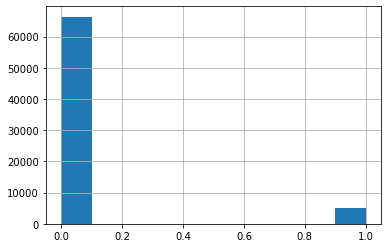

In [63]:
df_shots['Goal'].hist()

In [64]:
#look at type of shots
df_shots['Type'].value_counts()

WRIST SHOT     39485
SLAP SHOT      10515
SNAP SHOT       9503
BACKHAND        5151
TIP-IN          4399
DEFLECTED       1856
WRAP-AROUND      625
Name: Type, dtype: int64

In [65]:
#df_shots['Type'].value_counts().groupby('Event')
df_shots.groupby(["Event"])["Type"].value_counts().unstack()

Type   BACKHAND  DEFLECTED  SLAP SHOT  SNAP SHOT  TIP-IN  WRAP-AROUND  \
Event                                                                   
GOAL        491        163        512        763     462           33   
MISS       1137        816       3273       2291    1870          127   
SHOT       3523        877       6730       6449    2067          465   

Type   WRIST SHOT  
Event              
GOAL         2724  
MISS         9784  
SHOT        26977

In [66]:
df_shots.groupby(["Event"])["Type"].value_counts(normalize=True).unstack()

Type   BACKHAND  DEFLECTED  SLAP SHOT  SNAP SHOT    TIP-IN  WRAP-AROUND  \
Event                                                                     
GOAL   0.095377   0.031663   0.099456   0.148213  0.089744     0.006410   
MISS   0.058918   0.042284   0.169603   0.118717  0.096901     0.006581   
SHOT   0.074817   0.018625   0.142924   0.136956  0.043897     0.009875   

Type   WRIST SHOT  
Event              
GOAL     0.529138  
MISS     0.506996  
SHOT     0.572906

In [67]:
df_shots.groupby(["Type"])["Goal"].value_counts(normalize=True).unstack()

Goal                0         1
Type                           
BACKHAND     0.904679  0.095321
DEFLECTED    0.912177  0.087823
SLAP SHOT    0.951308  0.048692
SNAP SHOT    0.919710  0.080290
TIP-IN       0.894976  0.105024
WRAP-AROUND  0.947200  0.052800
WRIST SHOT   0.931012  0.068988

<AxesSubplot:xlabel='Event'>

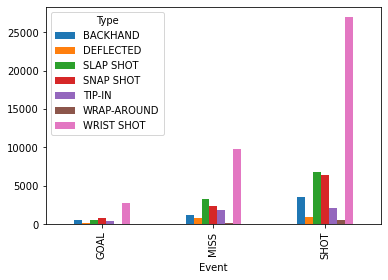

In [68]:
df_shots[["Event", "Type"]].value_counts().unstack().plot.bar()

In [69]:
df_shots['Strength'].value_counts()

5x5    57716
5x4     5719
4x5     5608
3x3      844
4x4      704
0x0      443
5x3      150
3x5       96
3x4       87
4x3       81
6x5       21
0x1       15
1x0       15
5x6       11
4x6        6
6x6        4
8x5        4
5x1        3
0x5        2
5x2        2
2x5        2
2x4        1
1x1        1
5x0        1
5x7        1
1x5        1
4x2        1
Name: Strength, dtype: int64

In [70]:
df_shots['Strength'].value_counts(normalize=True)

5x5    0.806777
5x4    0.079942
4x5    0.078391
3x3    0.011798
4x4    0.009841
0x0    0.006192
5x3    0.002097
3x5    0.001342
3x4    0.001216
4x3    0.001132
6x5    0.000294
0x1    0.000210
1x0    0.000210
5x6    0.000154
4x6    0.000084
6x6    0.000056
8x5    0.000056
5x1    0.000042
0x5    0.000028
5x2    0.000028
2x5    0.000028
2x4    0.000014
1x1    0.000014
5x0    0.000014
5x7    0.000014
1x5    0.000014
4x2    0.000014
Name: Strength, dtype: float64

In [71]:
df_shots.groupby(["Strength"])["Goal"].value_counts(normalize=True).unstack()

Goal             0         1
Strength                    
0x0       0.674944  0.325056
0x1       0.733333  0.266667
0x5       1.000000       NaN
1x0       0.666667  0.333333
1x1            NaN  1.000000
1x5       1.000000       NaN
2x4       1.000000       NaN
2x5       1.000000       NaN
3x3       0.862559  0.137441
3x4       0.862069  0.137931
3x5       0.843750  0.156250
4x2       1.000000       NaN
4x3       0.950617  0.049383
4x4       0.914773  0.085227
4x5       0.909058  0.090942
4x6       1.000000       NaN
5x0       1.000000       NaN
5x1       1.000000       NaN
5x2       1.000000       NaN
5x3       0.820000  0.180000
5x4       0.905053  0.094947
5x5       0.935702  0.064298
5x6       1.000000       NaN
5x7       1.000000       NaN
6x5       1.000000       NaN
6x6       1.000000       NaN
8x5       1.000000       NaN

In [72]:
df_shots['Shootout_shot'].value_counts()

0    71066
1      473
Name: Shootout_shot, dtype: int64

In [73]:
df_shots.groupby(["Shootout_shot"])["Goal"].value_counts(normalize=True).unstack()

Goal                  0         1
Shootout_shot                    
0              0.929657  0.070343
1              0.676533  0.323467

<AxesSubplot:xlabel='Shootout_shot'>

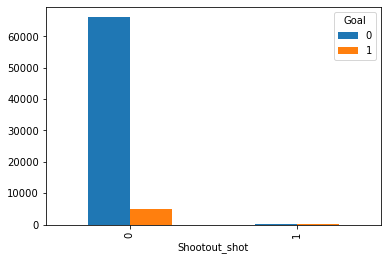

In [74]:
df_shots[["Shootout_shot", "Goal"]].value_counts().unstack().plot.bar()

In [75]:
df_shots['Power_play_shot'].value_counts()

0    61664
1     9875
Name: Power_play_shot, dtype: int64

In [76]:
df_shots.groupby(["Power_play_shot"])["Goal"].value_counts(normalize=True).unstack()

Goal                    0         1
Power_play_shot                    
0                0.932278  0.067722
1                0.901165  0.098835

<AxesSubplot:xlabel='Power_play_shot'>

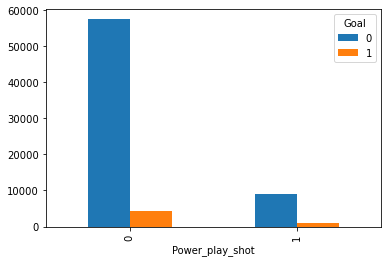

In [77]:
df_shots[["Power_play_shot", "Goal"]].value_counts().unstack().plot.bar()

The strength column needs to be collapsed into fewer groups. Specifically 5x5, 5x4, 5x3, 3x3.

In [78]:
df_shots['Shot_Distance'].describe()

count    71539.000000
mean        35.808384
std         23.980746
min          1.000000
25%         18.000000
50%         33.000000
75%         50.000000
max        188.000000
Name: Shot_Distance, dtype: float64

<AxesSubplot:>

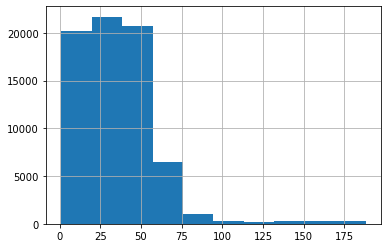

In [79]:
df_shots['Shot_Distance'].hist()

<AxesSubplot:xlabel='Goal'>

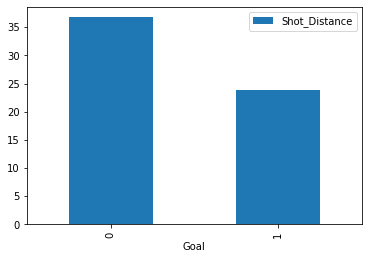

In [80]:
df_shots[["Shot_Distance","Goal"]].groupby('Goal').mean().plot.bar()

Goals are scored closer to the net, no surprise there!

In [81]:
df_shots['Freeze'].value_counts()

0    54891
1    16648
Name: Freeze, dtype: int64

In [82]:
df_shots['Freeze'].value_counts(normalize=True) #league average freeze rate was 27.2%

0    0.767288
1    0.232712
Name: Freeze, dtype: float64

In [83]:
df_shots['Shot_Off_Rebound'].value_counts()

0    63948
1     7591
Name: Shot_Off_Rebound, dtype: int64

In [84]:
df_shots.groupby(["Shot_Off_Rebound"])["Goal"].value_counts(normalize=True).unstack()

Goal                     0         1
Shot_Off_Rebound                    
0                 0.935620  0.064380
1                 0.863654  0.136346

<AxesSubplot:xlabel='Shot_Off_Rebound'>

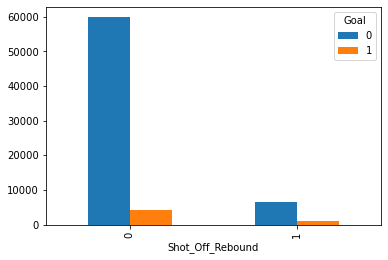

In [85]:
df_shots[["Shot_Off_Rebound", "Goal"]].value_counts().unstack().plot.bar()

In [86]:
df_shots['Shot_Off_Last_Shot'].value_counts()

0    56584
1    14955
Name: Shot_Off_Last_Shot, dtype: int64

In [87]:
df_shots.groupby(["Shot_Off_Last_Shot"])["Goal"].value_counts(normalize=True).unstack()

Goal                       0         1
Shot_Off_Last_Shot                    
0                   0.940937  0.059063
1                   0.878970  0.121030

<AxesSubplot:xlabel='Shot_Off_Last_Shot'>

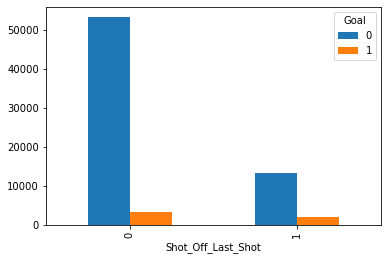

In [88]:
df_shots[["Shot_Off_Last_Shot", "Goal"]].value_counts().unstack().plot.bar()

In [89]:
df_shots['Dangerous_Shot_Off_Rebound'].value_counts()

0    69089
1     2450
Name: Dangerous_Shot_Off_Rebound, dtype: int64

In [90]:
df_shots.groupby(["Dangerous_Shot_Off_Rebound"])["Goal"].value_counts(normalize=True).unstack()

Goal                               0         1
Dangerous_Shot_Off_Rebound                    
0                           0.933202  0.066798
1                           0.780816  0.219184

<AxesSubplot:xlabel='Dangerous_Shot_Off_Rebound'>

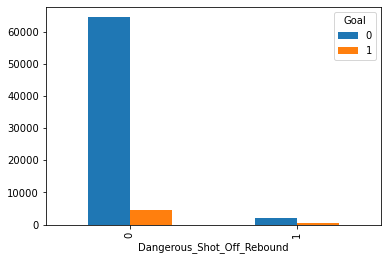

In [91]:
df_shots[["Dangerous_Shot_Off_Rebound", "Goal"]].value_counts().unstack().plot.bar()

In [92]:
df_shots['Dangerous_Shot_Off_Shot'].value_counts()

0    67932
1     3607
Name: Dangerous_Shot_Off_Shot, dtype: int64

In [93]:
df_shots.groupby(["Dangerous_Shot_Off_Shot"])["Goal"].value_counts(normalize=True).unstack()

Goal                            0         1
Dangerous_Shot_Off_Shot                    
0                        0.935215  0.064785
1                        0.791794  0.208206

<AxesSubplot:xlabel='Dangerous_Shot_Off_Shot'>

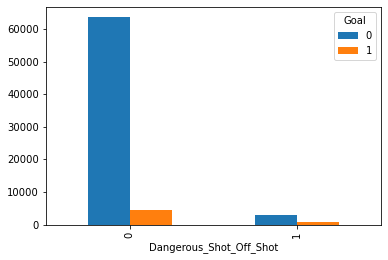

In [94]:
df_shots[["Dangerous_Shot_Off_Shot", "Goal"]].value_counts().unstack().plot.bar()

Unsurprisingly, rebounds create more goals. Shots off rebounds and missed shots under 3 seconds from the previous shot end up going in the net around 20% of the time.

In [95]:
df_shots['shot_angle'].describe()

count    71369.000000
mean        28.942973
std         21.345885
min        -88.315316
25%         14.036243
50%         27.979474
75%         41.009087
max         88.363423
Name: shot_angle, dtype: float64

<AxesSubplot:>

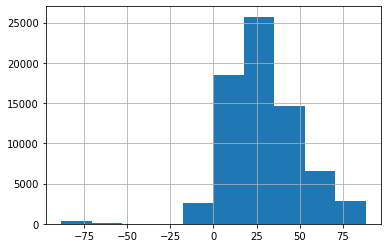

In [96]:
df_shots['shot_angle'].hist()

<AxesSubplot:xlabel='Goal'>

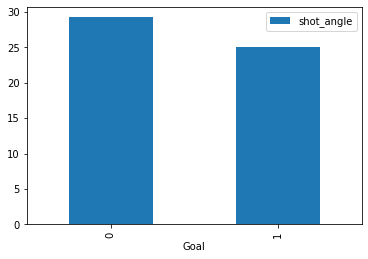

In [97]:
df_shots[["shot_angle","Goal"]].groupby('Goal').mean().plot.bar()

In [98]:
df_shots['dist_from_prev_ev'].describe()

count    70657.000000
mean        36.929034
std         19.954173
min          0.000000
25%         21.400935
50%         35.171011
75%         50.803543
max        115.000000
Name: dist_from_prev_ev, dtype: float64

<AxesSubplot:>

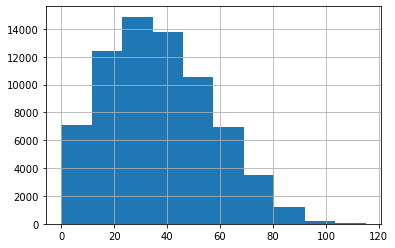

In [99]:
df_shots['dist_from_prev_ev'].hist()

In [100]:
df_shots[["dist_from_prev_ev","Goal"]].groupby('Goal').mean().plot.bar()

<AxesSubplot:xlabel='Goal'>

In [101]:
df_shots['Previous_Ev_Seconds'].describe()

count    71539.000000
mean        16.365311
std         15.625440
min          0.000000
25%          6.000000
50%         11.000000
75%         22.000000
max        190.000000
Name: Previous_Ev_Seconds, dtype: float64

In [102]:
df_shots['Previous_Ev_Seconds'].hist()

<AxesSubplot:>

In [103]:
df_shots[["Previous_Ev_Seconds","Goal"]].groupby('Goal').mean().plot.bar()

<AxesSubplot:xlabel='Goal'>

In [104]:
#score
df_shots['Score'].value_counts()

Tied                 25306
Home Team Winning    23674
Home Team Losing     22559
Name: Score, dtype: int64

In [105]:
df_shots['Score'].value_counts(normalize=True)

Tied                 0.353737
Home Team Winning    0.330924
Home Team Losing     0.315338
Name: Score, dtype: float64

In [106]:
df_shots.groupby(["Score"])["Goal"].value_counts(normalize=True).unstack()

Goal                      0         1
Score                                
Home Team Losing   0.927967  0.072033
Home Team Winning  0.924390  0.075610
Tied               0.931360  0.068640

<AxesSubplot:xlabel='Score'>

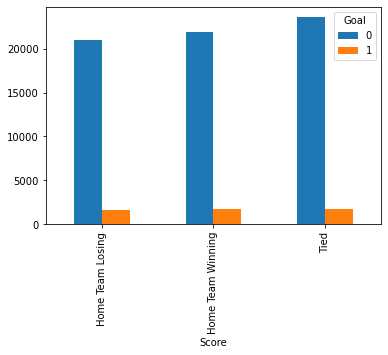

In [107]:
df_shots[["Score", "Goal"]].value_counts().unstack().plot.bar()

# Shot Plotting

In [108]:
import matplotlib
import matplotlib.pyplot as plt
color_map = plt.cm.winter
from matplotlib.patches import RegularPolygon
import math
from PIL import Image

In [109]:
# Using matplotlib we create a new figure for plotting
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

# Clean up the figure to be completely blank
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
fig.patch.set_alpha(0.0)

# Remove the labelling of axes
ax.set_xticklabels(labels = [''], fontsize = 18,
   alpha = .7,minor=False)
ax.set_yticklabels(labels = [''], fontsize = 18,
   alpha = .7,minor=False)

# Using pillow to get the rink image and extract the image size
I = Image.open("C:/Users/BRG4142/Pictures/hockey_rink3.PNG")
I  = I.rotate(180) #rotate 180 degrees so it matches the direction of the x, y coordinates
ax.imshow(I);width, height = I.size

<ipython-input-109-68497b43302a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = [''], fontsize = 18,
<ipython-input-109-68497b43302a>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels = [''], fontsize = 18,


In [110]:
df_shots[['xC','yC','x','y','x_dist','Shot_Distance','shot_angle']].head(20)

xC    yC     x     y  x_dist  Shot_Distance  shot_angle
2  -74.0  29.0  74.0 -29.0    15.0             32   62.650124
5   49.0 -25.0  49.0 -25.0    40.0             47   32.005383
8  -52.0 -31.0  52.0  31.0    37.0             48   39.957549
20  43.0  39.0  43.0  39.0    46.0             60   40.292148
23 -46.0  33.0  46.0 -33.0    43.0             54   37.504142
25 -53.0   8.0  53.0  -8.0    36.0             36   12.528808
26 -70.0  -3.0  70.0   3.0    19.0             19    8.972627
28  59.0 -35.0  59.0 -35.0    30.0             46   49.398705
30 -59.0 -28.0  59.0  28.0    30.0             41   43.025066
33  81.0  -5.0  81.0  -5.0     8.0              9   32.005383
35  32.0   0.0  32.0   0.0    57.0             57    0.000000
41  46.0 -21.0  46.0 -21.0    43.0             47   26.029592
43  85.0  15.0  85.0  15.0     4.0             15   75.068583
50  52.0 -20.0  52.0 -20.0    37.0             42   28.393019
53  69.0  -9.0  69.0  -9.0    20.0             21   24.227745
55  63.0 -37.0  63.0 -37.0    26.0             45   54.904183
58 -40.0  34.0  40.0 -34.0    49.0             59   34.755913
59 -35.0 -34.0  35.0  34.0    54.0             63   32.195734
61 -64.0 -37.0  64.0  37.0    25.0             44   55.954063
67 -69.0  -2.0  69.0   2.0    20.0             20    5.710593

In [111]:
df_shots['x'].describe()

count    71369.000000
mean        60.119450
std         18.443213
min          0.000000
25%         45.000000
50%         63.000000
75%         76.000000
max         99.000000
Name: x, dtype: float64

In [112]:
df_shots['x'].hist(bins=20)

<AxesSubplot:>

There is a sharp drop off at x=25, and x= ~89. This is because the blue line is at 25 feet, and the goal line is at 89 feet. If you're behind the blue line, you're likely offside, and it's hard to score from behind the net.

In [113]:
df_shots['y'].describe()

count    71369.000000
mean         0.178999
std         18.895952
min        -42.000000
25%        -14.000000
50%         -0.000000
75%         14.000000
max         42.000000
Name: y, dtype: float64

In [114]:
df_shots['shot_angle'].describe()

count    71369.000000
mean        28.942973
std         21.345885
min        -88.315316
25%         14.036243
50%         27.979474
75%         41.009087
max         88.363423
Name: shot_angle, dtype: float64

<AxesSubplot:>

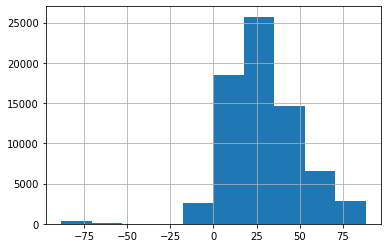

In [115]:
df_shots['shot_angle'].hist()

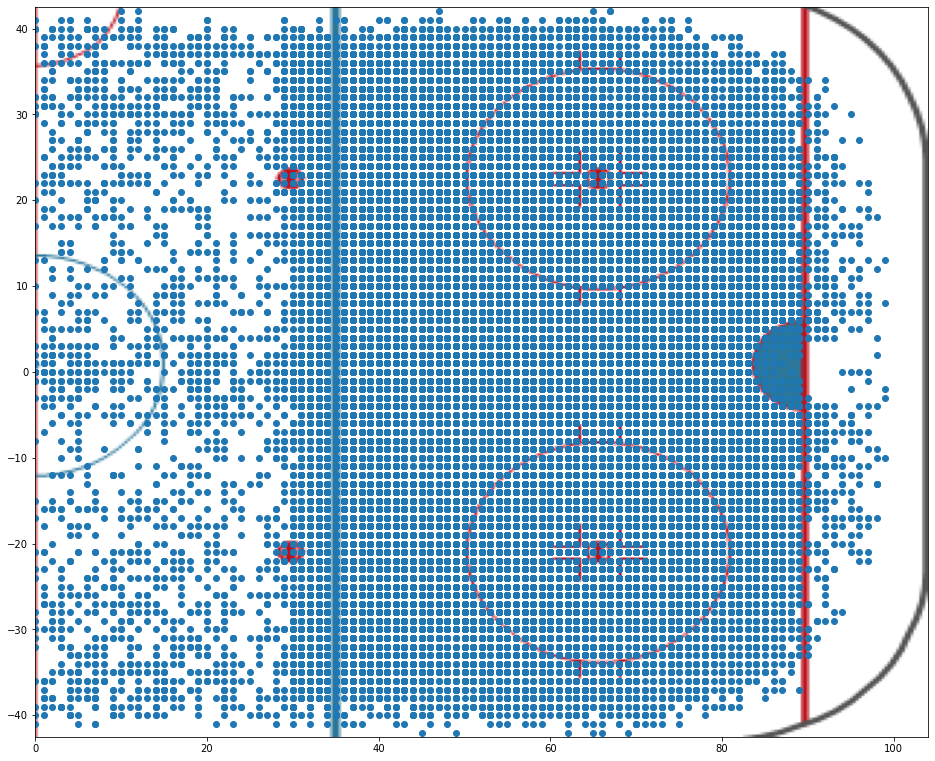

In [154]:
fig, ax = plt.subplots(figsize = (16,20))
ax.imshow(I, extent=[0,104,-42.5,42.5])
ax.scatter(df_shots['x'], df_shots['y'])
plt.xlim([0, 104])
plt.ylim([-42.5, 42.5])
plt.show()

Great! I was able to plot all shots onto the image of the rink. My scale isn't perfect, you should see the drop off of shots occur right at the blue line, not after it. The NHL rink is 200 feet long and 85 feet wide. with the dimensions of the NHL rink the goaline should be at 89 ft on the x axis, and the blue line should be at 25 feet on the x axis, so both are slightly off of scale in this image. I will try and play around with this to fix it.

Also, this is just a scatter plot of all shots from the 2021 season, and since there were so many shots this graph isn't super helpful. A density plot may be more useful.

In [124]:
#create test df and drop NaN's
df_shot_viz = df_shots[['x','y', 'p1_name', 'Event']]
df_shot_viz = df_shot_viz.dropna()

In [ ]:
from scipy.stats import gaussian_kde

#set colormap
plt.set_cmap('magma')

# Calculate the point density
xy = np.vstack([df_shot_viz['x'],df_shot_viz['y']])
z = gaussian_kde(xy)(xy)

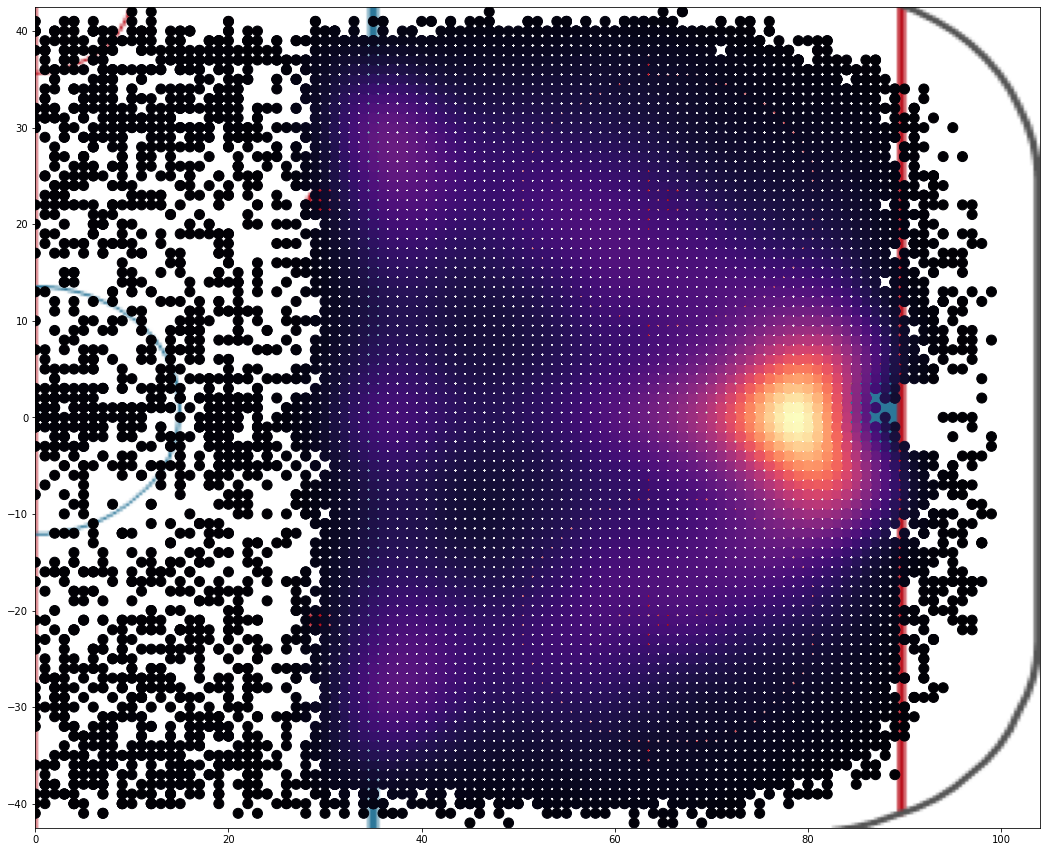

In [152]:
#plot  gaussian KDE on image of rink

fig, ax = plt.subplots(figsize = (18,24))
ax.imshow(I, extent=[0,104,-42.5,42.5])
ax.scatter(df_shot_viz['x'], df_shot_viz['y'], c=z, s=100)
plt.xlim([0, 104])
plt.ylim([-42.5, 42.5])
plt.show()

Ok! With this density plot we can see that most shots occur in front of the net. Nothing we didn't expect there. We can also see that shots frequently come from the points (Just inside the blue line by the boards), and follow a V like pattern towards the net.

I think this plot could be greatly improved and it's something I'll try to work on for this project.

In [126]:
#examine one player's shot chart
#create test df fro Auston Matthews shots
df_matthews = df_shot_viz[df_shot_viz['p1_name'] == "AUSTON MATTHEWS"]
#df_matthews.head()

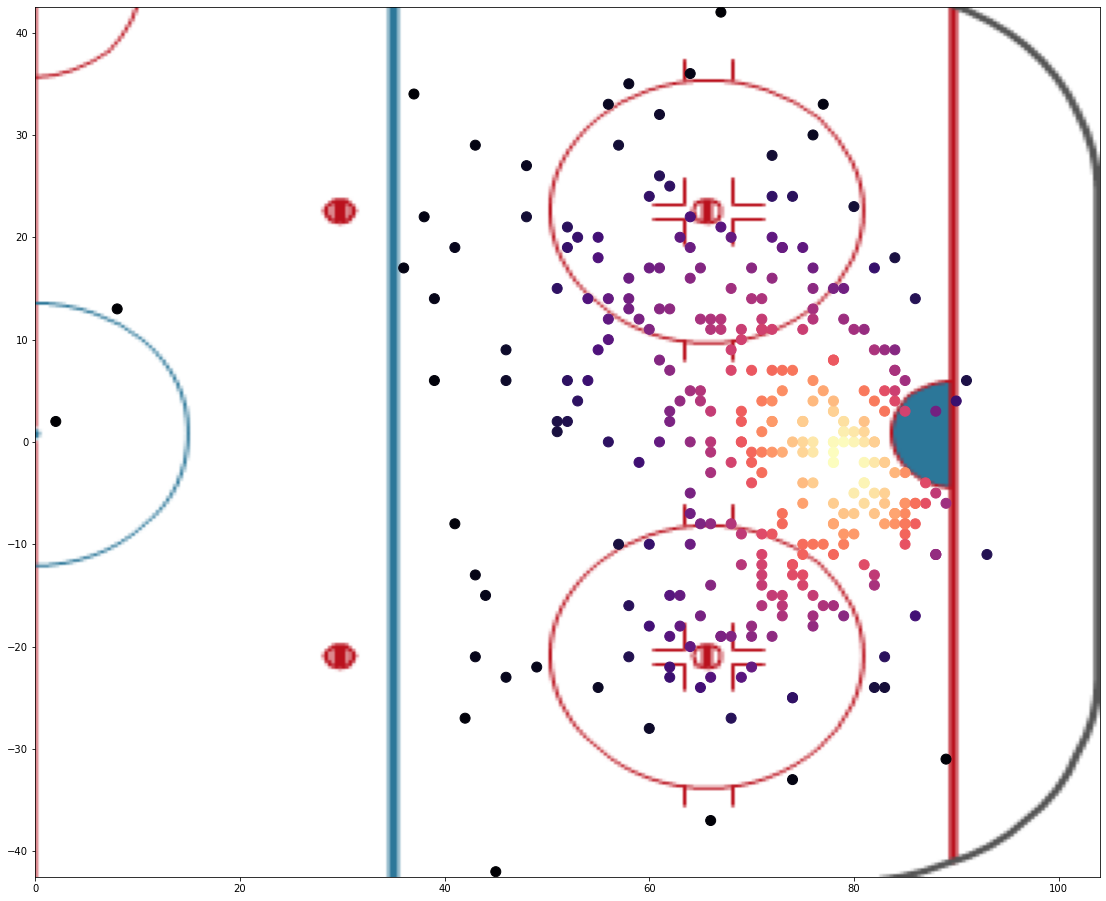

In [128]:
# Calculate the point density
xy = np.vstack([df_matthews['x'],df_matthews['y']])
z = gaussian_kde(xy)(xy)

#plot on image of rink
fig, ax = plt.subplots(figsize = (20,16))
ax.imshow(I, extent=[0,104,-42.5,42.5])
ax.scatter(df_matthews['x'], df_matthews['y'], c=z, s=100)
plt.xlim([0, 104])
plt.ylim([-42.5, 42.5])
plt.show()

Auston Matthews led the NHL in goals during the 2021 season. We can see from this chart that he takes most of his shots right in front of the net.

In [230]:
#Quick data check:
print("Auston Matthews shots: ", len(df_matthews[(df_matthews['Event'] == 'SHOT') | (df_matthews['Event'] == 'GOAL')]))
print("Auston Matthews goals: ", len(df_matthews[df_matthews['Event'] == 'GOAL']))

Auston Matthews shots:  222
Auston Matthews goals:  41


#image of Mathews stats from nhl.com:
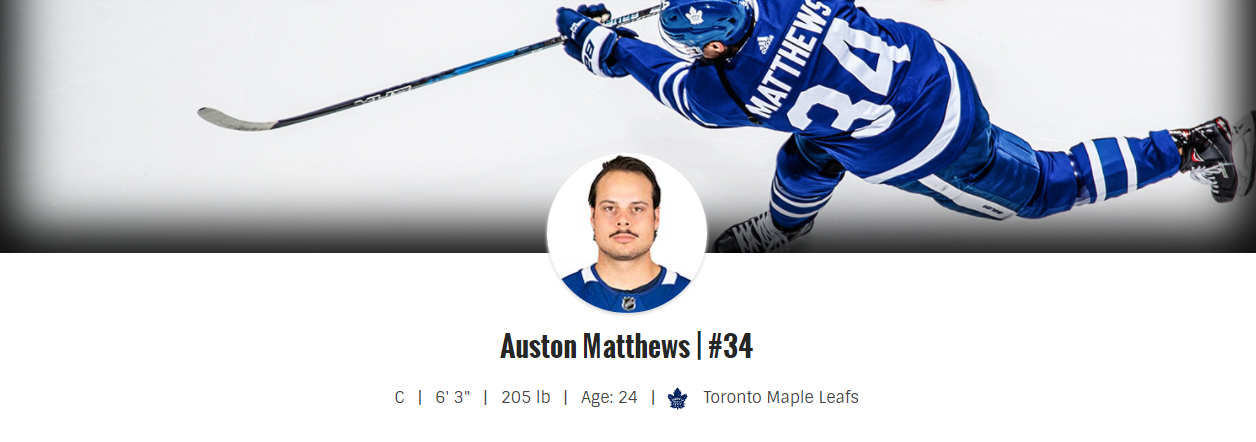
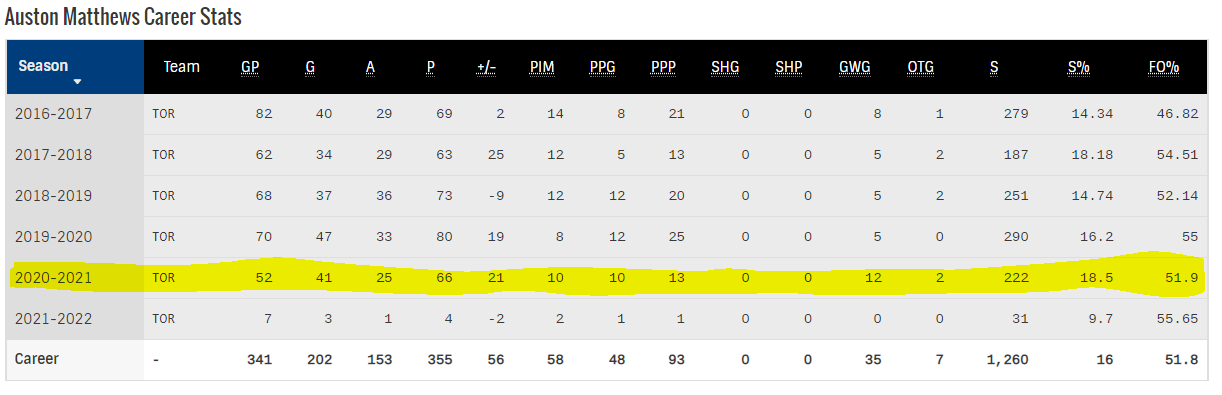


The stats for goals and shots match up for the 2021 season!

In [231]:
df_shots[['Event', 'Home_Team', 'Away_Team', 'Ev_Team', 'Home']].head(20)

Event Home_Team Away_Team Ev_Team  Home
2   SHOT       PHI       PIT     PHI     1
5   SHOT       PHI       PIT     PIT     0
8   SHOT       PHI       PIT     PHI     1
20  SHOT       PHI       PIT     PIT     0
23  MISS       PHI       PIT     PHI     1
25  SHOT       PHI       PIT     PHI     1
26  SHOT       PHI       PIT     PHI     1
28  SHOT       PHI       PIT     PIT     0
30  SHOT       PHI       PIT     PHI     1
33  GOAL       PHI       PIT     PIT     0
35  SHOT       PHI       PIT     PIT     0
41  SHOT       PHI       PIT     PIT     0
43  SHOT       PHI       PIT     PIT     0
50  SHOT       PHI       PIT     PIT     0
53  MISS       PHI       PIT     PIT     0
55  SHOT       PHI       PIT     PIT     0
58  MISS       PHI       PIT     PHI     1
59  SHOT       PHI       PIT     PHI     1
61  SHOT       PHI       PIT     PHI     1
67  SHOT       PHI       PIT     PHI     1

In [ ]:
df_matthews = df_shot_viz[df_shot_viz['p1_name'] == "AUSTON MATTHEWS"]

# Output Data to excel

In [232]:
df_shots.columns

Index(['Game_Id', 'Date', 'Period', 'Event', 'Description', 'Time_Elapsed',
       'Seconds_Elapsed', 'Strength', 'Ev_Zone', 'Type', 'Ev_Team',
       'Home_Zone', 'Away_Team', 'Home_Team', 'p1_name', 'p1_ID', 'p2_name',
       'p2_ID', 'p3_name', 'p3_ID', 'awayPlayer1', 'awayPlayer1_id',
       'awayPlayer2', 'awayPlayer2_id', 'awayPlayer3', 'awayPlayer3_id',
       'awayPlayer4', 'awayPlayer4_id', 'awayPlayer5', 'awayPlayer5_id',
       'awayPlayer6', 'awayPlayer6_id', 'homePlayer1', 'homePlayer1_id',
       'homePlayer2', 'homePlayer2_id', 'homePlayer3', 'homePlayer3_id',
       'homePlayer4', 'homePlayer4_id', 'homePlayer5', 'homePlayer5_id',
       'homePlayer6', 'homePlayer6_id', 'Away_Players', 'Home_Players',
       'Away_Score', 'Home_Score', 'Away_Goalie', 'Away_Goalie_Id',
       'Home_Goalie', 'Home_Goalie_Id', 'xC', 'yC', 'Home_Coach', 'Away_Coach',
       'Goal', 'Shootout_shot', 'Power_play_shot', 'Goalie_shot_on',
       'xC_Previous_Row', 'yC_Previous_Row', 'x', 'y', '

In [136]:
#select columns needed
df_output = df_shots[['Game_Id', 'Date', 'Period', 'Event', 'Description', 'Time_Elapsed',
       'Seconds_Elapsed', 'Strength', 'Ev_Zone', 'Type', 'Ev_Team',
       'Home_Zone', 'Away_Team', 'Home_Team', 'p1_name', 'p1_ID', 'p2_name',
       'p2_ID', 'p3_name', 'p3_ID', 
       'Away_Score', 'Home_Score', 'Away_Goalie', 'Away_Goalie_Id',
       'Home_Goalie', 'Home_Goalie_Id', 'xC', 'yC',
       'Goal', 'Shootout_shot', 'Power_play_shot', 'Goalie_shot_on',
       'xC_Previous_Row', 'yC_Previous_Row', 'x', 'y', 'x_prev', 'y_prev',
       'x_dist', 'x_dist_prev', 'shot_angle', 'dist_from_prev_ev',
       'Ev_Team_Previous_Row', 'Game_Id_Previous_Row', 'Event_Previous_Row',
       'Event_Next_Row', 'Previous_Ev_Seconds', 'Seconds_From_Last_Shot',
       'Rebound_Seconds', 'Freeze', 'prev_ev_shot', 'Home', 'Score',
       'Shot_Distance', 'Shot_Off_Rebound', 'Shot_Off_Last_Shot',
       'Dangerous_Shot_Off_Rebound', 'Dangerous_Shot_Off_Shot',
       'Goalie_rebound_given', 'Goalie__dangerous_rebound_given']]

In [137]:
#output fenwick to excel
df_output.to_excel("cleaned_NHL_fenwick_2021.xlsx", sheet_name='data')
df_output.shape

(71539, 60)

In [138]:
#output shots only to excel
df_shots_output = df_output[((df_output['Event'] == 'SHOT') | (df_output['Event'] == 'GOAL'))]
df_shots_output.to_excel("cleaned_NHL_shots_2021.xlsx", sheet_name='data')
df_shots_output.shape

(52241, 60)

In [139]:
#output even strength fenwick  to excel
df_fenwick_5x5_output = df_output[(df_output['Strength'] == '5x5') | (df_output['Strength'] == '4x4') | (df_output['Strength'] == '3x3')]
df_fenwick_5x5_output.to_excel("cleaned_NHL_fenwick_even_strength_2021.xlsx", sheet_name='data')
df_fenwick_5x5_output.shape

(59264, 60)

In [140]:
#output 5x5 shots to excel
df_shots_5x5_output = df_output[((df_output['Strength'] == '5x5') | (df_output['Strength'] == '4x4') | (df_output['Strength'] == '3x3')) & ((df_output['Event'] == 'SHOT') | (df_output['Event'] == 'GOAL'))]
df_shots_5x5_output.to_excel("cleaned_NHL_shots_even_strength_2021.xlsx", sheet_name='data')
df_shots_5x5_output.shape

(43069, 60)